# Descripción de variables

* Year: Esta columna representa el año en que se realizó la transacción. 
* Month: Esta columna representa el mes en que se realizó la transacción. 
* Customer Age: Esta columna representa la edad del cliente. 
* Customer Gender: Esta columna representa el género del cliente. 
* Country: Esta columna representa el país donde se realizó la transacción. 
* State: Esta columna representa el estado donde se realizó la transacción. 
* Product Category: Esta columna representa la categoría amplia del producto vendido. 
* Sub Category: Esta columna representa la subcategoría específica del producto vendido. 
* Quantity: Esta columna representa la cantidad del producto vendido. 
* Unit Cost: Esta columna representa el costo de producir o adquirir una unidad del producto. 
* Unit Price: Esta columna representa el precio al que se vendió una unidad del producto. 
* Cost: Esta columna representa el costo total de los productos vendidos, que se calcula como el producto de la cantidad y el costo unitario. 
* Revenue: Esta columna representa el total de ingresos generados por las ventas, que se calcula como el producto de la cantidad y el precio unitario. 

# Objetivo 
Identificar nuevas áreas de oporunidad o posibles riesgos mediante el análisis de los datos de ventas

# Importación de librerías

In [223]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
palette = ["#233d4d", "#fe7f2d", "#fcca46", 
            "#a1c181", "#619b8a"]
sns.set_palette(palette=palette)
import squarify
from scipy.cluster.hierarchy import dendrogram, linkage
import session_info

# Conexión a la base de datos

In [102]:
# Configuración de la conexión
host = 'localhost'
user = 'root'
password = 'password'
database = 'Sales_proyect'

# Crear el objeto de conexión SQLAlchemy
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}/{database}")

In [103]:
query = """
        SELECT * 
        FROM sales_data
        """

df = pd.read_sql_query(query, engine)
df.head()

Date  Year     Month  Customer_Age Customer_Gender        Country  \
0 2016-02-19  2016  February            29               F  United States   
1 2016-02-20  2016  February            29               F  United States   
2 2016-02-27  2016  February            29               F  United States   
3 2016-03-12  2016     March            29               F  United States   
4 2016-03-12  2016     March            29               F  United States   

        State Product_Category     Sub_Category  Quantity  Unit_Cost  \
0  Washington      Accessories  Tires and Tubes         1      80.00   
1  Washington         Clothing           Gloves         2      24.50   
2  Washington      Accessories  Tires and Tubes         3       3.67   
3  Washington      Accessories  Tires and Tubes         2      87.50   
4  Washington      Accessories  Tires and Tubes         3      35.00   

   Unit_Price  Cost  Revenue  
0  109.000000    80      109  
1   28.500000    49       57  
2    5.000000    11       15  
3  116.500000   175      233  
4   41.666667   105      125

# Limpieza de datos

Se eliminó una columna que únicamente contenía datos nulos.

Se sustituyeron los espacios en blanco por "_" en los nombres de las columnas para que fueran más sencillos de utilizar en el análisis. 

Esto se hizo directamente en mysqlworkbench a través de las siguientes consultas:

* Eliminar datos nulos

    ALTER TABLE sales_data DROP Column1
* Cambiar nombres de las columnas con espacios en blanco

    ALTER TABLE sales_data RENAME COLUMN "Customer Age" TO Customer_Age;

    ALTER TABLE sales_data RENAME COLUMN "Customer Gender" TO Customer_Gender;
    
    ALTER TABLE sales_data RENAME COLUMN "Product Category" TO Product_Category;
    
    ALTER TABLE sales_data RENAME COLUMN "Sub Category" TO Sub_Category;
    
    ALTER TABLE sales_data RENAME COLUMN "Unit Cost" TO Unit_Cost;
    
    ALTER TABLE sales_data RENAME COLUMN "Unit Price" TO Unit_Price;
    


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34866 entries, 0 to 34865
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Year              34866 non-null  int64         
 2   Month             34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   Country           34866 non-null  object        
 6   State             34866 non-null  object        
 7   Product_Category  34866 non-null  object        
 8   Sub_Category      34866 non-null  object        
 9   Quantity          34866 non-null  int64         
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
 12  Cost              34866 non-null  int64         
 13  Revenue           34866 non-null  int64         
dtypes: datetime64[ns](1), 

In [105]:
# Se tiene un registro duplicado, sin embargo, no es imposible que 
# se den dos compras con las mismas características, por lo que 
# al ser un solo caso, no se eliminará
df.duplicated().sum()

1

# EDA

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34866 entries, 0 to 34865
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Year              34866 non-null  int64         
 2   Month             34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   Country           34866 non-null  object        
 6   State             34866 non-null  object        
 7   Product_Category  34866 non-null  object        
 8   Sub_Category      34866 non-null  object        
 9   Quantity          34866 non-null  int64         
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
 12  Cost              34866 non-null  int64         
 13  Revenue           34866 non-null  int64         
dtypes: datetime64[ns](1), 

In [107]:
df.describe()

Year  Customer_Age      Quantity     Unit_Cost    Unit_Price  \
count  34866.000000  34866.000000  34866.000000  34866.000000  34866.000000   
mean    2015.569237     36.382895      2.002524    349.880567    389.232485   
std        0.495190     11.112902      0.813936    490.015846    525.319091   
min     2015.000000     17.000000      1.000000      0.670000      0.666667   
25%     2015.000000     28.000000      1.000000     45.000000     53.666667   
50%     2016.000000     35.000000      2.000000    150.000000    179.000000   
75%     2016.000000     44.000000      3.000000    455.000000    521.000000   
max     2016.000000     87.000000      3.000000   3240.000000   5082.000000   

               Cost       Revenue  
count  34866.000000  34866.000000  
mean     576.004532    640.870074  
std      690.500395    736.650597  
min        2.000000      2.000000  
25%       85.000000    102.000000  
50%      261.000000    319.000000  
75%      769.000000    902.000000  
max     3600.000000   5082.000000

Existen productos que representan pérdidas para el negocio, pues tienen tasas de ganacia negativas

In [108]:
df.describe(include=["object"])

Month Customer_Gender        Country       State Product_Category  \
count   34866           34866          34866       34866            34866   
unique     12               2              4          45                3   
top      June               M  United States  California      Accessories   
freq     3680           17805          18076       10332            22534   

           Sub_Category  
count             34866  
unique               17  
top     Tires and Tubes  
freq              11112

## Proporción de clientes por rango de edad y por género

In [109]:
# Crear dataframes con columna de rangos de edad 
# y filtrados por genero
query = """
SELECT
    *,
    (Revenue-Cost) AS Profit,
    CASE
        WHEN Customer_Age BETWEEN 17 AND 27 THEN '17-28'
        WHEN Customer_Age BETWEEN 28 AND 37 THEN '28-37'
        WHEN Customer_Age BETWEEN 38 AND 47 THEN '38-47'
        WHEN Customer_Age BETWEEN 48 AND 57 THEN '48-57'
        WHEN Customer_Age BETWEEN 58 AND 67 THEN '58-67'
        WHEN Customer_Age BETWEEN 68 AND 77 THEN '68-77'
        WHEN Customer_Age BETWEEN 78 AND 87 THEN '78-87'
        ELSE 'Unknown'
    END AS Age_range
FROM
    sales_data
ORDER BY FIELD(Age_range, '17-28', '28-37', '38-47', 
                '48-57', '58-67', '68-77', '78-87');
"""

df_age_ranges = pd.read_sql_query(query, engine)

df_female = df_age_ranges.query("Customer_Gender=='F'")
df_male = df_age_ranges.query("Customer_Gender=='M'")



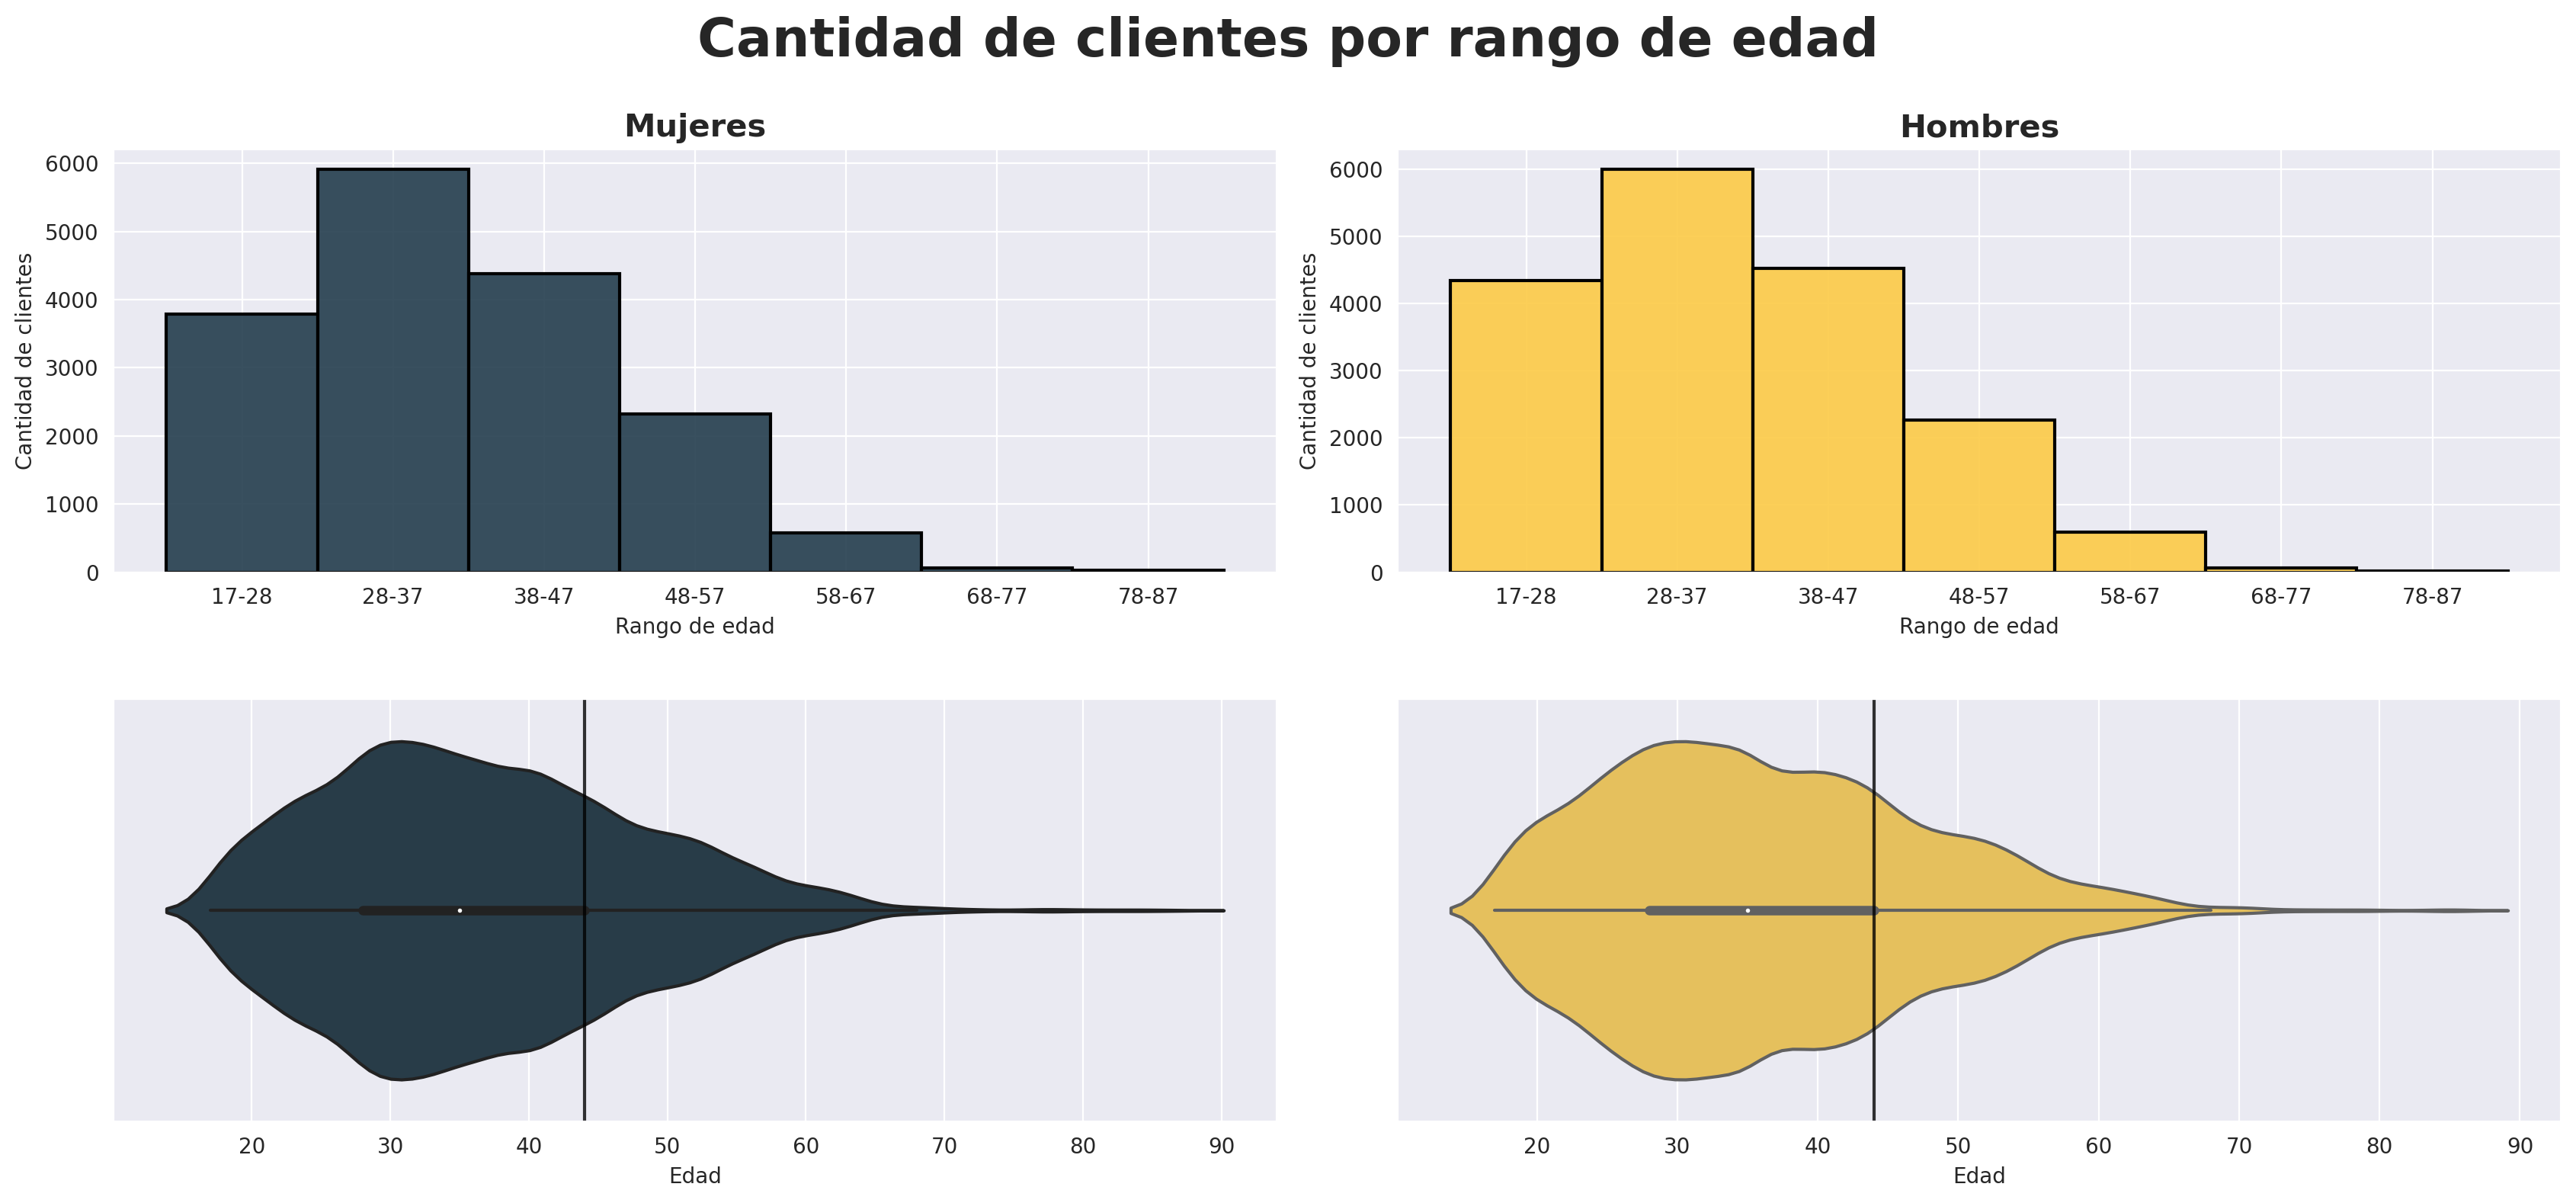

In [110]:
fig, axes = plt.subplots(2, 2, figsize=(17, 8), dpi=200)
axes = axes.flat
sns.histplot(df_female.Age_range, 
             color=palette[0], alpha=0.9, 
             ax=axes[0], edgecolor="k", linewidth=1.5)
axes[0].set_title("Mujeres", 
                  size=15, fontweight="bold")
axes[0].set_xlabel("Rango de edad")
axes[0].set_ylabel("Cantidad de clientes")


sns.violinplot(x=df_female.Customer_Age,
                color=palette[0], alpha=0.9, 
                ax=axes[2])
axes[2].axvline(np.quantile(df_female.Customer_Age, 
                            q=0.75), color="black", 
                            alpha=0.8)
axes[2].set_xlabel("Edad")


sns.histplot(df_male.Age_range, 
             color=palette[2], alpha=0.9, 
             edgecolor="k", linewidth=1.5, ax=axes[1])
axes[1].set_title("Hombres", 
                  size=15, fontweight="bold")
axes[1].set_xlabel("Rango de edad")
axes[1].set_ylabel("Cantidad de clientes")


sns.violinplot(x=df_male.Customer_Age,
                color=palette[2], alpha=0.9, 
                ax=axes[3])
axes[3].axvline(np.quantile(df_male.Customer_Age, 
                            q=0.75), color="black", alpha=0.8)
axes[3].set_xlabel("Edad")


fig.tight_layout()
fig.suptitle("Cantidad de clientes por rango de edad", 
             size=25, fontweight="bold")
plt.subplots_adjust(top = 0.87, hspace=0.3)
plt.show()

<style>
p {
text-align: justify;
}
</style>
La distribución de los datos es muy similar tanto para hombres como para mujeres.

La mayoría de los clientes son personas jóvenes o de mediana edad
* El 50% de los clientes tienen 35 años o menos
* El 75% de los clientes tienen 44 años o menos

El rango de edad en el que hay más clientes es entre 28 y 37 años

El rango de edad en el que hay menos clientes es entre 78 y 87 años

Ahora que conocemos cómo se distribuyen los clientes por género y por rangos de edad, podemos analizar las ganancias que generan.


### Ganancias generadas por clientes según edad y género

In [111]:
df_female_age_range =  df_female.groupby(["Age_range"])[["Revenue", "Profit"]].sum().reset_index()
df_female_age_range["Margin_profit"] = df_female_age_range.Profit / df_female_age_range.Revenue

In [112]:
df_male_age_range =  df_male.groupby(["Age_range"])[["Revenue", "Profit"]].sum().reset_index()
df_male_age_range["Margin_profit"] = df_male_age_range.Profit / df_male_age_range.Revenue

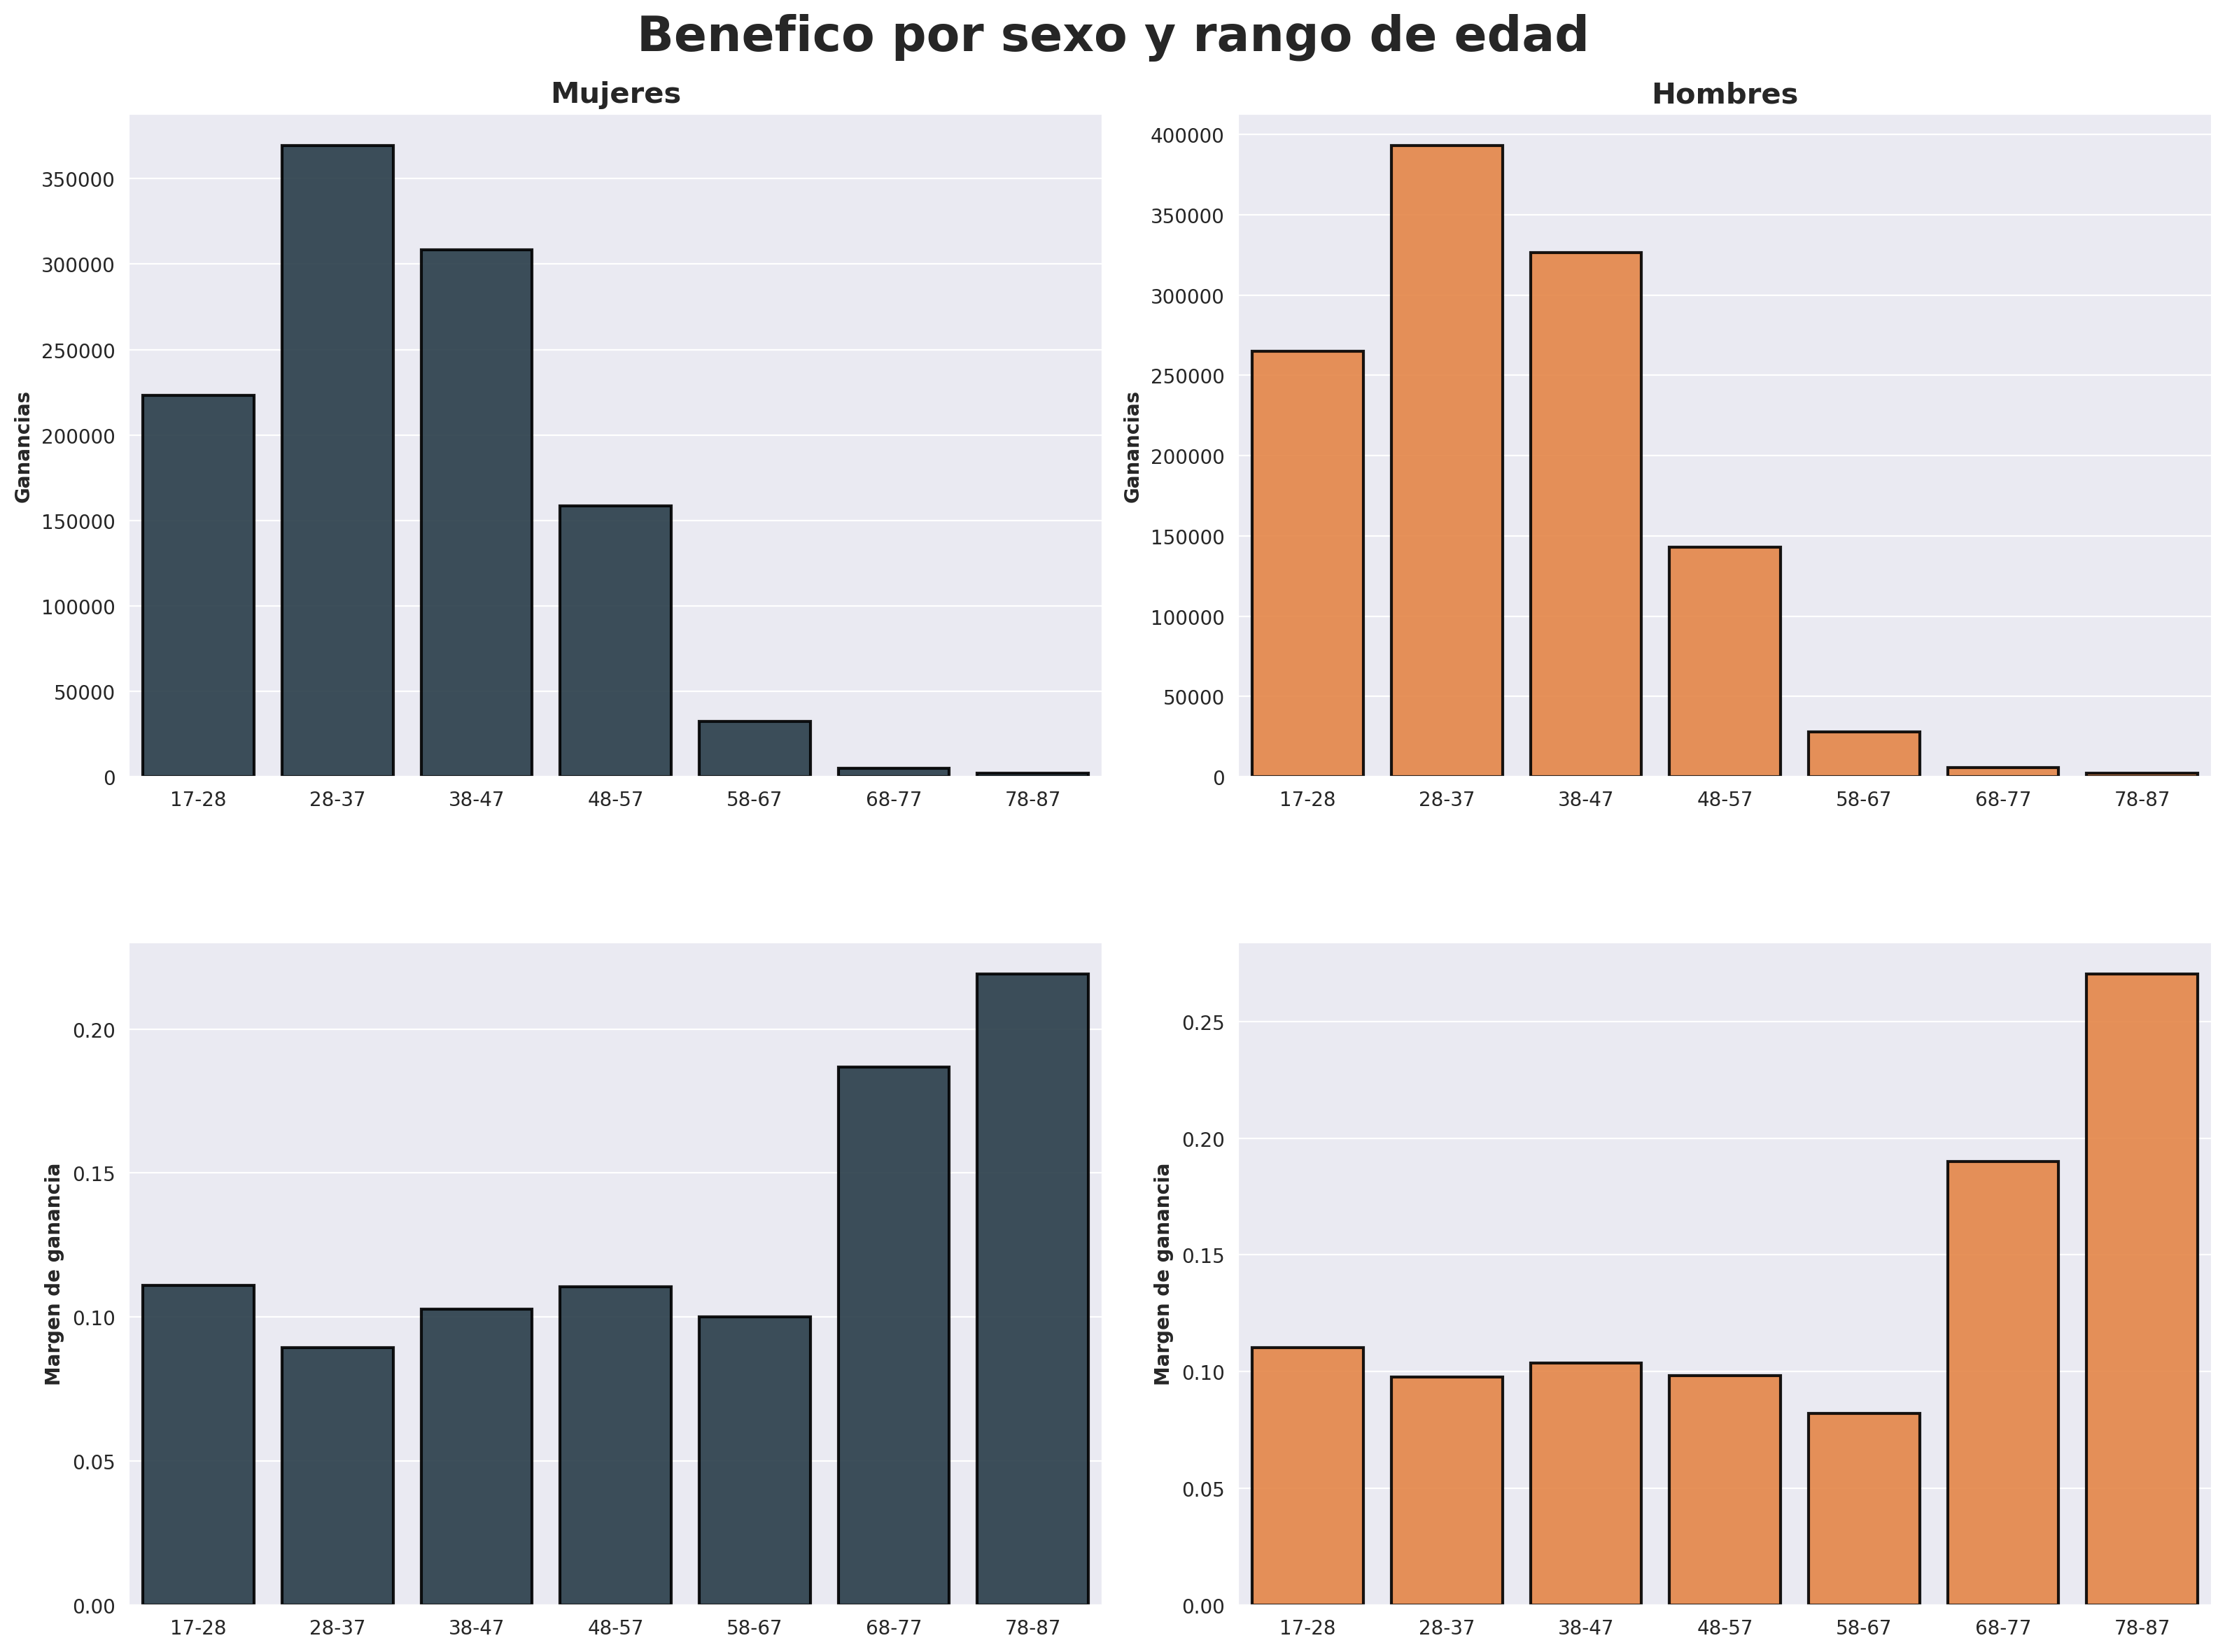

In [113]:

fig, axes = plt.subplots(nrows=2, ncols=2, 
                         figsize=(16, 12), dpi=200)
axes = axes.flat
sns.barplot(data=df_female_age_range, x="Age_range", alpha=0.9, 
            y="Profit", ci=0, color=palette[0],
            edgecolor="k", linewidth=1.5, ax=axes[0])
axes[0].set_title("Mujeres", size=15, fontweight="bold")
axes[0].set_xlabel("")
axes[0].set_ylabel("Ganancias", fontweight="bold")


sns.barplot(data=df_male_age_range, x="Age_range", alpha=0.9, 
            y="Profit", ci=0, color=palette[1], 
            edgecolor="k", linewidth=1.5, ax=axes[1])
axes[1].set_title("Hombres", size=15, fontweight="bold")
axes[1].set_xlabel("")
axes[1].set_ylabel("Ganancias", fontweight="bold")


sns.barplot(data=df_female_age_range, x="Age_range", alpha=0.9, 
            y="Margin_profit", ci=0, color=palette[0], 
            edgecolor="k", linewidth=1.5, ax=axes[2])
axes[2].set_xlabel("")
axes[2].set_ylabel("Margen de ganancia", fontweight="bold")


sns.barplot(data=df_male_age_range, x="Age_range", alpha=0.9, 
            y="Margin_profit", ci=0, color=palette[1], 
            edgecolor="k", linewidth=1.5, ax=axes[3])
axes[3].set_xlabel("")
axes[3].set_ylabel("Margen de ganancia", fontweight="bold")


fig.tight_layout()
fig.suptitle("Benefico por sexo y rango de edad", 
            size=25, fontweight="bold")
plt.subplots_adjust(top=0.92, hspace=0.25)

<style>
p {
text-align: justify;
}
</style>
Se observa que los clientes que generan mayores ganancias son los que están en un rango de edad de entre 28-37 y los que generan menores ganancias son los clientes de 78-87.

Sin embargo, con el margen de ganancia pasa lo opuesto, el margen de ganancia más alto está en los clientes de 78-87 y los márgenes más pequeños en los rangos de edad de 28-37.

Las ganacias por rango de edad siguen una distribución muy similar a la de la cantidad de clientes por rango de edad. Esto signfica que, como se esperaría, las ganancias son mayores en los grupos de edad donde se concentran más clientes.


### Categorías más compradas por sexo y rango de edad

In [114]:
# Se calcula el porcentaje de unidades vendidas de 
# cada categoría por rango de edad y género

#  Mujeres
female_age_category_percentage = df_female.groupby(
    ["Age_range", "Product_Category"])[["Quantity"]].sum()
female_age_category_percentage = female_age_category_percentage\
                                                .groupby(level=0)\
                                                .apply(lambda x: x/x.sum())\
                                                .reset_index()


# Hombres
male_age_category_percentage = df_male.groupby(
    ["Age_range", "Product_Category"])[["Quantity"]].sum()
male_age_category_percentage = male_age_category_percentage\
                                                .groupby(level=0)\
                                                .apply(lambda x: x/x.sum())\
                                                .reset_index()

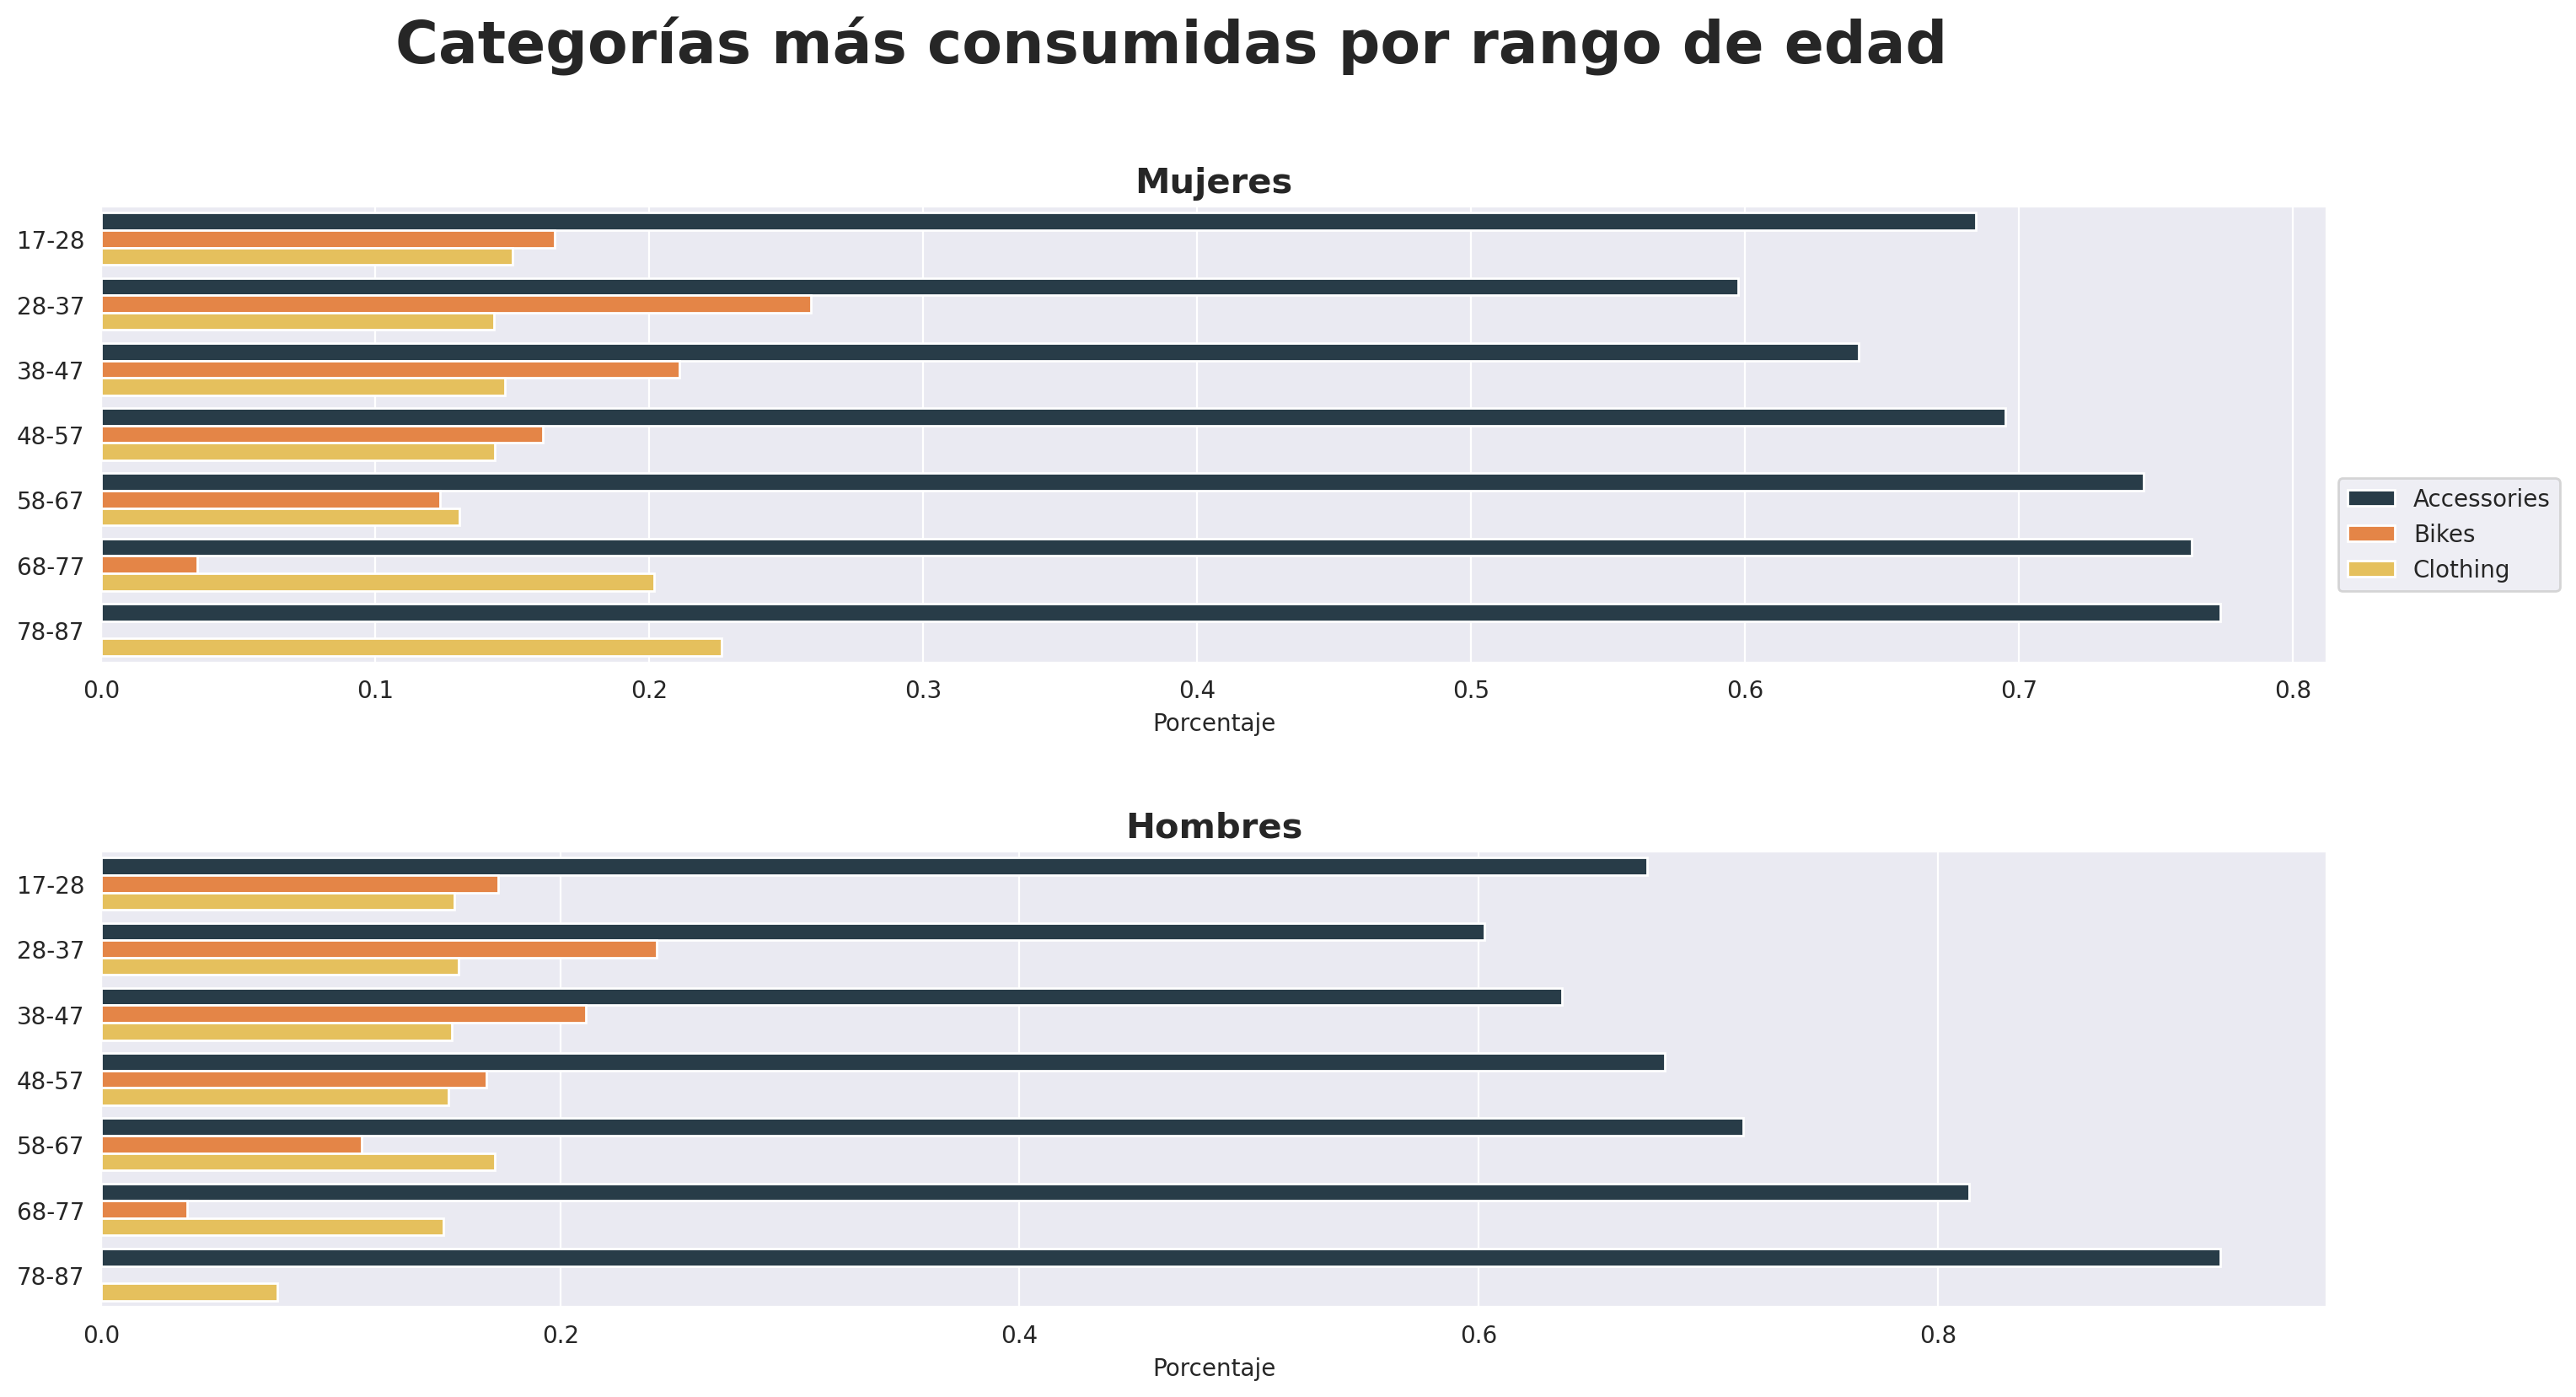

In [115]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(14, 8), dpi=200)

sns.barplot(data=female_age_category_percentage,
            x="Quantity", y="Age_range",
            hue="Product_Category", ax=ax[0])
ax[0].legend(bbox_to_anchor=(1, 0.13))
ax[0].set_xlabel("Porcentaje")
ax[0].set_ylabel("")
ax[0].set_title("Mujeres", size=15, 
                fontweight="bold")


sns.barplot(data=male_age_category_percentage,
            x="Quantity", y="Age_range",
            hue="Product_Category", ax=ax[1])
ax[1].legend().set_visible(False)
ax[1].set_xlabel("Porcentaje")
ax[1].set_ylabel("")
ax[1].set_title("Hombres", size=15, 
                fontweight="bold")


fig.subplots_adjust(hspace=100)
plt.suptitle("Categorías más consumidas por rango de edad", 
             size=25, fontweight="bold", y=1.03)
plt.tight_layout()
plt.show()

<style>
p{
  text-align: justify;  
}
</style>

* Por mucho, la categoría más vendida en todos los casos es Accessories. 
* Los grupos que consumen más productos de la categoría Bikes tienen márgenes de ganancia más bajos, mientras que los grupos que consumen menos esta categoría tienen los márgenes más altos.
* Los patrones de consumo son similares entre hombres y mujeres para todas las categorías.
* Los rangos de edad con margenes de ganacias más bajos son los mismos en los que se consume un mayor porcentaje de productos de la categoría Bikes, mientras aquellos asociados a los márgenes de ganacia más altos son los que consumen un menor porcentaje de esta categoría.

Parece haber una correlación entre el consumo de productos de la categoría bikes y los márgenes de ganacia bajos.

## Cuál es el rendimiento de cada producto?

In [116]:
# query = """
# SELECT 
# 	Product_Category,
#     Sub_Category,
#     SUM(Revenue) AS Revenue,
#     SUM(Revenue-Cost) AS Profit
# FROM sales_data
# GROUP BY Product_Category, Sub_Category
# ORDER BY Product_Category;
# """

# subcat_margin_profit = pd.read_sql_query(query, engine)
# subcat_margin_profit.head()

In [117]:
# Se calculan las ganacias y el margen 
# de ganancia por cada compra
query = """
        SELECT *,
            (Profit/Revenue) AS Margin_profit
        FROM(
            SELECT *,
                (Revenue-Cost) AS Profit
            FROM sales_data
            ) AS subquery
        ORDER BY Product_Category;
        """

df = pd.read_sql_query(query, engine)
df.head()

Date  Year     Month  Customer_Age Customer_Gender         Country  \
0 2015-12-07  2015  December            23               M          France   
1 2015-12-17  2015  December            23               M  United Kingdom   
2 2015-12-17  2015  December            23               M  United Kingdom   
3 2015-12-21  2015  December            23               M  United Kingdom   
4 2015-12-21  2015  December            23               M  United Kingdom   

           State Product_Category     Sub_Category  Quantity  Unit_Cost  \
0  Seine (Paris)      Accessories  Tires and Tubes         1      408.0   
1        England      Accessories  Tires and Tubes         1       25.0   
2        England      Accessories  Tires and Tubes         1      510.0   
3        England      Accessories  Tires and Tubes         1        9.0   
4        England      Accessories  Tires and Tubes         2       22.5   

   Unit_Price  Cost  Revenue  Profit  Margin_profit  
0       479.0   408      479      71         0.1482  
1        26.0    25       26       1         0.0385  
2       587.0   510      587      77         0.1312  
3        10.0     9       10       1         0.1000  
4        24.5    45       49       4         0.0816

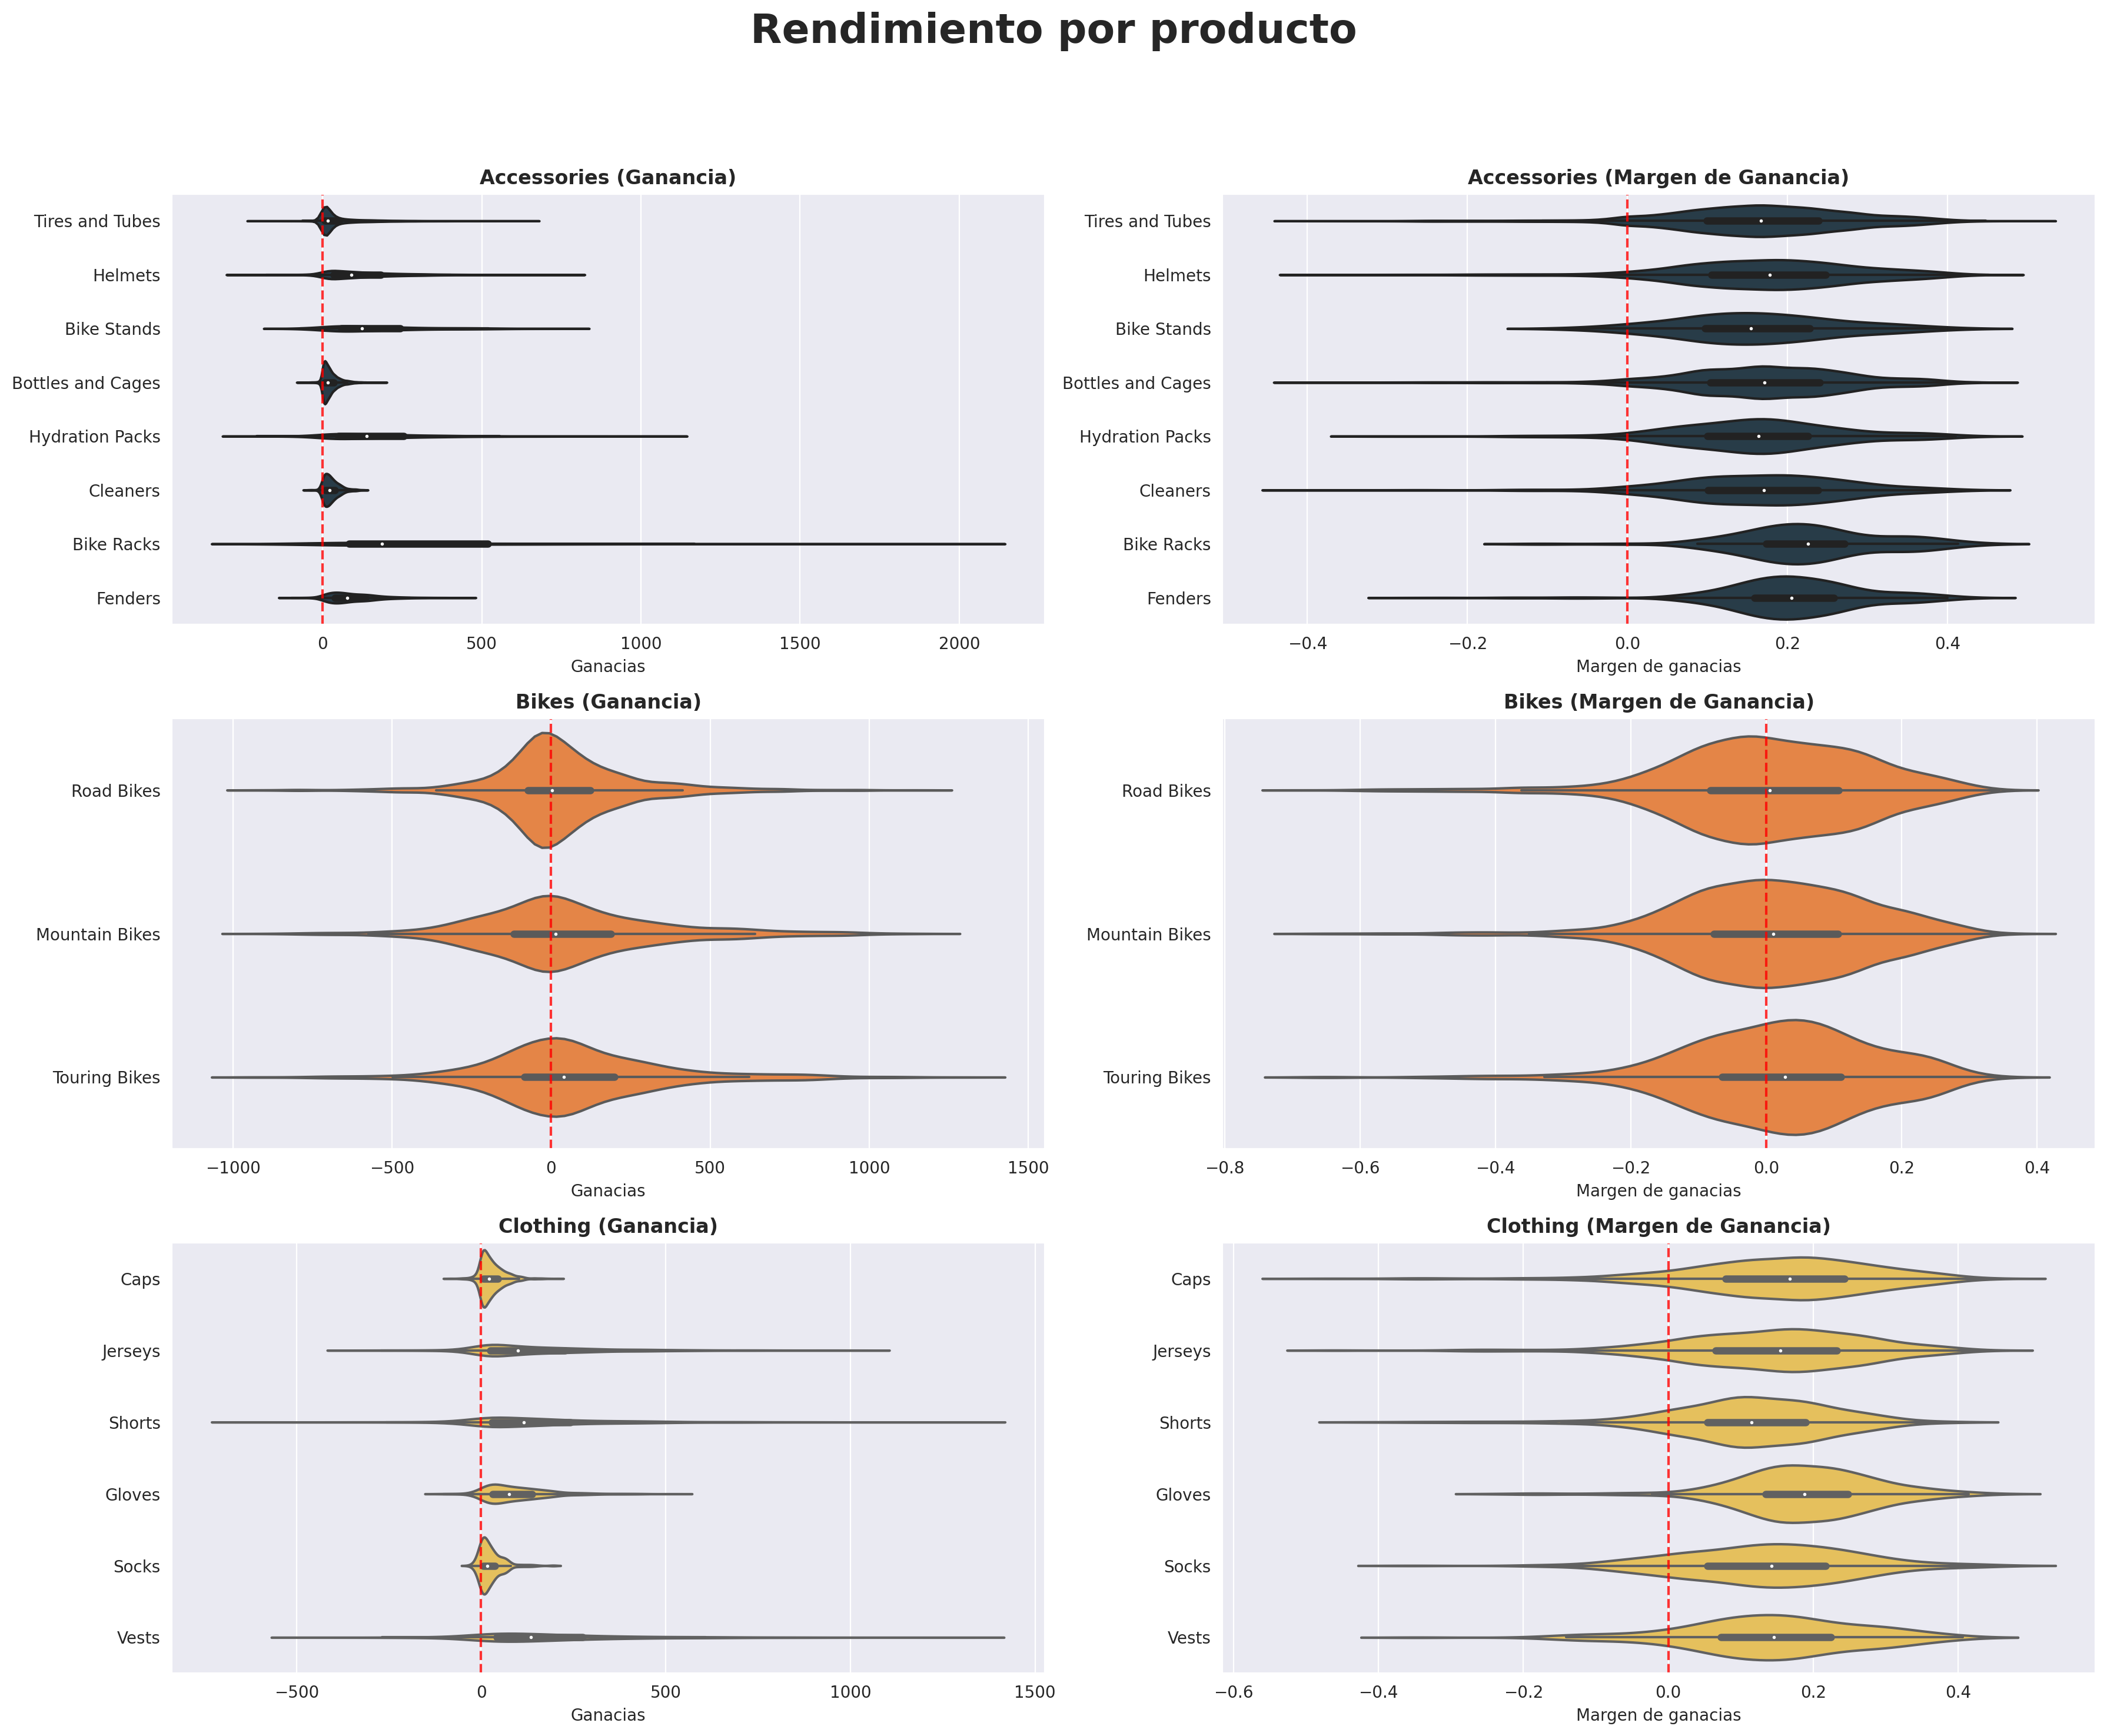

In [118]:
fig, ax = plt.subplots(nrows=3, ncols=2, 
                       figsize=(18, 14), dpi=200)
ax = ax.flat

n1 = 0
n2 = 1
for i, category in enumerate(df.Product_Category.unique()):
    sns.violinplot(data=df.query("Product_Category==@category"), 
                y="Sub_Category", x="Profit", 
                color=palette[i], ax=ax[n1])
    ax[n1].axvline(0, color="red", linestyle="dashed",
                   alpha=0.8)
    ax[n1].set_xlabel("Ganacias")
    ax[n1].set_ylabel("")
    ax[n1].set_title(f"{category} (Ganancia)",
                     fontweight="bold")


    sns.violinplot(data=df.query("Product_Category==@category"), 
                y="Sub_Category", x="Margin_profit", 
                color=palette[i], ax=ax[n2])
    ax[n2].axvline(0, color="red", linestyle="dashed",
                   alpha=0.8)
    ax[n2].set_xlabel("Margen de ganacias")
    ax[n2].set_ylabel("")
    ax[n2].set_title(f"{category} (Margen de Ganancia)",
                     fontweight="bold")


    n1 += 2
    n2 += 2


fig.suptitle("Rendimiento por producto",
             fontsize=25, fontweight="bold", y=1.05)
plt.tight_layout()
plt.show()

<style>
p {
text-align: justify;
}
</style>

* Accessories
    * Entre los productos de esta categoría se observan los niveles de ganancia más altos de todas las categorías al igual que los menores niveles de pérdidas.
    * La mayoría de los productos genera márgenes de ganancia positivos y, aunque son pocos algunos productos alcanzan márgenes negativos.
* Bikes
    * Los productos de esta categoría se distribuyen 50% pérdidas y 50% ganacias aproximadamente. 
    * Estos productos presentan los niveles más altos de pérdidas.
    * La mediana de los márgenes de ganancia se encuentra muy cerca del cero en todos los productos y aunque son pocos algunos productos alcanzan tasas del -0.8%, siendo estas las tasas de pérdida más altas de todas las categorías.
* Clothing
    * En esta categoría aunque hay pérdidas, la mayoría de los porductos generan ganacias, aunque la mayoría no son tan altas.
    * Se observan algúnos márgenes negativos, pero la gran mayoría de los productos generan tasas positivas.

El problema en el rendimiento de las ventas de los productos puede deberse a los costos. Observemos los costos por categoría

In [119]:
query = """
SELECT 
    Product_Category,
    SUM(Cost) AS Cost
FROM sales_data
GROUP BY Product_Category
ORDER BY Product_Category;
"""

cost_structure = pd.read_sql_query(query, engine)

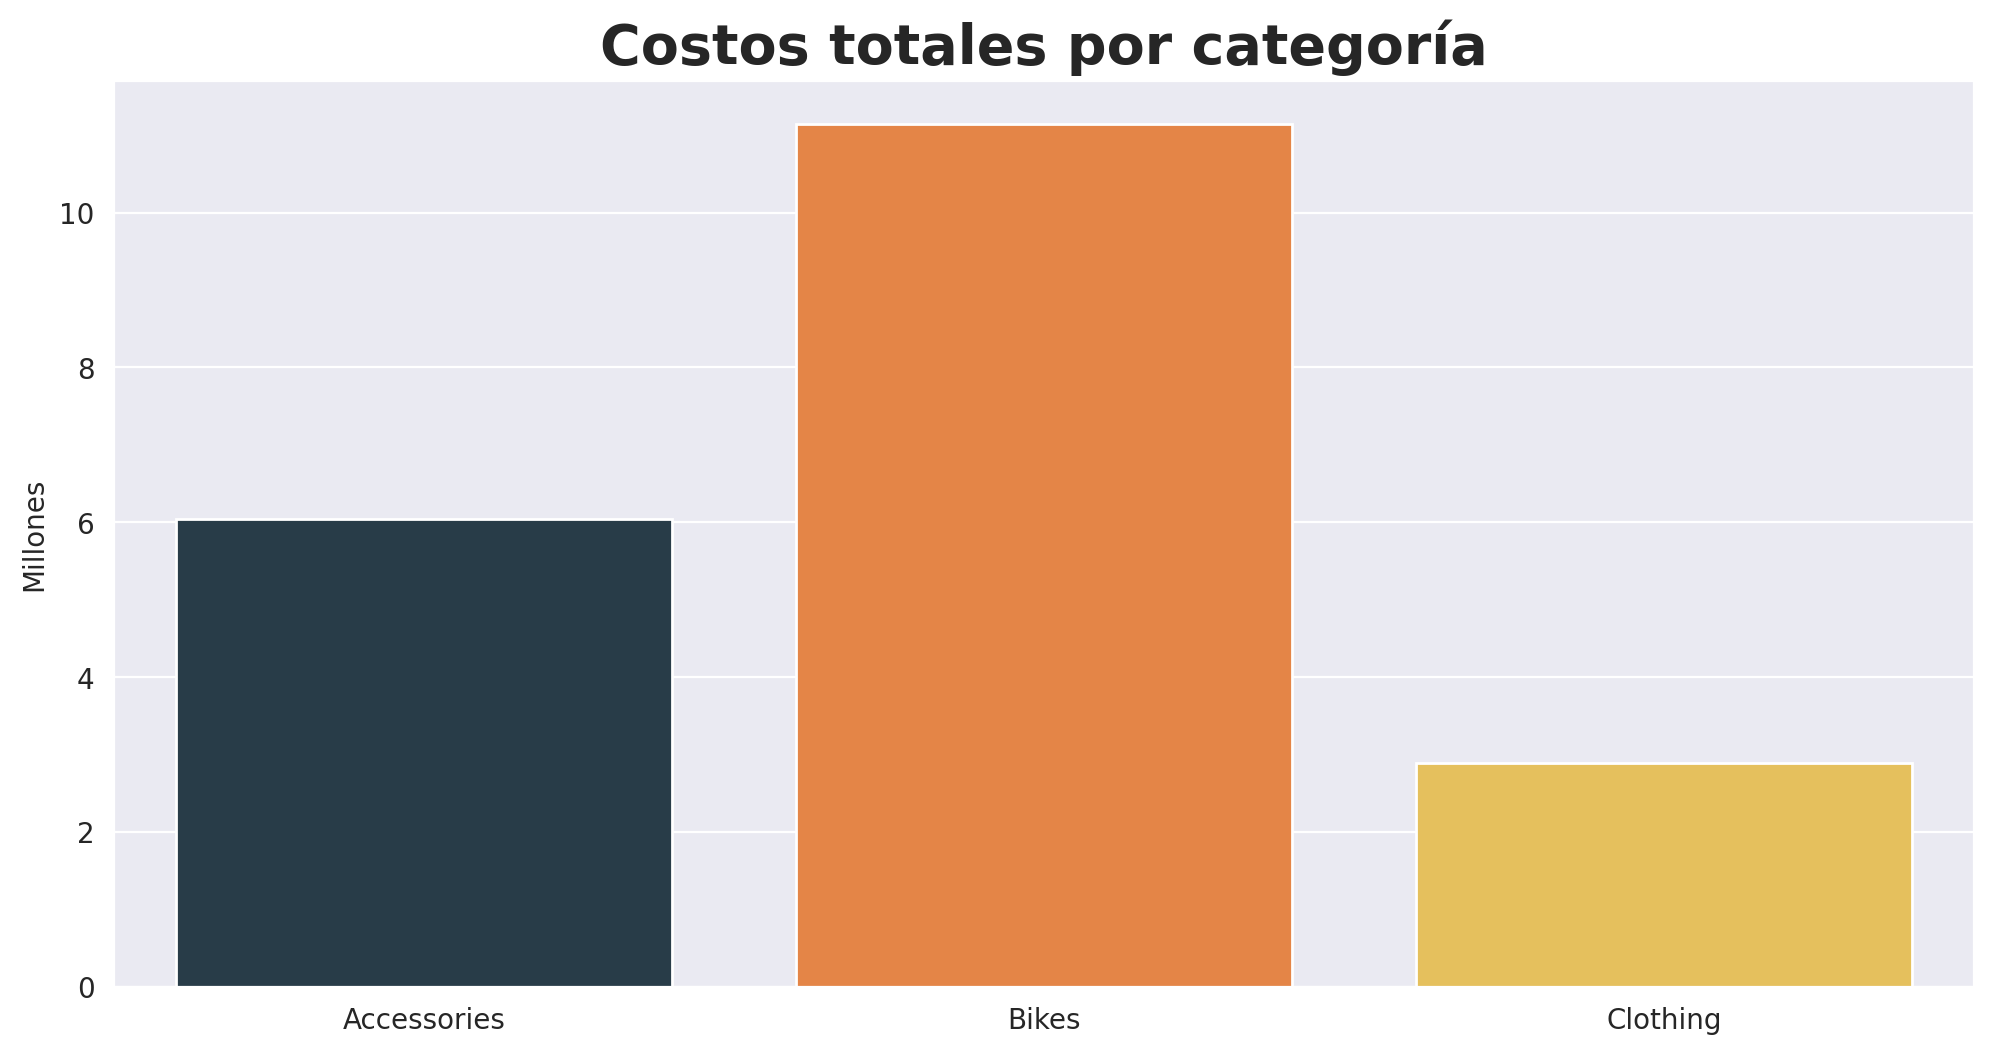

In [120]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)
ax = sns.barplot(x=cost_structure.Product_Category, y=cost_structure.Cost/1000000)
ax.set_title("Costos totales por categoría",
             fontdict={"fontweight": "bold", "fontsize": 20})
ax.set_ylabel("Millones")
ax.set_xlabel("")
plt.show()

Los productos de la categoría Bikes son los que tienen los costos más elevados, y esto genera que haya pérdidas en casi el 50% de los productos vendidos.

Es claro que existen pérdidas en las ventas, principalmente en la categoría Bikes. Aunque los problemas observados en las otras dos categorías no parecen tan graves es importante hacer un análisis más a detalle.

Observemos el comportamiento de las ventas de manera más detallada.

## Cómo se comportan las ventas a lo largo del tiempo?

### Ventas trimestrales

In [121]:
# Se calcula el margen de ganacias agrupado por trimestre

query = """
SELECT
	Quarter,
    Revenue,
    Profit,
    Margin_profit
FROM(
	SELECT Revenue,
		   Profit,
		   (Profit/Revenue) AS Margin_profit,
		   CASE
				WHEN Year = 2015 AND Quarter = 1 THEN "2015Q1"
				WHEN Year = 2015 AND Quarter = 2 THEN "2015Q2"
				WHEN Year = 2015 AND Quarter = 3 THEN "2015Q3"
				WHEN Year = 2015 AND Quarter = 4 THEN "2015Q4"
				WHEN Year = 2016 AND Quarter = 1 THEN "2016Q1"
				WHEN Year = 2016 AND Quarter = 2 THEN "2016Q2"
				ELSE "Julio2016"
		   END AS Quarter
	FROM(
		SELECT SUM(Revenue) as Revenue,
			   SUM(Revenue-Cost) AS Profit,
			   Year,
			   QUARTER(Date) AS Quarter
		FROM sales_data
		GROUP BY Year, Quarter
	) AS subquery
) AS ordered_data
ORDER BY FIELD(Quarter, "2015Q1", "2015Q2", "2015Q3", "2015Q4", "2016Q1", "2016Q2", "Julio2016");
"""

df_quarter_margin = pd.read_sql_query(query, engine)
df_quarter_margin.head()

Quarter    Revenue    Profit  Margin_profit
0  2015Q1   740764.0  -18023.0        -0.0243
1  2015Q2   942528.0  -21439.0        -0.0227
2  2015Q3  3332485.0  143202.0         0.0430
3  2015Q4  4931994.0  184880.0         0.0375
4  2016Q1  5339426.0  843621.0         0.1580

In [151]:
# Se agrupa la cantidad de ventas de cada categoría por trimestre
query = """
SELECT 
    Quarter,
    Product_Category,
    Quantity
FROM(
	SELECT 
		   CASE
				WHEN Year = 2015 AND Quarter = 1 THEN "2015Q1"
				WHEN Year = 2015 AND Quarter = 2 THEN "2015Q2"
				WHEN Year = 2015 AND Quarter = 3 THEN "2015Q3"
				WHEN Year = 2015 AND Quarter = 4 THEN "2015Q4"
				WHEN Year = 2016 AND Quarter = 1 THEN "2016Q1"
				WHEN Year = 2016 AND Quarter = 2 THEN "2016Q2"
				ELSE "Julio2016"
		   END AS Quarter,
		   Product_Category,
		   Quantity
	FROM(
		SELECT SUM(Quantity) AS Quantity,
			   Product_Category,
			   Year,
			   QUARTER(Date) AS Quarter
		FROM sales_data
		GROUP BY Year, Quarter, Product_Category
	) AS subquery
) AS ordered_data
ORDER BY FIELD(Quarter, "2015Q1", "2015Q2", "2015Q3", 
"2015Q4", "2016Q1", "2016Q2", "Julio2016");
"""

category_sales_quarter = pd.read_sql_query(query, engine)
category_sales_quarter.head()

Quarter Product_Category  Quantity
0  2015Q1            Bikes     863.0
1  2015Q2            Bikes    1177.0
2  2015Q3      Accessories    7270.0
3  2015Q3            Bikes    2177.0
4  2015Q3         Clothing    1652.0

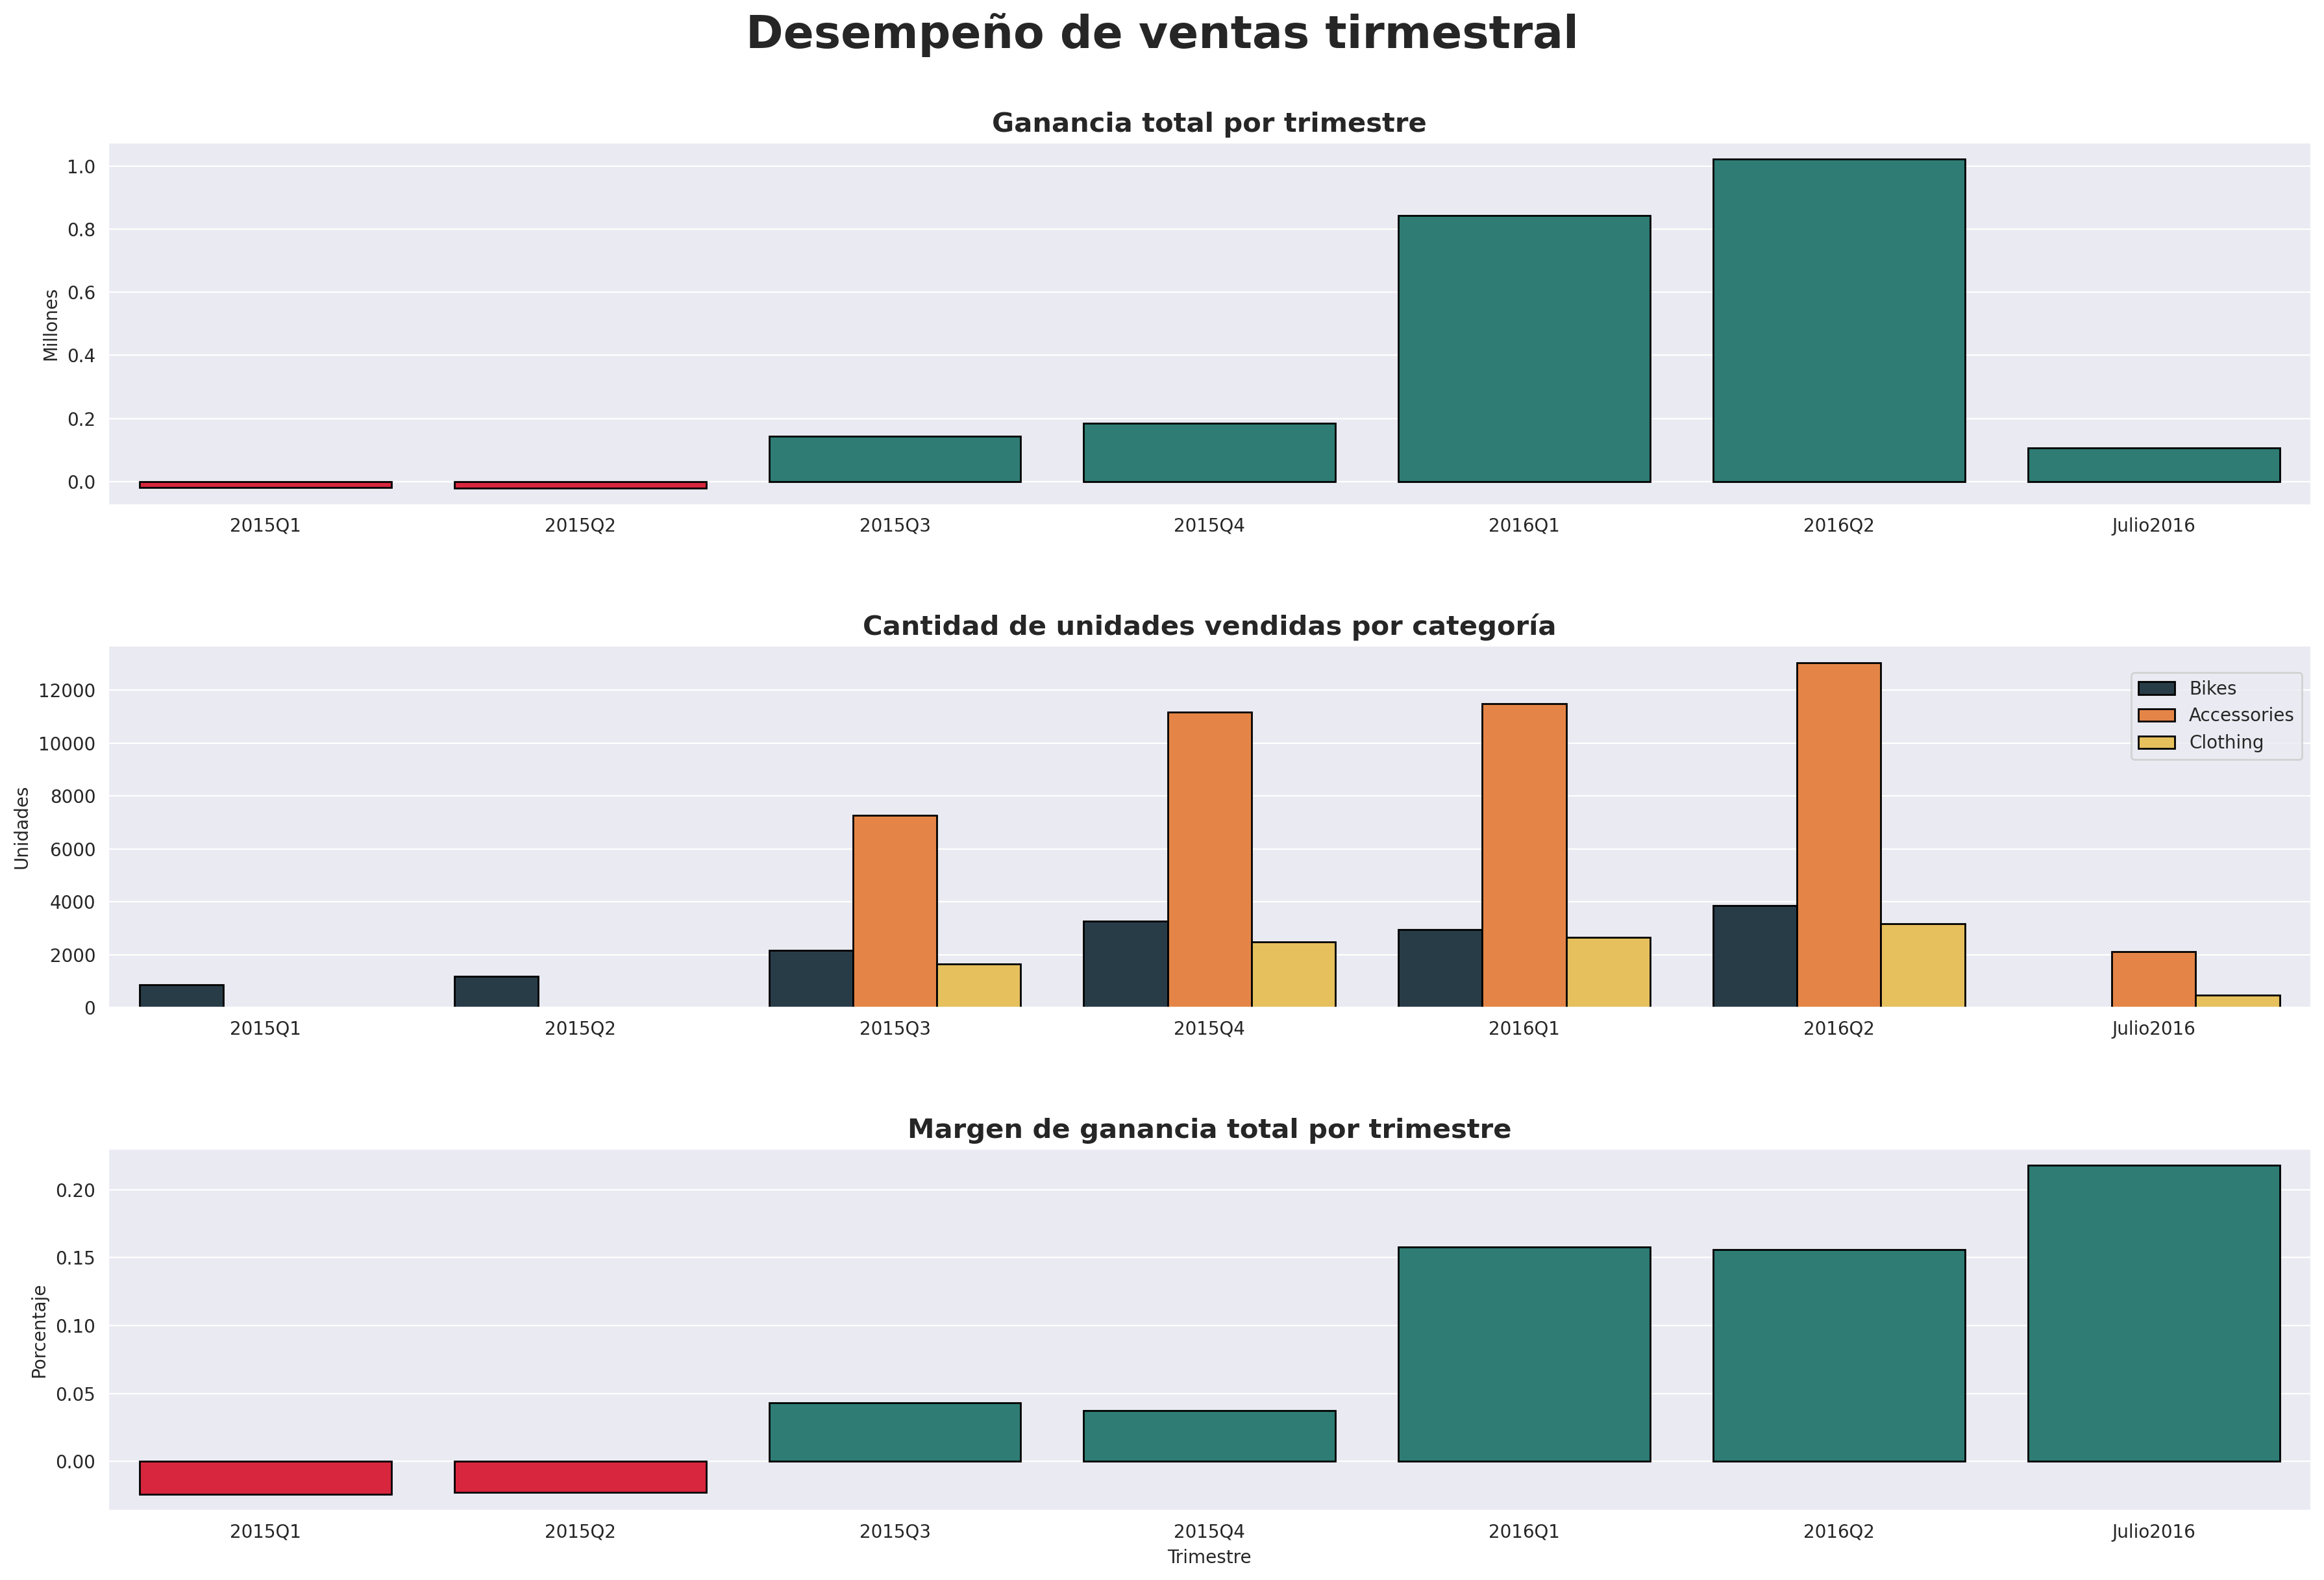

In [146]:
# Se grafican los datos de los trimestres 
fig, ax = plt.subplots(nrows=3, ncols=1,
                       figsize=(18, 12), 
                       dpi=200)
sns.barplot(data=df_quarter_margin, x="Quarter", 
            y=df_quarter_margin.Profit/1000000, color="#21897e", 
            ci=False, edgecolor="k", ax=ax[0])
ax[0].set_title("Ganancia total por trimestre", 
                size=15, fontweight="bold")
ax[0].set_ylabel("Millones")
ax[0].set_xlabel("")
patches = ax[0].patches
for patch in patches:
    if patch.get_height() < 0:
        patch.set_facecolor("#d7263d")


sns.barplot(data=category_sales_quarter, 
            x="Quarter",
            y="Quantity", hue="Product_Category",
            edgecolor="k", ax=ax[1])
ax[1].set_ylabel("Unidades")
ax[1].set_xlabel("")
ax[1].set_title("Cantidad de unidades vendidas por categoría",
                size=15, fontweight="bold")
ax[1].legend(bbox_to_anchor=(1, .95))


sns.barplot(data=df_quarter_margin, x="Quarter", 
            y="Margin_profit", color="#21897e", 
            ci=False, edgecolor="k", ax=ax[2])
ax[2].set_title("Margen de ganancia total por trimestre", 
                size=15, fontweight="bold")
ax[2].set_ylabel("Porcentaje")
ax[2].set_xlabel("Trimestre")
patches = ax[2].patches
for patch in patches:
    if patch.get_height() < 0:
        patch.set_facecolor("#d7263d")


plt.subplots_adjust(hspace=100)
plt.suptitle("Desempeño de ventas tirmestral",
          size=25, fontweight="bold", y=1.01)
plt.tight_layout()
plt.show()

En los primeros dos trimestres del 2015 se registraron pérdidas. En este periodo se vendieron unicamente atículos de la categoría Bikes.

A partir de los siguientes trimestres se reportan ganancias. Esto coincide con el incremento de la venta de artículos pertenecientes a las categorías Clothing y Accessories, principalmente esta última, que se convierte a partir del trecer trimestre de 2015 en la categoría más vendida.

Se puede observar que apartir del tercer trimestre de 2015 y hasta el segundo trimestre de 2016, las ganancias y los márgenes de ganacia se incrementan de manera importante. Durante este periodo, no se increntaron de manera significativa la venta de las categorías Bikes ni Clothing, en cambio, los productos de la categoría Accessories superaba a las otras dos juntas.

Mientras que algunos de los productos de la categoría Bikes genera pérdidas, la categoría Accessories tiene un rendimeinto muy positivo en las ganancias. 

El último periodo de estudio de 2016 solo incluye información de un mes: julio, por lo que su nivel de ganacias no puede ser comparado con los ganacias del resto. No obstante, es interesante observar que durante este mes no se vendieron artículos de la categoría Bikes, como resultado el margen de ganancia se incrementó considerablemente.

### Ventas mensuales por país

In [152]:
query = """
SELECT *,
		(Profit/Revenue) AS Margin_profit
FROM(
	SELECT 
		CONCAT(Month, RIGHT(Year, 2)) AS Month,
		Country,
		SUM(Cost) AS Cost,
		SUM(Revenue) AS Revenue,
		SUM(Revenue-Cost) AS Profit
	FROM sales_data
	GROUP BY Year, Month, Country
	ORDER BY FIELD(CONCAT(Month, RIGHT(Year, 2)),
		'January15', 'February15', 'March15', 'April15', 'May15', 'June15', 'July15',
		'August15', 'September15', 'October15', 'November15', 'December15',
		'January16', 'February16', 'March16', 'April16', 'May16', 'June16', 'July16')
) AS subquery;
"""

df_month = pd.read_sql_query(query, engine)
df_month.head()

Month         Country     Cost  Revenue  Profit  Margin_profit
0   January15          France  40723.0  40883.0   160.0         0.0039
1   January15  United Kingdom  61745.0  58419.0 -3326.0        -0.0569
2   January15   United States  95947.0  88611.0 -7336.0        -0.0828
3   January15         Germany  37913.0  42636.0  4723.0         0.1108
4  February15  United Kingdom  63466.0  59906.0 -3560.0        -0.0594

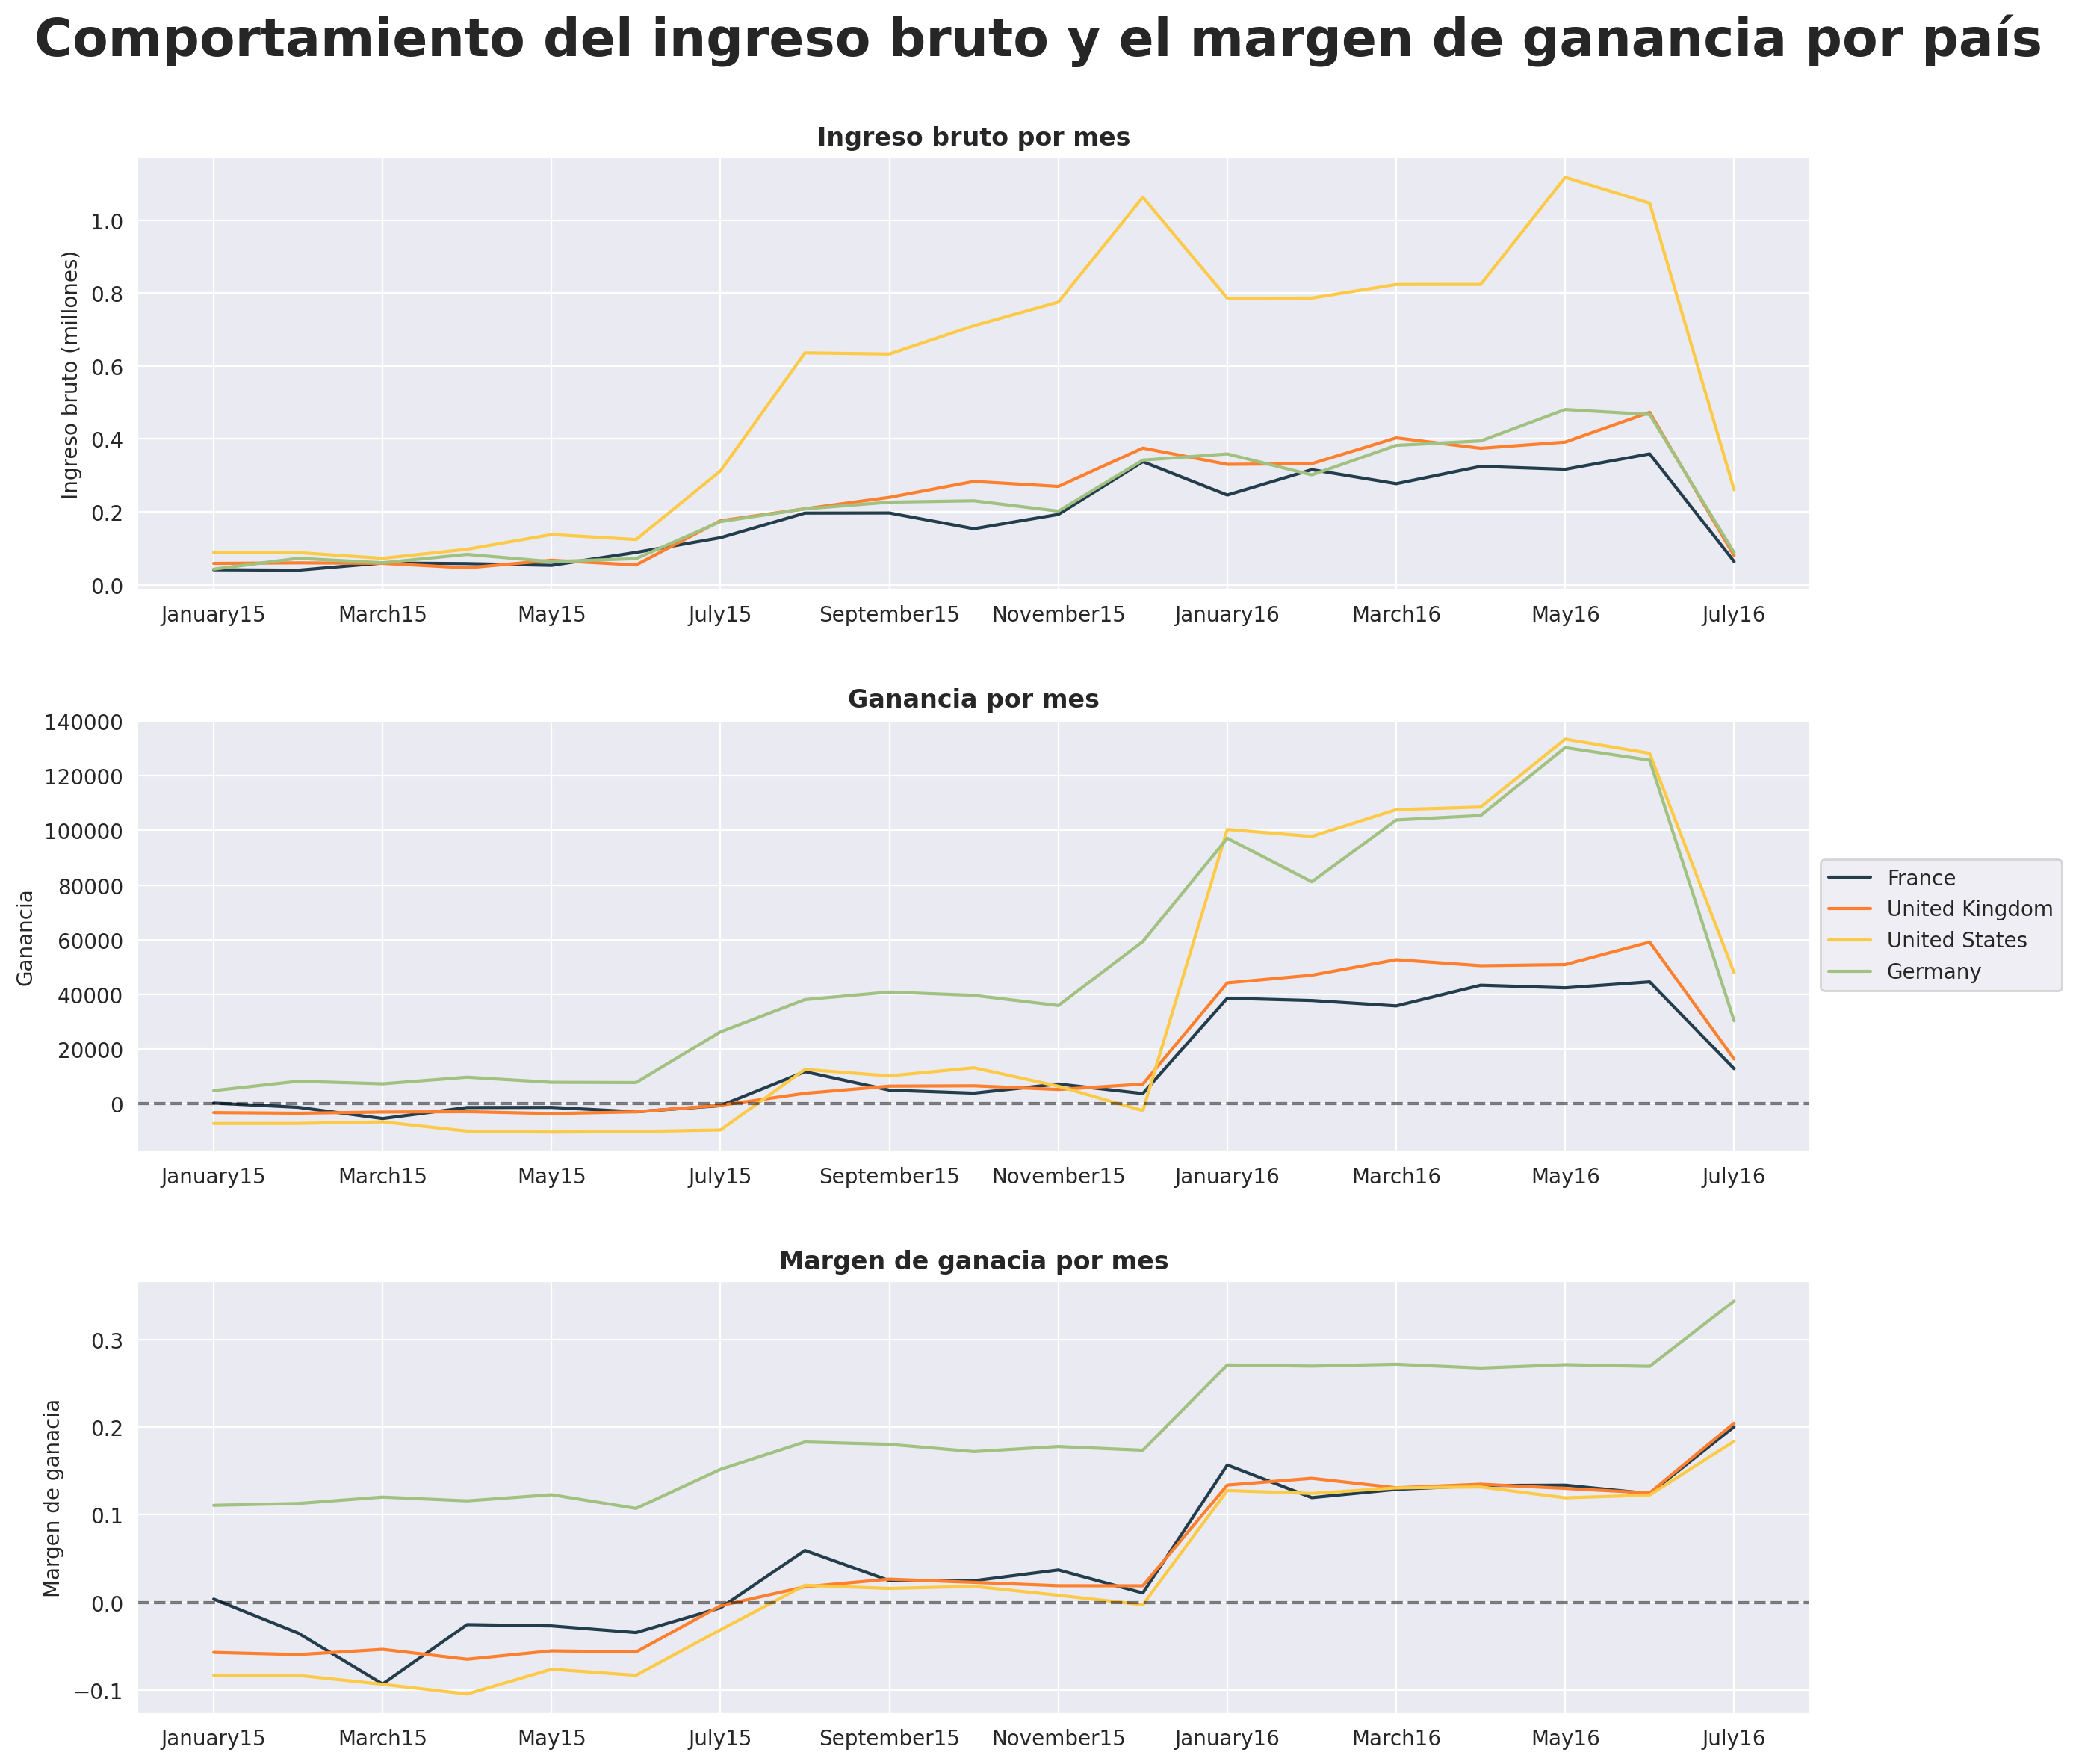

In [125]:
# Se grafican los datos
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(14, 12), dpi=200)


sns.lineplot(x=df_month.Month, 
             y=df_month.Revenue/1000000, ci=False, 
             hue=df_month.Country, ax=ax[0], 
             legend=False)
ax[0].set_ylabel("Ingreso bruto (millones)")
ax[0].set_xlabel("")
ax[0].set_xticks(df_month.Month.unique()[::2])
ax[0].set_title("Ingreso bruto por mes", fontweight="bold")

sns.lineplot(x=df_month.Month, 
             y=df_month.Profit, ci=False, 
             hue=df_month.Country,
              ax=ax[1])
ax[1].set_ylabel("Ganancia")
ax[1].set_xlabel("")
ax[1].legend(bbox_to_anchor=(1, .7))
ax[1].axhline(0, color=("black"), alpha=0.5, linestyle="--")
ax[1].set_xticks(df_month.Month.unique()[::2])
ax[1].set_title("Ganancia por mes", fontweight="bold")


sns.lineplot(x=df_month.Month, 
             y=df_month.Margin_profit, ci=False, 
             hue=df_month.Country, ax=ax[2], 
             legend=False)
ax[2].set_ylabel("Margen de ganacia")
ax[2].set_xlabel("")
ax[2].axhline(0, color=("black"), alpha=0.5, linestyle="--")
ax[2].set_xticks(df_month.Month.unique()[::2])
ax[2].set_title("Margen de ganacia por mes", fontweight="bold")


plt.tight_layout()
plt.suptitle("Comportamiento del ingreso bruto"+
             " y el margen de ganancia por país",
             size=25, fontweight="bold")
fig.subplots_adjust(top=0.9, hspace=0.3)
plt.show()


* El margen de ganacia de Estados unidos es el más bajo de todos los países a pesar de que tiene ingresos brutos mucho más altos que el resto y que sus ganancias superan al resto de países durante el primer semestre de 2016.
* Aunque Alemania tiene ingresos brutos muy por debajo de los de Estados Unidos y muy similares a Francia y Reino Unido, sus ganacias y sobre todo sus márgenes de ganancia son los más altos de los cuatro países.
* Otro hecho a destacar es que a pesar de que los ingresos brutos y el nivel de ganacia tienen una fuerte caída en julio de 2016, el margen de ganacia presenta un incremento en el mismo mes. Esto significaría que aunque se venden menos productos, las ventas se han centrado en los productos más rentables, en este caso, se dejaron de vender artículos de la categoría Bikes, como se vio en el apartado anterior.

### Categorías que más se consumen por país

In [153]:
# Se agrupan la cantidad de ventas, costos e ingresos y se
# calculan tanto las ganacias como el margen de ganacias
query = """
SELECT 
	Country,
	Product_Category,
    Quantity,
    Cost,
    Revenue,
    (Revenue-Cost) AS Profit,
    ((Revenue-Cost) / Revenue) AS Margin_profit
FROM(
    SELECT 
		Country,
		Product_Category,
		SUM(Quantity) As Quantity,
		SUM(Cost) AS Cost ,
		SUM(Revenue) AS Revenue
	FROM sales_data
	GROUP BY Country, Product_Category
    ORDER BY Country
) AS subquery;
"""
df_country_prod_cat_profit = pd.read_sql_query(query, engine)
df_country_prod_cat_profit.head()

Country Product_Category  Quantity       Cost    Revenue    Profit  \
0   France      Accessories    6626.0   905518.0  1099177.0  193659.0   
1   France            Bikes    2296.0  1857939.0  1872603.0   14664.0   
2   France         Clothing    1451.0   409990.0   474324.0   64334.0   
3  Germany      Accessories    6405.0   891007.0  1289410.0  398403.0   
4  Germany            Bikes    2588.0  2049358.0  2465427.0  416069.0   

   Margin_profit  
0         0.1762  
1         0.0078  
2         0.1356  
3         0.3090  
4         0.1688

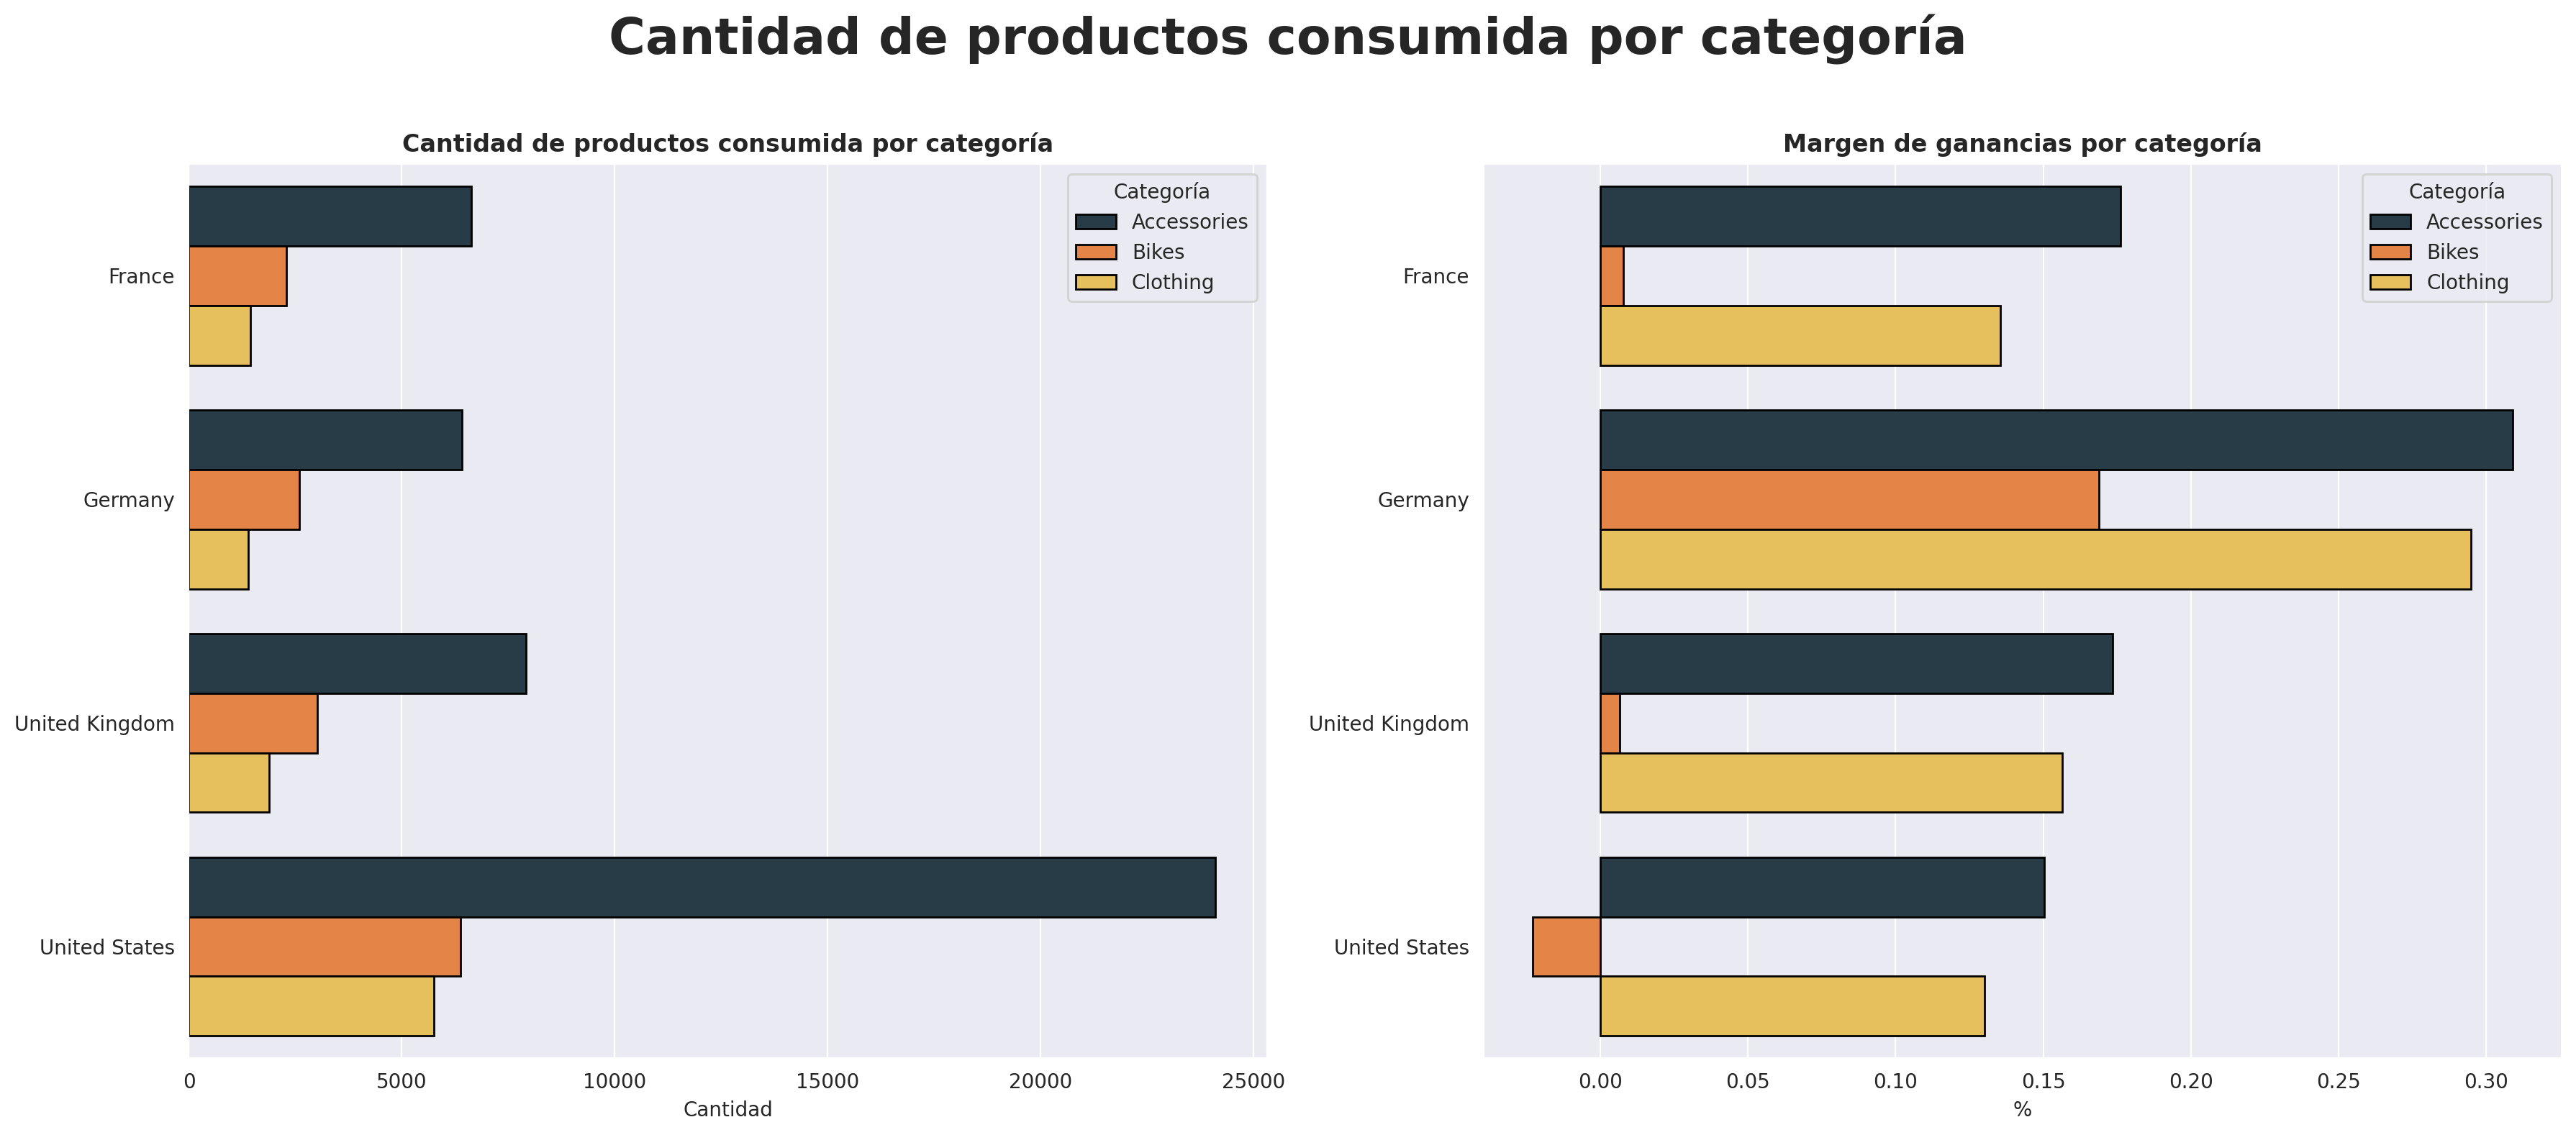

In [154]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8), dpi=200)

sns.barplot(data=df_country_prod_cat_profit,
            x="Quantity", y="Country", 
            hue="Product_Category", 
            ci=False, palette=palette[::], 
            edgecolor="k", ax=ax[0])
ax[0].set_title("Cantidad de productos consumida por categoría",
                fontweight="bold")
ax[0].legend(title="Categoría")
ax[0].set_ylabel("")
ax[0].set_xlabel("Cantidad")


sns.barplot(data=df_country_prod_cat_profit,
            x="Margin_profit", y="Country", 
            hue="Product_Category", edgecolor="k", 
            ci=False, palette=palette, ax=ax[1])
ax[1].set_title("Margen de ganancias por categoría",
               fontweight="bold")
ax[1].legend(title="Categoría")
ax[1].set_ylabel("")
ax[1].set_xlabel("%")


plt.tight_layout()
plt.suptitle("Cantidad de productos consumida por categoría", 
             size=25, fontweight="bold")
fig.subplots_adjust(top=0.85)
plt.show()

Las categorías en orden de cantidad de ventas en todos los países son:
1. Accsessories
2. Bikes
3. Clothing

La categoría con menos margen de ganancia en todos los países son las bicicletas. 
* En Alemania, el margen de ganancia de la categoría Bikes es de 17% aproximadamente.
* En Francia y Reino Unido el margen es de menos del 1%, lo que implica que los costos de esta categoría, son muy altos, prácticamente iguales a los ingresos, por lo que apenas y generan una ganancia.
* En Estados Unidos, este margen es menor a cero, esto significa que la venta de la categoría Bikes genera pérdidas en este país, debido a que los costos superan a los ingresos.


Si bien la categoría Bikes parece tener costos demasiado altos, este comprotamiento no se observa en todos los países, por lo que podría ser distinto dependendiendo del estado en el que se comercializa. De igual manera, las otras categorías podrían mostrar comportamientos distintos dependiendo del estado en el que se vende.

Es por ello que resulta conveninente desagregar las categorías con el fin de observar mejor su comportamiento

### Comportamiento de las ventas por estado

In [194]:
# Se cacula la suma de la cantidad vendida, costos
# e ingresos, agrupados por género, país, estado, 
# categoría y subcategoría y se calculan las ganancias 

query = """
SELECT 
	Customer_Gender,
    Country,
    State,
    Product_Category,
    Sub_Category,
    SUM(Quantity) AS Quantity,
    SUM(Cost) AS Cost,
    SUM(Revenue) AS Revenue,
    SUM(Revenue-Cost) AS Profit
FROM sales_data
GROUP BY 
	Customer_Gender,
    Country,
    State,
    Product_Category,
    Sub_Category
ORDER BY Country;
"""

df_state_prod_cat_profit = pd.read_sql_query(query, engine)
df_state_prod_cat_profit.head()

Customer_Gender Country            State Product_Category   Sub_Category  \
0               F  France  Garonne (Haute)            Bikes     Road Bikes   
1               M  France    Seine (Paris)            Bikes  Touring Bikes   
2               M  France    Pas de Calais         Clothing           Caps   
3               F  France          Essonne         Clothing          Socks   
4               M  France    Seine (Paris)         Clothing           Caps   

   Quantity     Cost  Revenue  Profit  
0      10.0  10672.0  10262.0  -410.0  
1      39.0  33152.0  30606.0 -2546.0  
2       4.0    126.0    136.0    10.0  
3       3.0    324.0    294.0   -30.0  
4      43.0   3303.0   3626.0   323.0

In [195]:
# Se utiliza ela función query para generar un dataframe por país
france_prod_cat_profit = df_state_prod_cat_profit.query("Country=='France'")
germany_prod_cat_profit = df_state_prod_cat_profit.query("Country=='Germany'")
united_kingdom_prod_cat_profit = df_state_prod_cat_profit.query("Country=='United Kingdom'")
united_states_prod_cat_profit = df_state_prod_cat_profit.query("Country=='United States'")

In [196]:
# Esta función recibe dos parámetros, el nombre 
# del país para agregarlo al título y un dataset 
# y regresa un conjunto de gráficos 
# del margen de ganancia por ciudad por categoría
def country_city_category_plot(data, title_country):
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 12), dpi=200)
    sns.barplot(data=data.query("Product_Category=='Bikes'"),
                x="State", y="Profit", ci=0, 
                color="#21897e", edgecolor="k", ax=ax[0])
    ax[0].set_xticklabels(ax[0].get_xticklabels(), 
                          rotation=45, ha="right")
    ax[0].axhline(0, color="black", alpha=0.9)
    ax[0].set_xlabel("")
    ax[0].set_ylabel("Ganancia")
    patches = ax[0].patches
    for i in patches:
        if i.get_height() < 0:
            i.set_facecolor("#d7263d")
    ax[0].set_title("Bikes",
            size=10, fontdict={"color":"black"}, 
            fontweight="bold", y=1.05)

    sns.barplot(data=data.query("Product_Category=='Clothing'"),
                x="State", y="Profit", ci=0, 
                color="#21897e", edgecolor="k", ax=ax[1])
    ax[1].set_xticklabels(ax[1].get_xticklabels(), 
                          rotation=45, ha="right")
    ax[1].axhline(0, color="black", alpha=0.9)
    ax[1].set_xlabel("")
    ax[1].set_ylabel("Ganancia")
    patches = ax[1].patches
    for i in patches:
        if i.get_height() < 0:
            i.set_facecolor("#d7263d")
    ax[1].set_title("Clothing",
            size=10, fontdict={"color":"black"}, 
            fontweight="bold", y=1.05)

    sns.barplot(data=data.query("Product_Category=='Accessories'"),
                x="State", y="Profit", ci=0, 
                color="#21897e", edgecolor="k", ax=ax[2])
    ax[2].set_xticklabels(ax[2].get_xticklabels(), 
                          rotation=45, ha="right")
    ax[2].axhline(0, color="black", alpha=0.9)
    ax[2].set_xlabel("")
    ax[2].set_ylabel("Ganancia")
    patches = ax[2].patches
    for i in patches:
        if i.get_height() < 0:
            i.set_facecolor("#d7263d")
    ax[2].set_title("Accessories",
            size=10, fontdict={"color":"black"}, 
            fontweight="bold", y=1.05)
    fig.suptitle(f"Ganancia por categoría por estado en {title_country}",
                size=20, fontdict={"color":"black"}, 
                fontweight="bold", y=1)

    plt.tight_layout()
    plt.show()

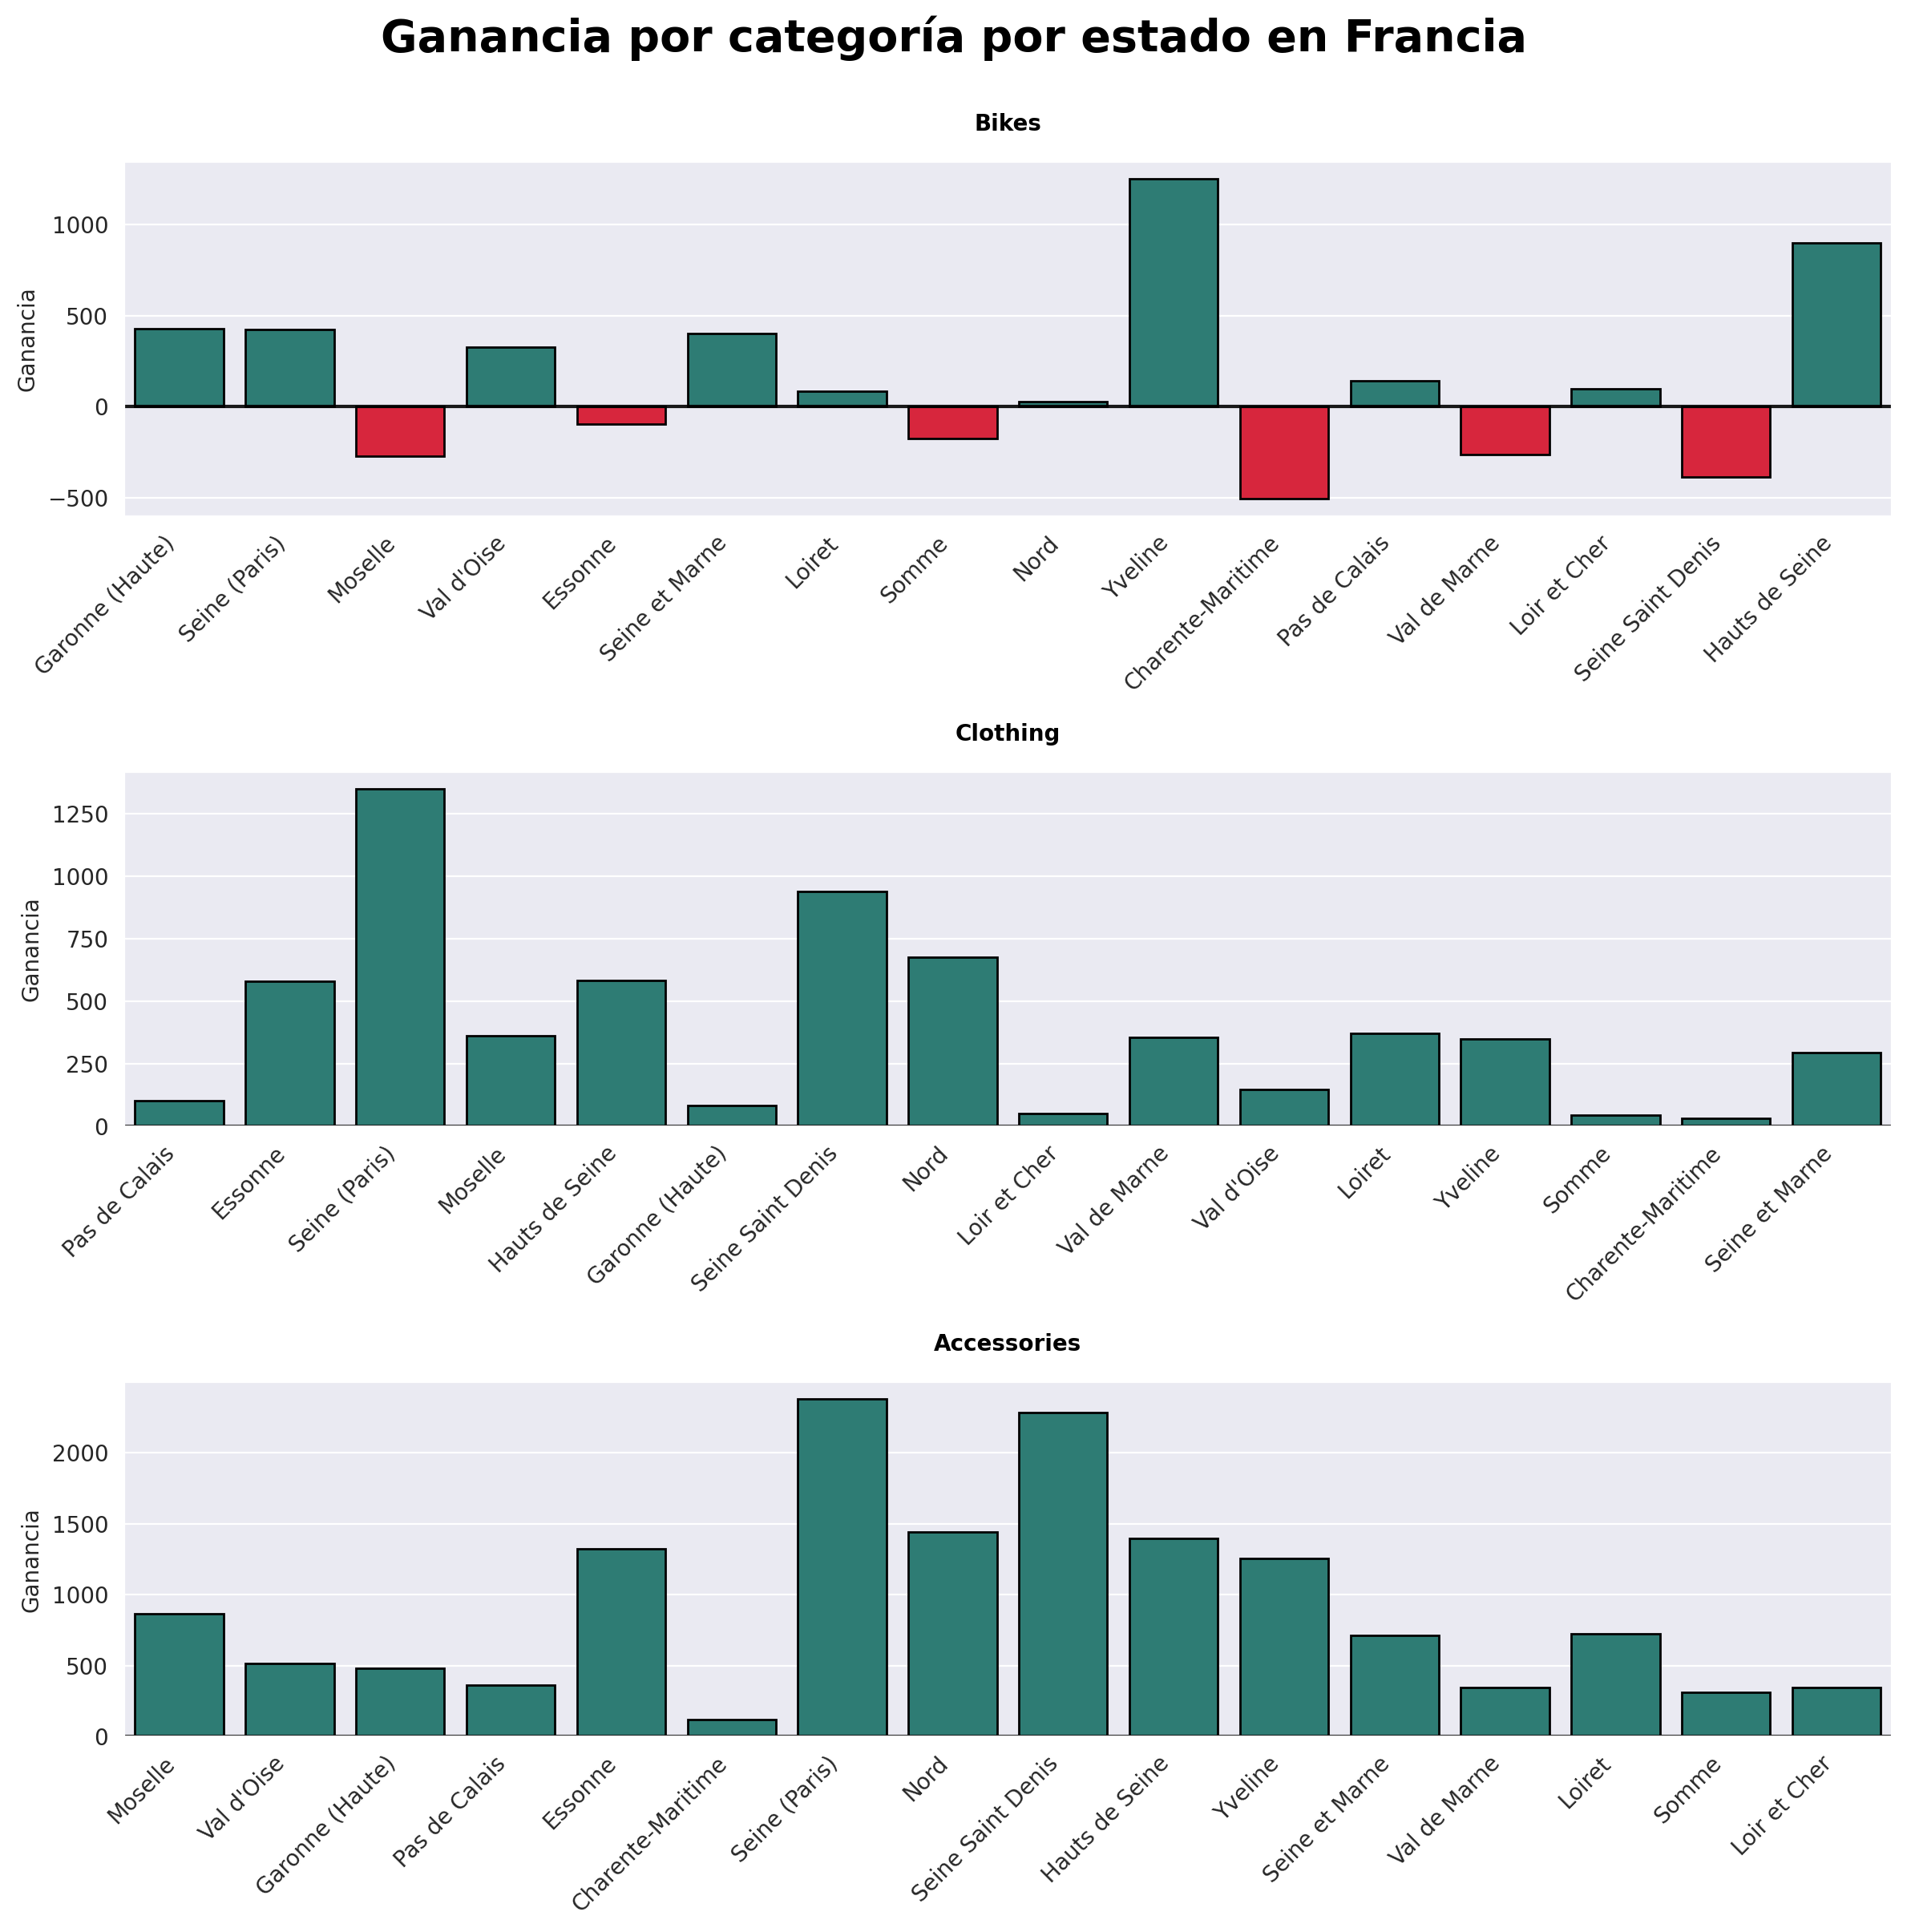

In [186]:
country_city_category_plot(data=france_prod_cat_profit, 
                            title_country="Francia")

Aparentemente, la única categoría que genera pérdidas en algunos estados es "Bikes". Analicemos las ganacias por producto y por género del cliente para conocer el comportamiento de ventas más a detalle.

In [199]:
# Esta función genera heatmaps de las ganancias generadas por cada producto
# en cada estado de un país distinguiendo a los clientes por género
# Toma como argumento un dataset previamente filtrado, la lista de las 
# categorías y un string con el nombre del país
def plot_profit_genre_product_state(data, categorias, pais):
        fig, ax = plt.subplots(figsize=(14, 20), nrows=3, 
                                ncols=2, dpi=200)
        ax = ax.flat
        n1 = 0
        n2 = 1
        for categoria  in categorias:
                female = data.query("Customer_Gender=='F' & Product_Category==@categoria")
                female = female.drop(columns=["Customer_Gender", "Country", 
                                                "Product_Category","Quantity", 
                                                "Cost", "Revenue"])
                female = female.pivot_table(index="State", columns="Sub_Category", values="Profit")

                male = data.query("Customer_Gender=='M' & Product_Category==@categoria")
                male = male.drop(columns=["Customer_Gender", "Country", 
                                                "Product_Category","Quantity", 
                                                "Cost", "Revenue"])
                male = male.pivot_table(index="State", columns="Sub_Category", 
                                        values="Profit")


                cmap = ["#d7263d", "#d7263d", "#d7263d", "#d7263d", 
                        "#d7263d", "#d7263d", "#d7263d", "#d7263d", 
                        "#d7263d", "#F7C331", "#21897e", "#21897e", 
                        "#21897e", "#21897e", "#21897e", "#21897e", 
                        "#21897e", "#21897e"]


                sns.heatmap(female, cmap=cmap, linecolor="black",
                        linewidths=0.5, vmin=female.min().min(), 
                        vmax=female.max().max(), 
                        center=0, 
                        ax=ax[n1])
                ax[n1].set_title(f"{categoria} (Female)", fontweight="bold")
                ax[n1].set_xlabel("")
                ax[n1].set_ylabel("")

                sns.heatmap(male, cmap=cmap, linecolor="black", 
                        linewidths=0.4, vmin=male.min().min(), 
                        vmax=male.max().max(), 
                        center=0,
                        ax=ax[n2])
                ax[n2].set_title(f"{categoria} (Male)", fontweight="bold")
                ax[n2].set_xlabel("")
                ax[n2].set_ylabel("")
                
                n1 += 2
                n2 += 2

        fig.suptitle(f"Ganacia de cada producto por estado en {pais}",
                size=25, fontweight="bold", y=1.01)
        plt.tight_layout()
        plt.show()

In [215]:
# El orden en el que se presentarán las categorías de los heatmaps
categorias = france_prod_cat_profit.Product_Category.unique()[::1]

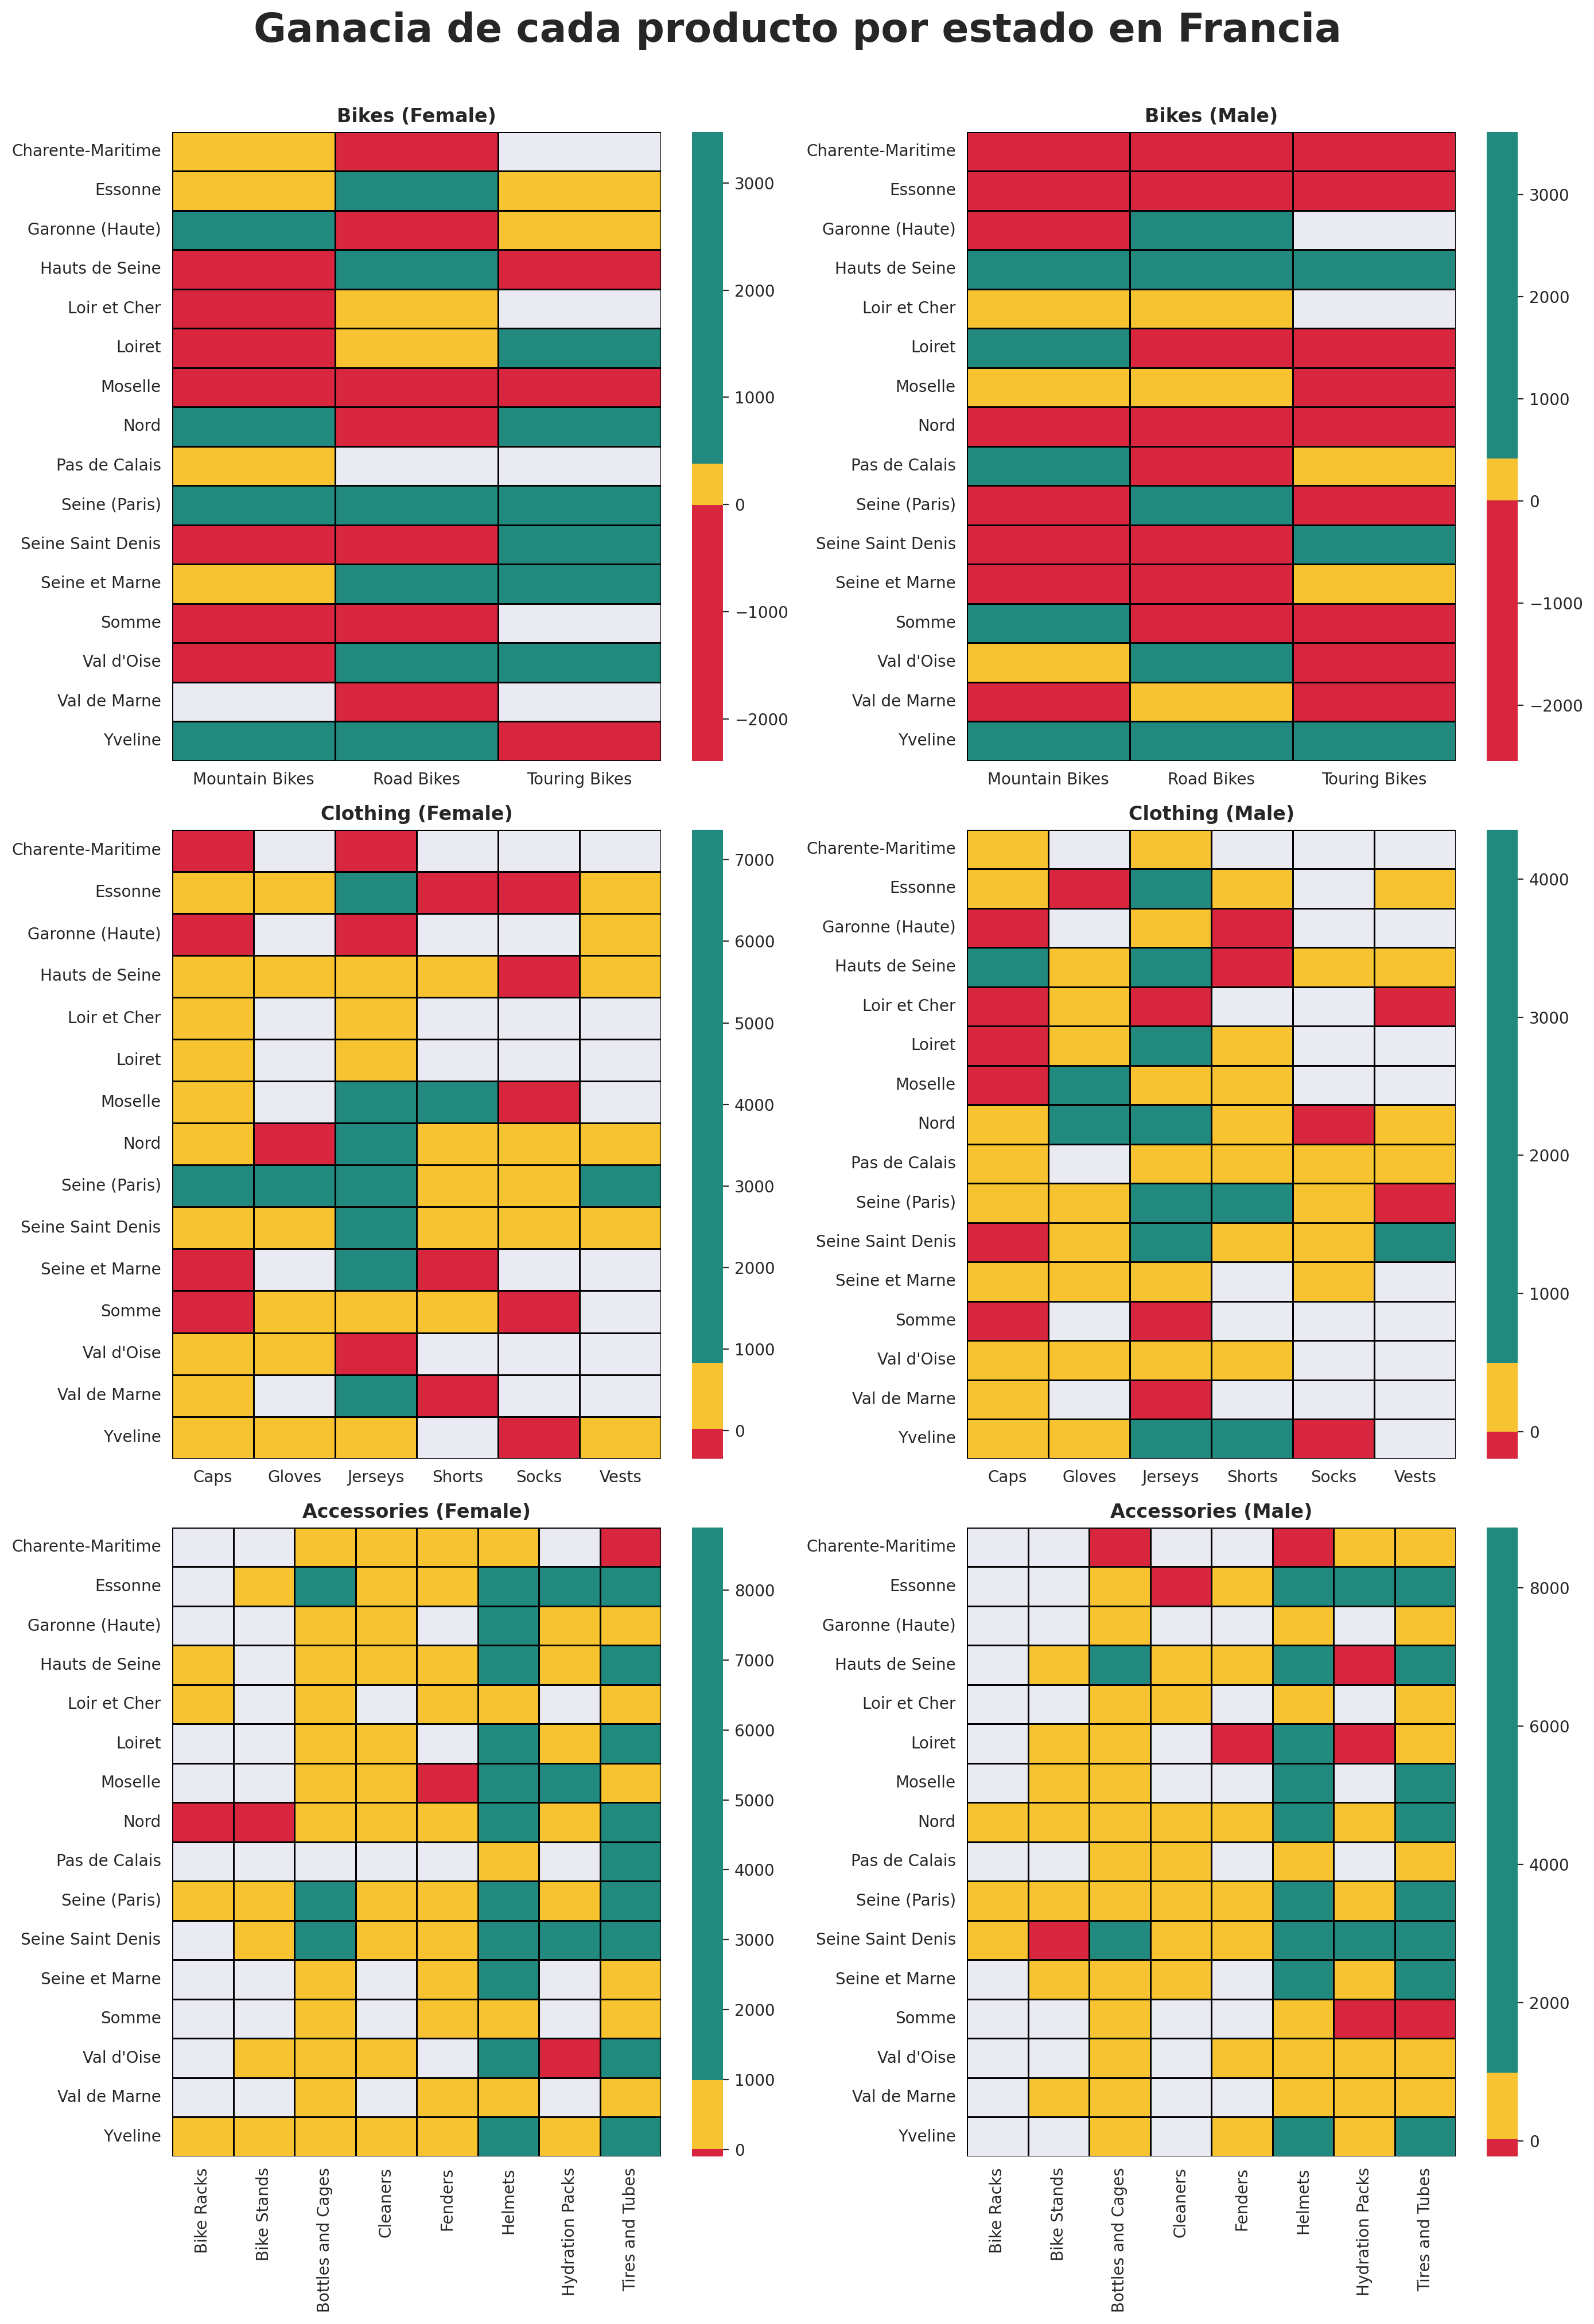

In [216]:
plot_profit_genre_product_state(data=france_prod_cat_profit,
                                categorias=categorias,
                                pais="Francia")

**Francia**
* A pesar de que el analisis de las categorías por estado mostraba que solo la categoría bikes presentaba pérdidas (color rojo), al desglosarlo se puede ver que casi todos los productos generan pérdidas o una ganacia baja (color amarillo) en por lo menos un estado. 
* Un mismo producto puede tener distinto desempeño comercial en diferentes estados. 
* El desempeño comercial de los productos varía según el género al cuál está dirigido: un producto "x" en un esatado "y" puede generar ganacias altas (color verde) en su versión para mujer y pérdidas en su versión para hombre y viceversa.
* **Bikes**
    * Es la categoría en la que los productos generan más pérdidas en los distintos estados.
    * En la categoría de mujéres, de los 16 estados en los que se venden productos de la categoría Bikes, hay solo un estado en el que todos los protuctos generan ganancias altas e incluso hay uno en el que todos generan pérdidas. En el caso de los hombres, hay tres estados en los que todos los productos generan pérdidas y solo dos estados en los que todos los productos generan ganacias altas. Esto muestra lo mal que van las ventas de la categoría Bikes en este país.
    * El producto dirigido a mujeres que genera ganancias altas en más estados son las Turing bikes, y este mismo producto es el que genera pérdidas en más estados en su versión para hombres.
    * Los productos de la categoría Bikes para hombres generan pérdidas en más estados en comparación con las que son para mujeres.
* **Clothig**
    * Los jerseys para ambos géneros son el producto que genera ganacias altas (color verde) en más estados.
    * Los calcetines para ambos géneros son los únicos que no generan ganancias altas en ningún estado, es decir solo generan o ganancias bajas o pérdidas.
    * Es más alto el número de productos que generan o ganancias bajas o pérdidas que los que generan ganancias altas en los distintos estados.
* **Accsessories**
    * Esta es la categoría en la que menos productos generan pérdidas, no obstante, la mayoría genera ganacias pequeñas.
    * Los cascos y las llantas y cámaras son los productos que generan más ganacias altas tanto entre hombres como mujeres.
    

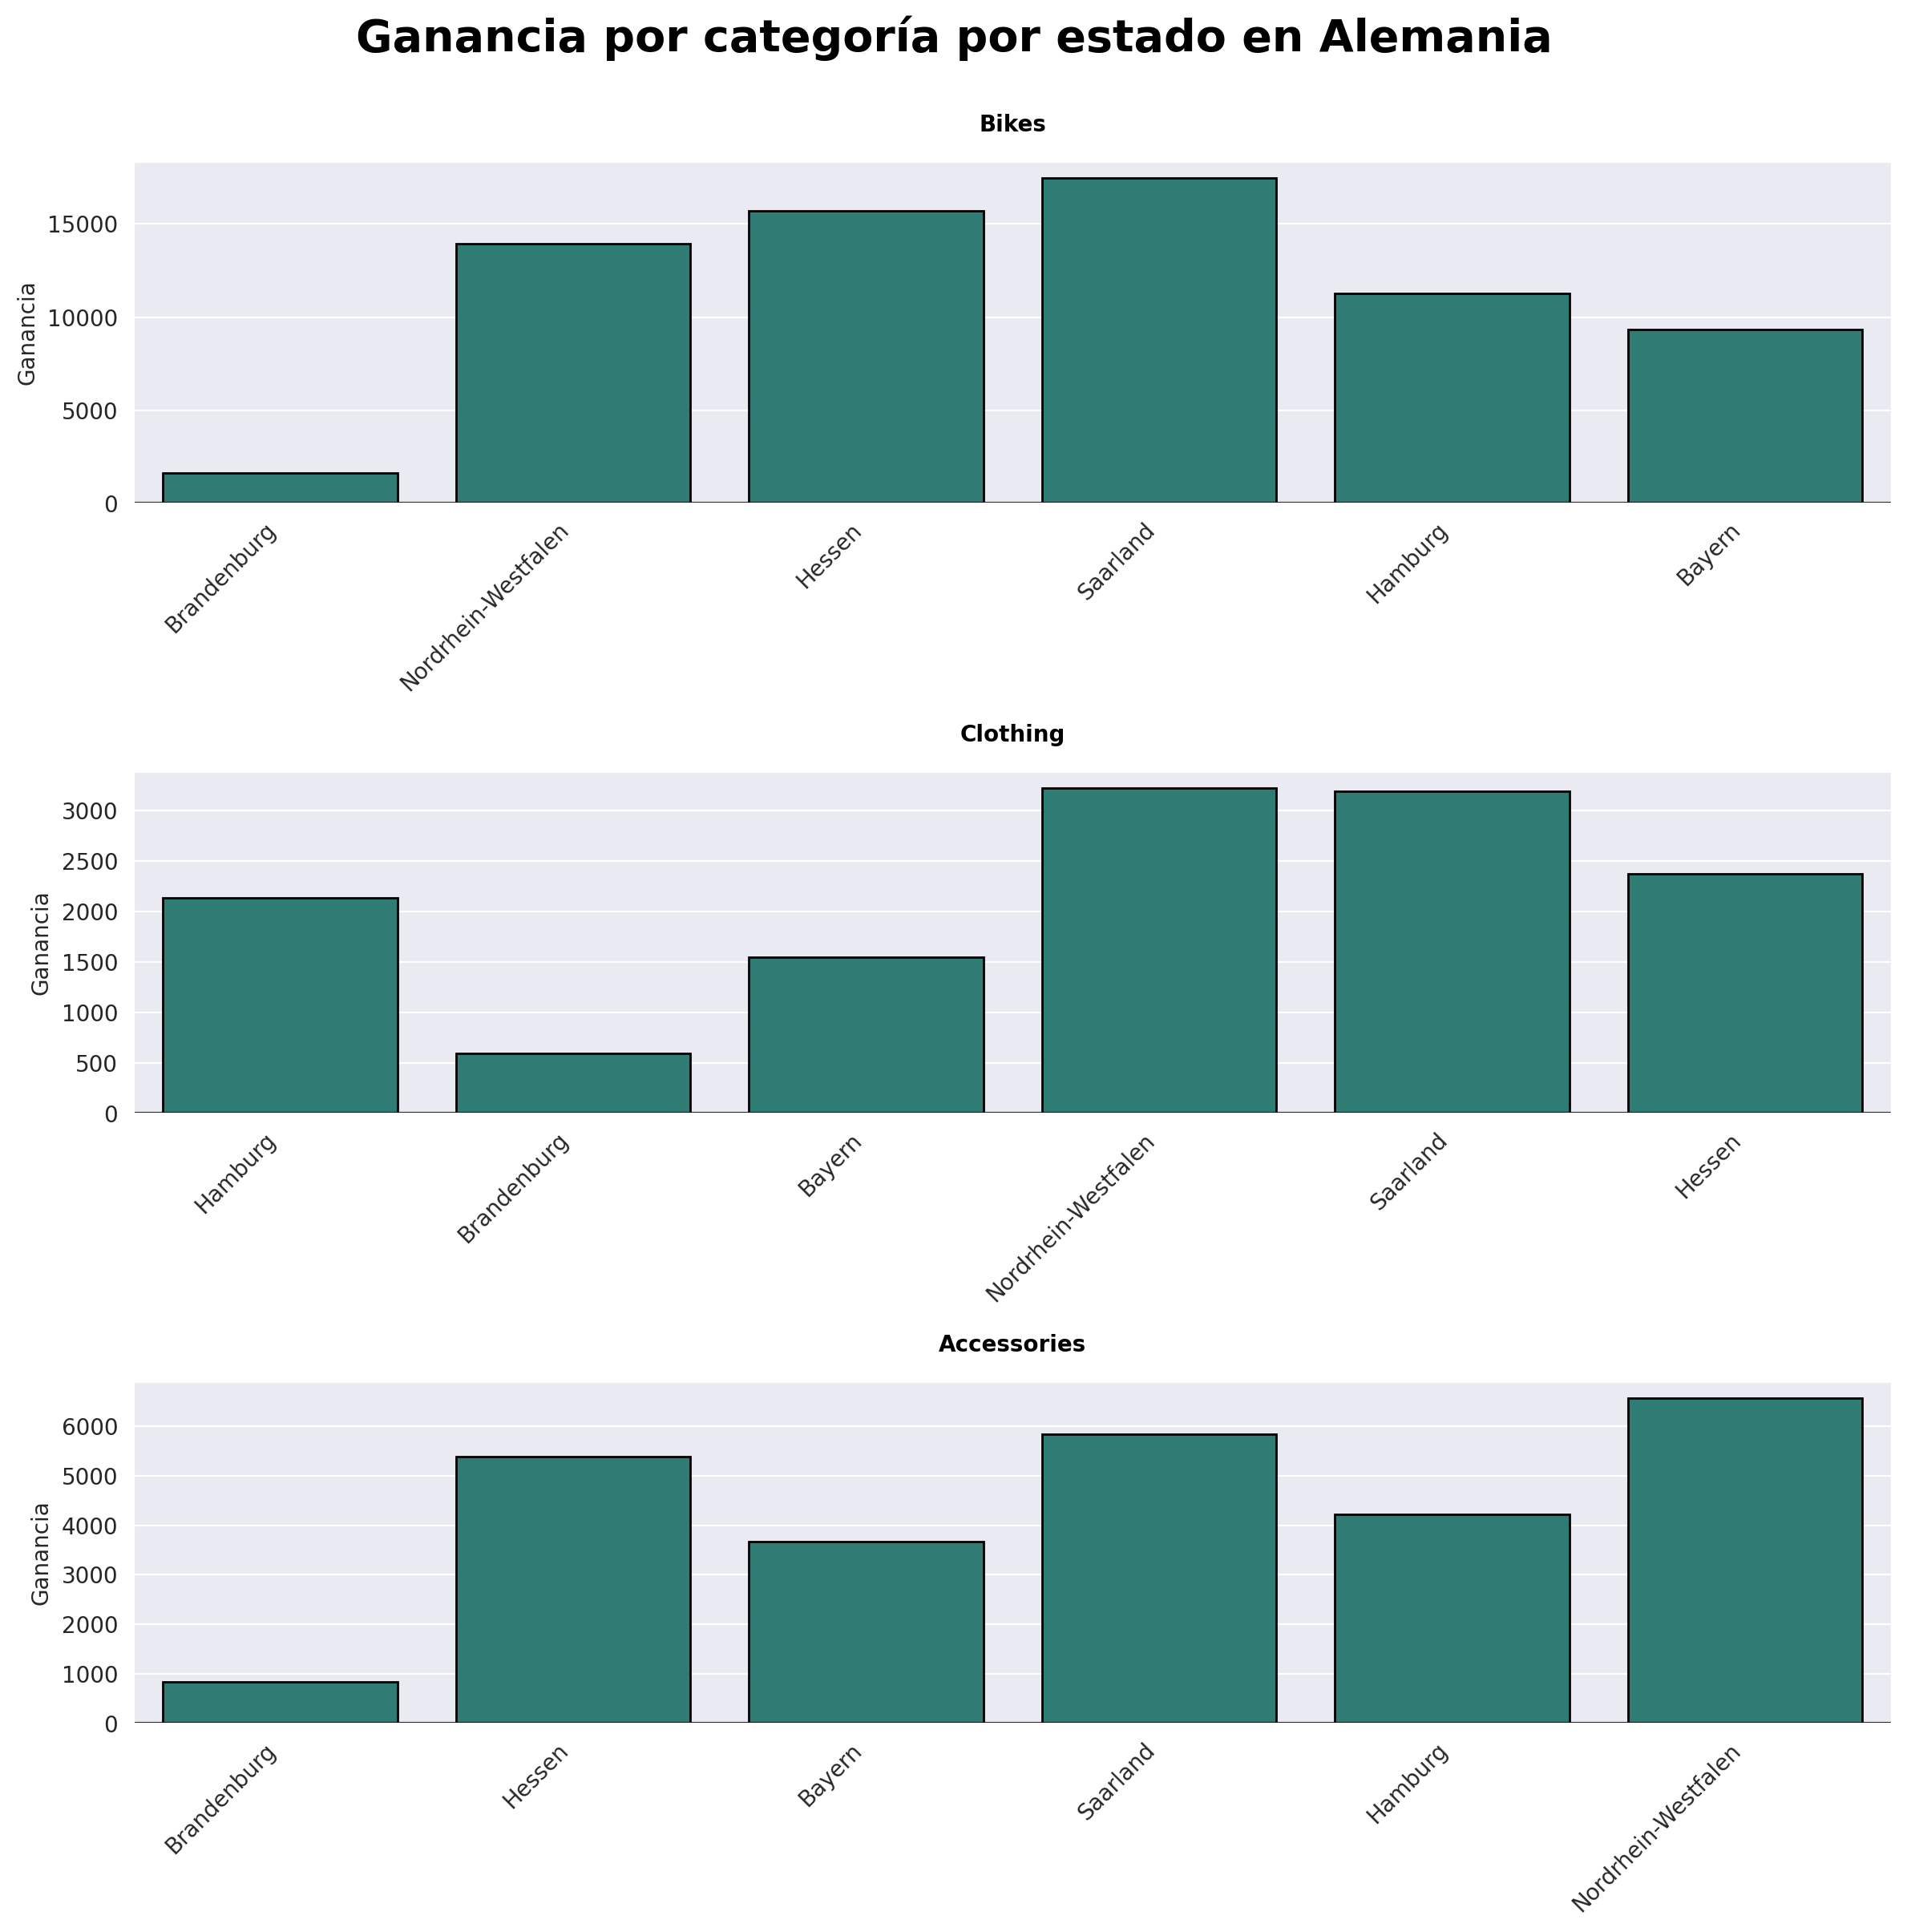

In [217]:
country_city_category_plot(data=germany_prod_cat_profit,
                            title_country="Alemania")

Analizando las ganancias por categoría, Se puede observar que ninguna genera pérdidas en niguno de los estados de alemania.

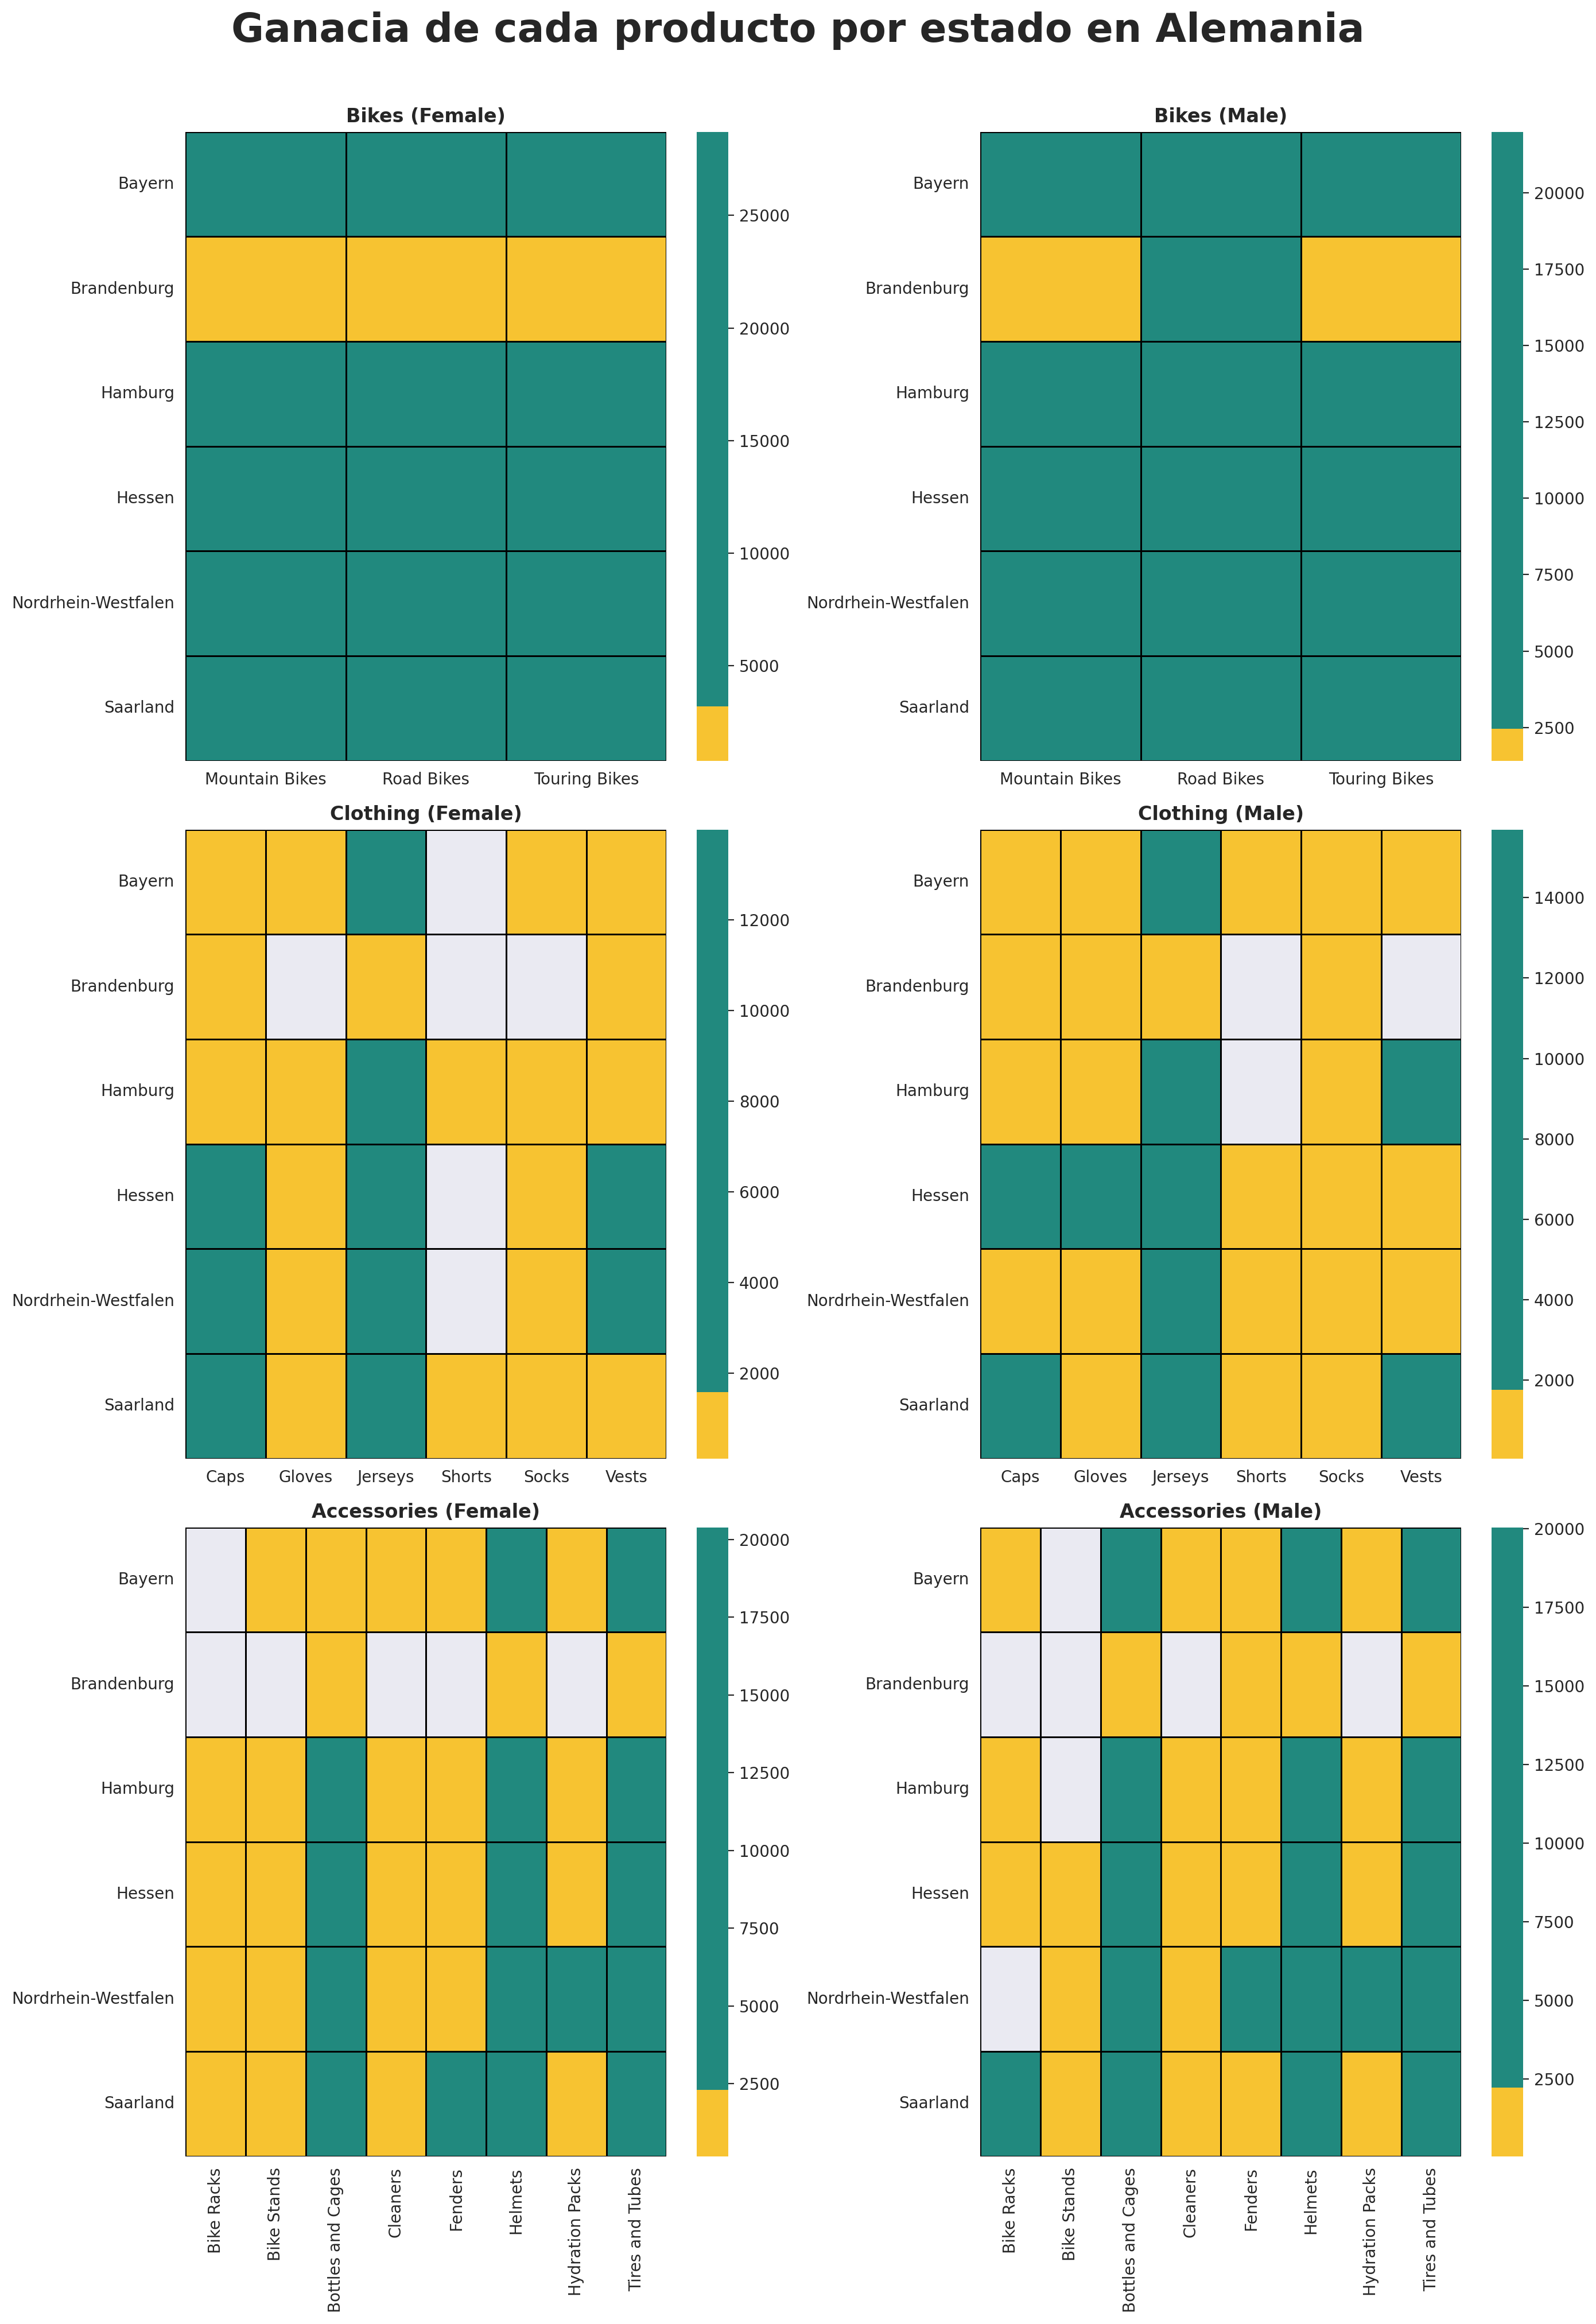

In [218]:
plot_profit_genre_product_state(data=germany_prod_cat_profit,
                                categorias=categorias,
                                pais="Alemania")

**Alemania**
* Al igual que en el análisis por categoría, se observa que ninguno de los productos genera pérdidas en ninguno de los estados, sin emabargo, en las categorías "clothing" y "Accsessories" se observan una mayoría de productos con ganacias bajas en los distintos estados.
* Existen algunos casos en los qye las ganancias de un mismo producto varían dependiendo del estado en el que se venden y del género de los clientes. Aunque, en general se observa que las ganancias de los productos se comportan de manera similar en los distintos estados y en los distíntos géneros.
* La categoría "Bikes" es la que reporta ganacias altas en más estados en sus diferentes productos, las categorías "Clothing" y "Accsessories" reportan más ganacias bajas que ganancias altas en general en los diferentes estados.
* **Bikes**
    * Brandeburg es el único estado en el se reportan ganacias bajas: todos los productos en el caso de las mujeres y mountain bikes y touring bikes en el caso de los hombres. 
    * El resto de productos reportan ganancias altas en todos los estados.
* **Clothing**
    * Los jerseys son el producto con más ganacias altas en los distintos estados, tanto para hombre como para mujer.
    * Los calcetines son el único producto que solo reporta ganacias bajas en todos los estados en el caso de los hombres, respecto a las mujeres son los calcetines y los guantes los que tienen este mismo comportamiento.
    * Brandeburg es el único estado que solo reporta ganacias bajas en todos los productos.
* **Accessories**
    * Los cascos, botellas y jaulas y las llantas y cámaras son los productos que generan más ganacias altas n distintos estados tanto entre hombres como mujeres.
    * El resto de productos generan ganacias bajas en todos o en casi todos los estados.


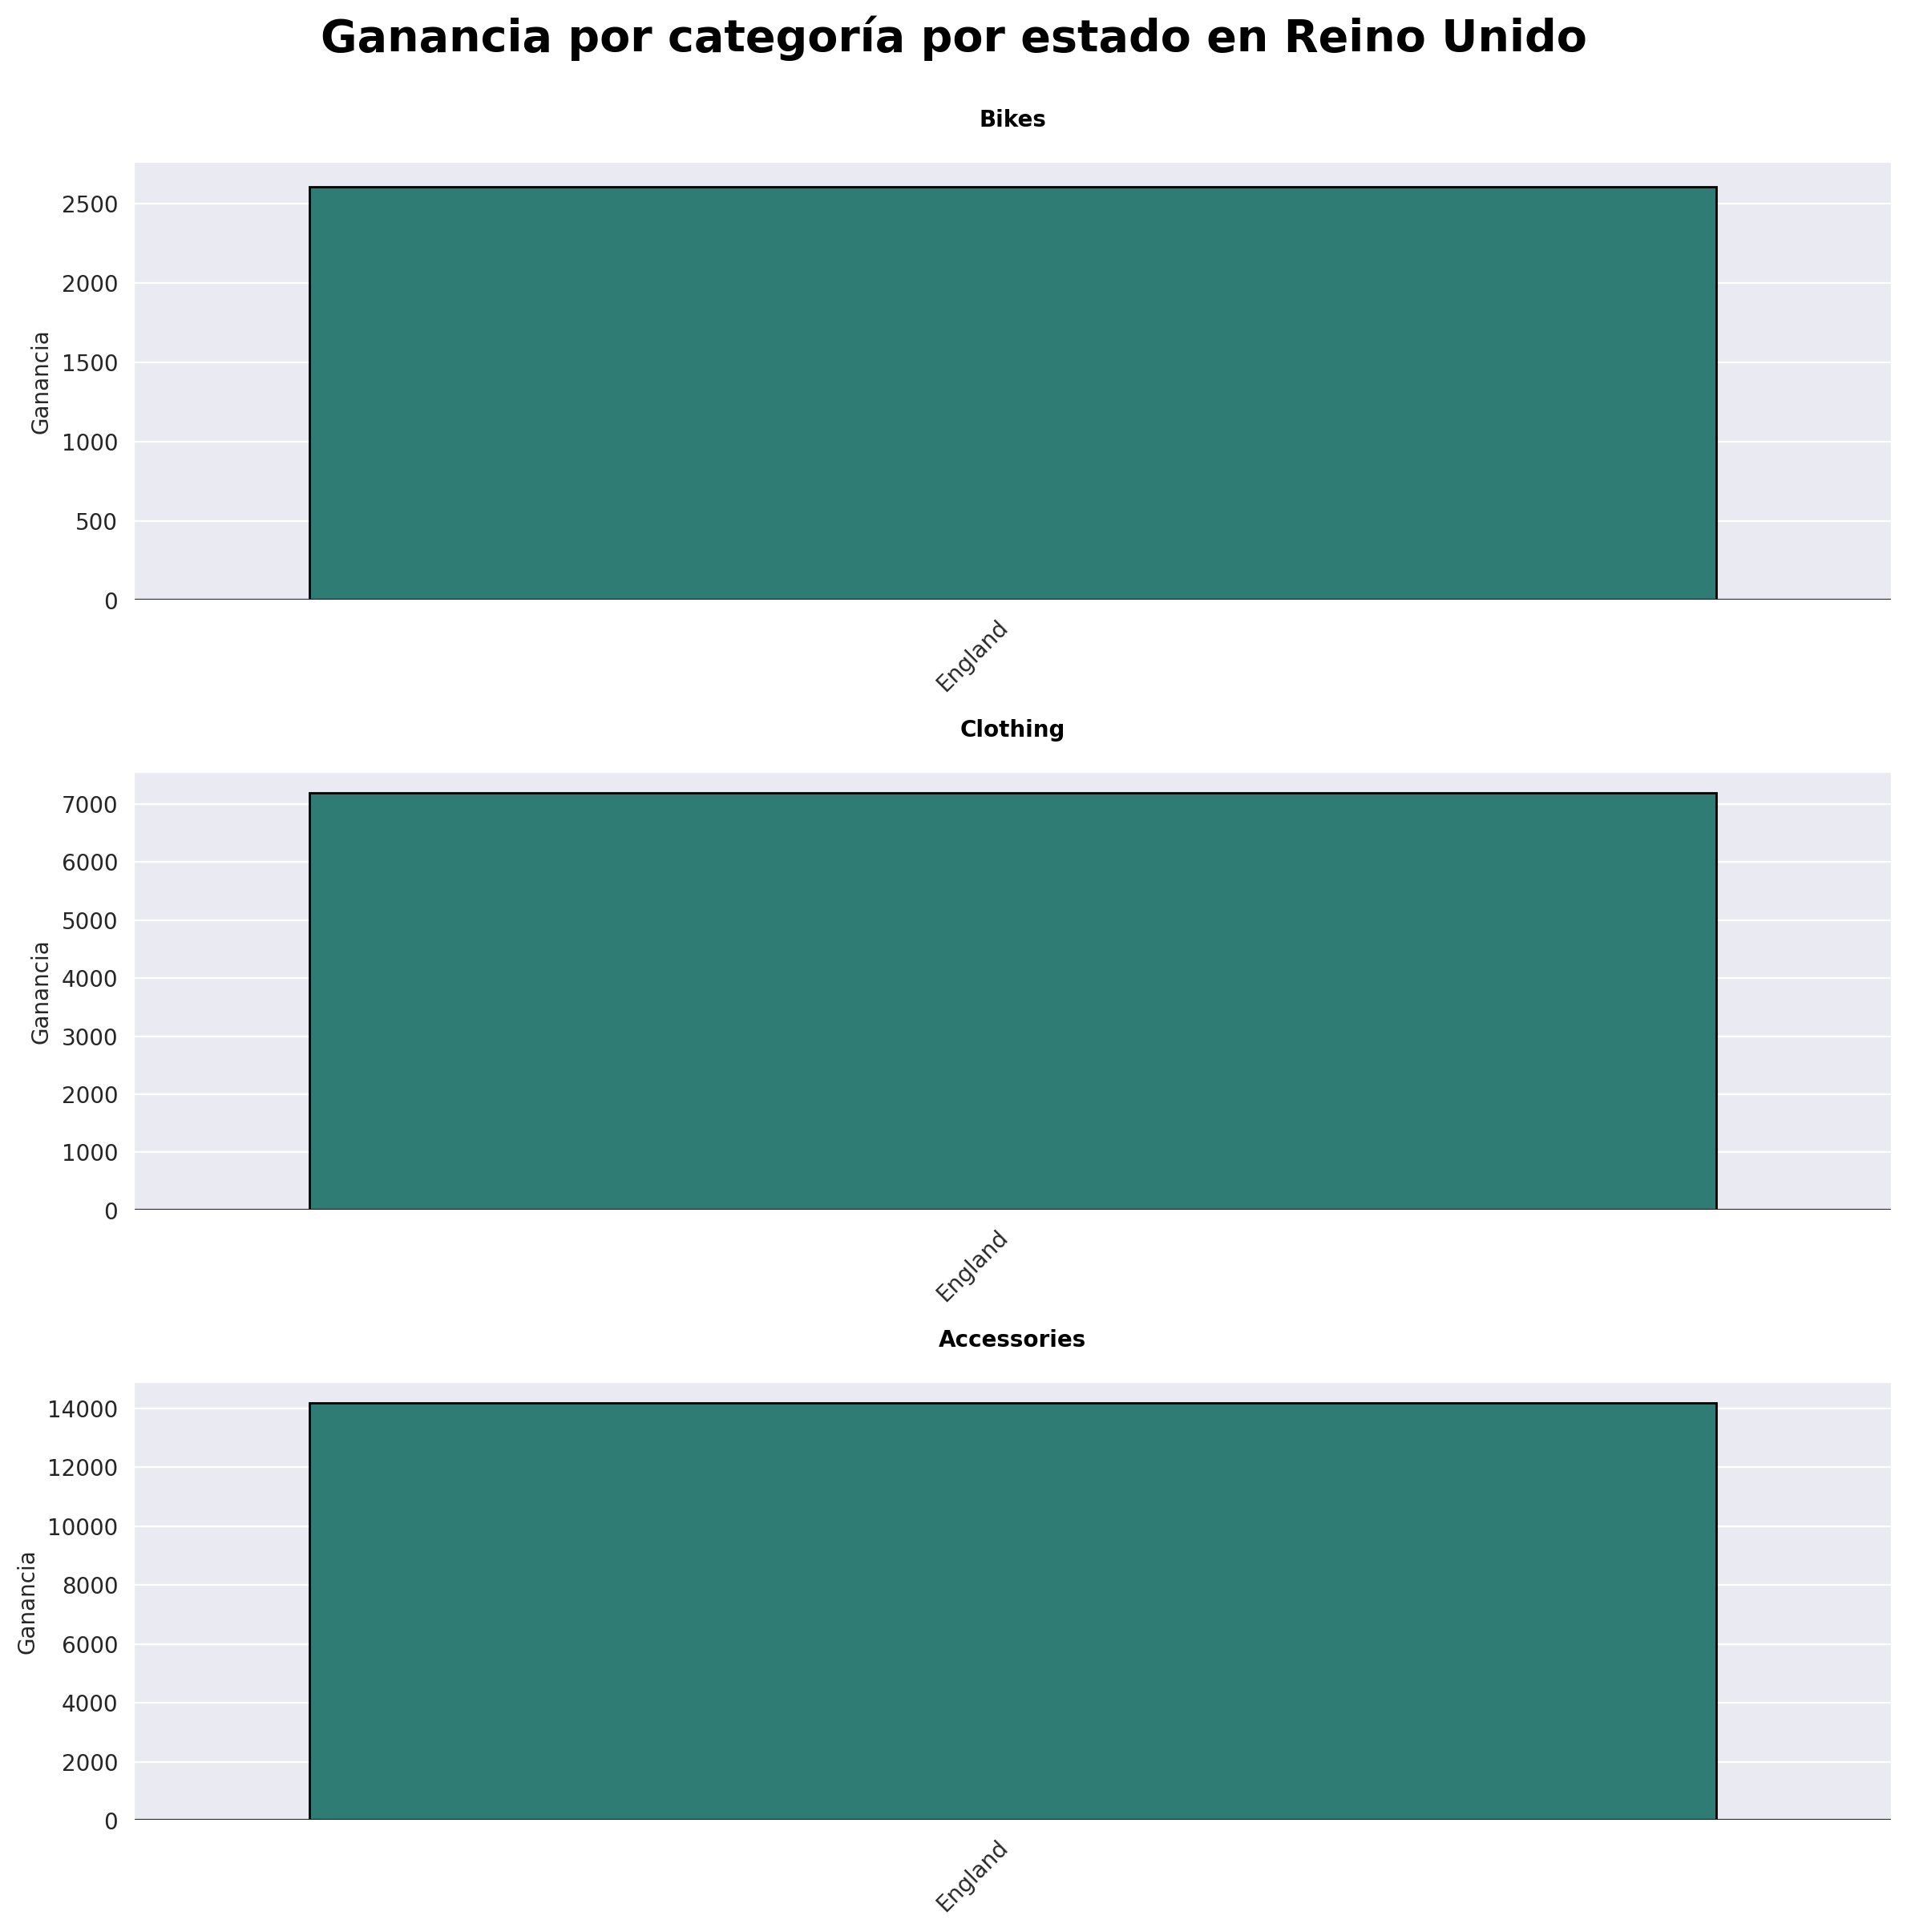

In [219]:
country_city_category_plot(data=united_kingdom_prod_cat_profit,
                            title_country="Reino Unido")

Inglaterra solo tiene un estado como punto de venta. De eacuerdo con el análisis por categoría, no se reportan pérdidas en Reino Unido.

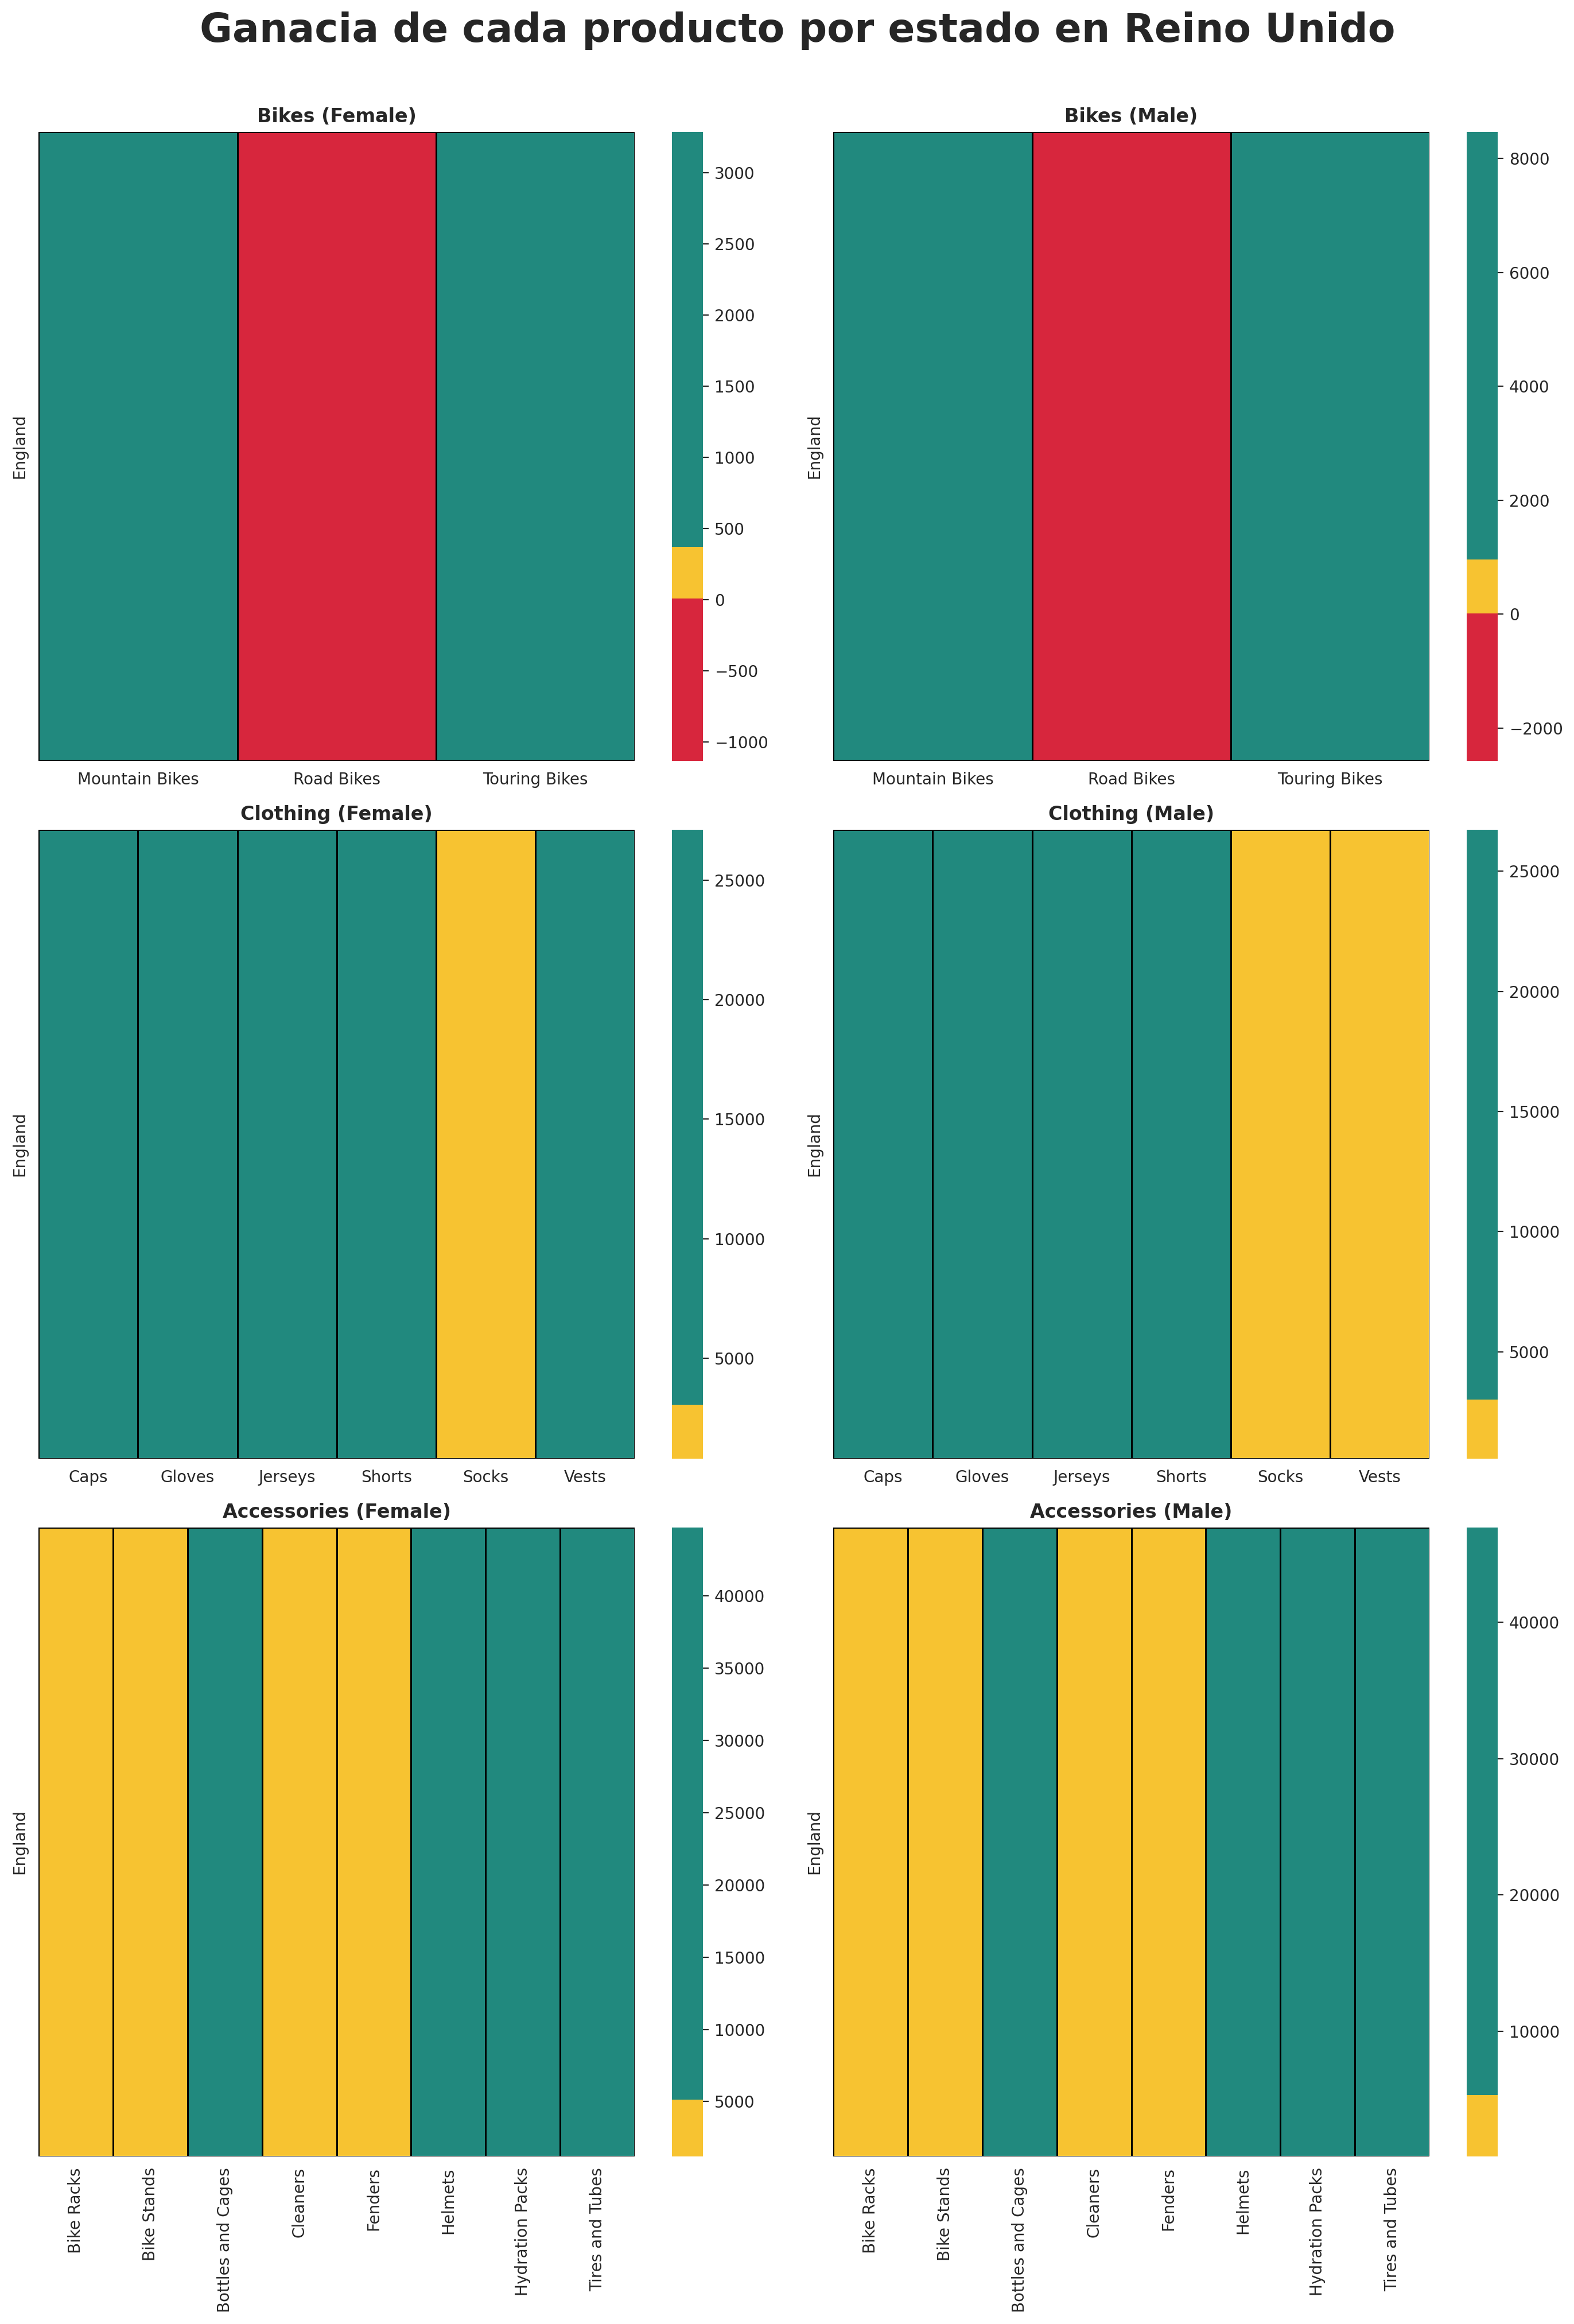

In [220]:
plot_profit_genre_product_state(data=united_kingdom_prod_cat_profit,
                                categorias=categorias,
                                pais="Reino Unido")

**Reino Unido**
* Según el análisis por categoría no se reportan pérdidas, sin embargo, al analizar por producto se observa que algunos productos generan ganacias bajas e incluso pérdidas como es el caso de la categoría Bikes.
* **Bikes**
    * Todas las categorías generan ganacias altas excepto las Road Bikes las cuales generan pérdidas tanto en hombres como en mujeres.
* **Clothing**
    * Todos los productos generan ganacias altas, excepto los calcetines y los chalecos en el caso de los hombres y los calcetines en el caso de las mujeres.
* **Accsessories**
    * Tanto en el caso de los hombres como de las mujeres se observan comportamientos similares: la mitad de los productos generan ganancias bajas y la otra mitad ganacias altas.

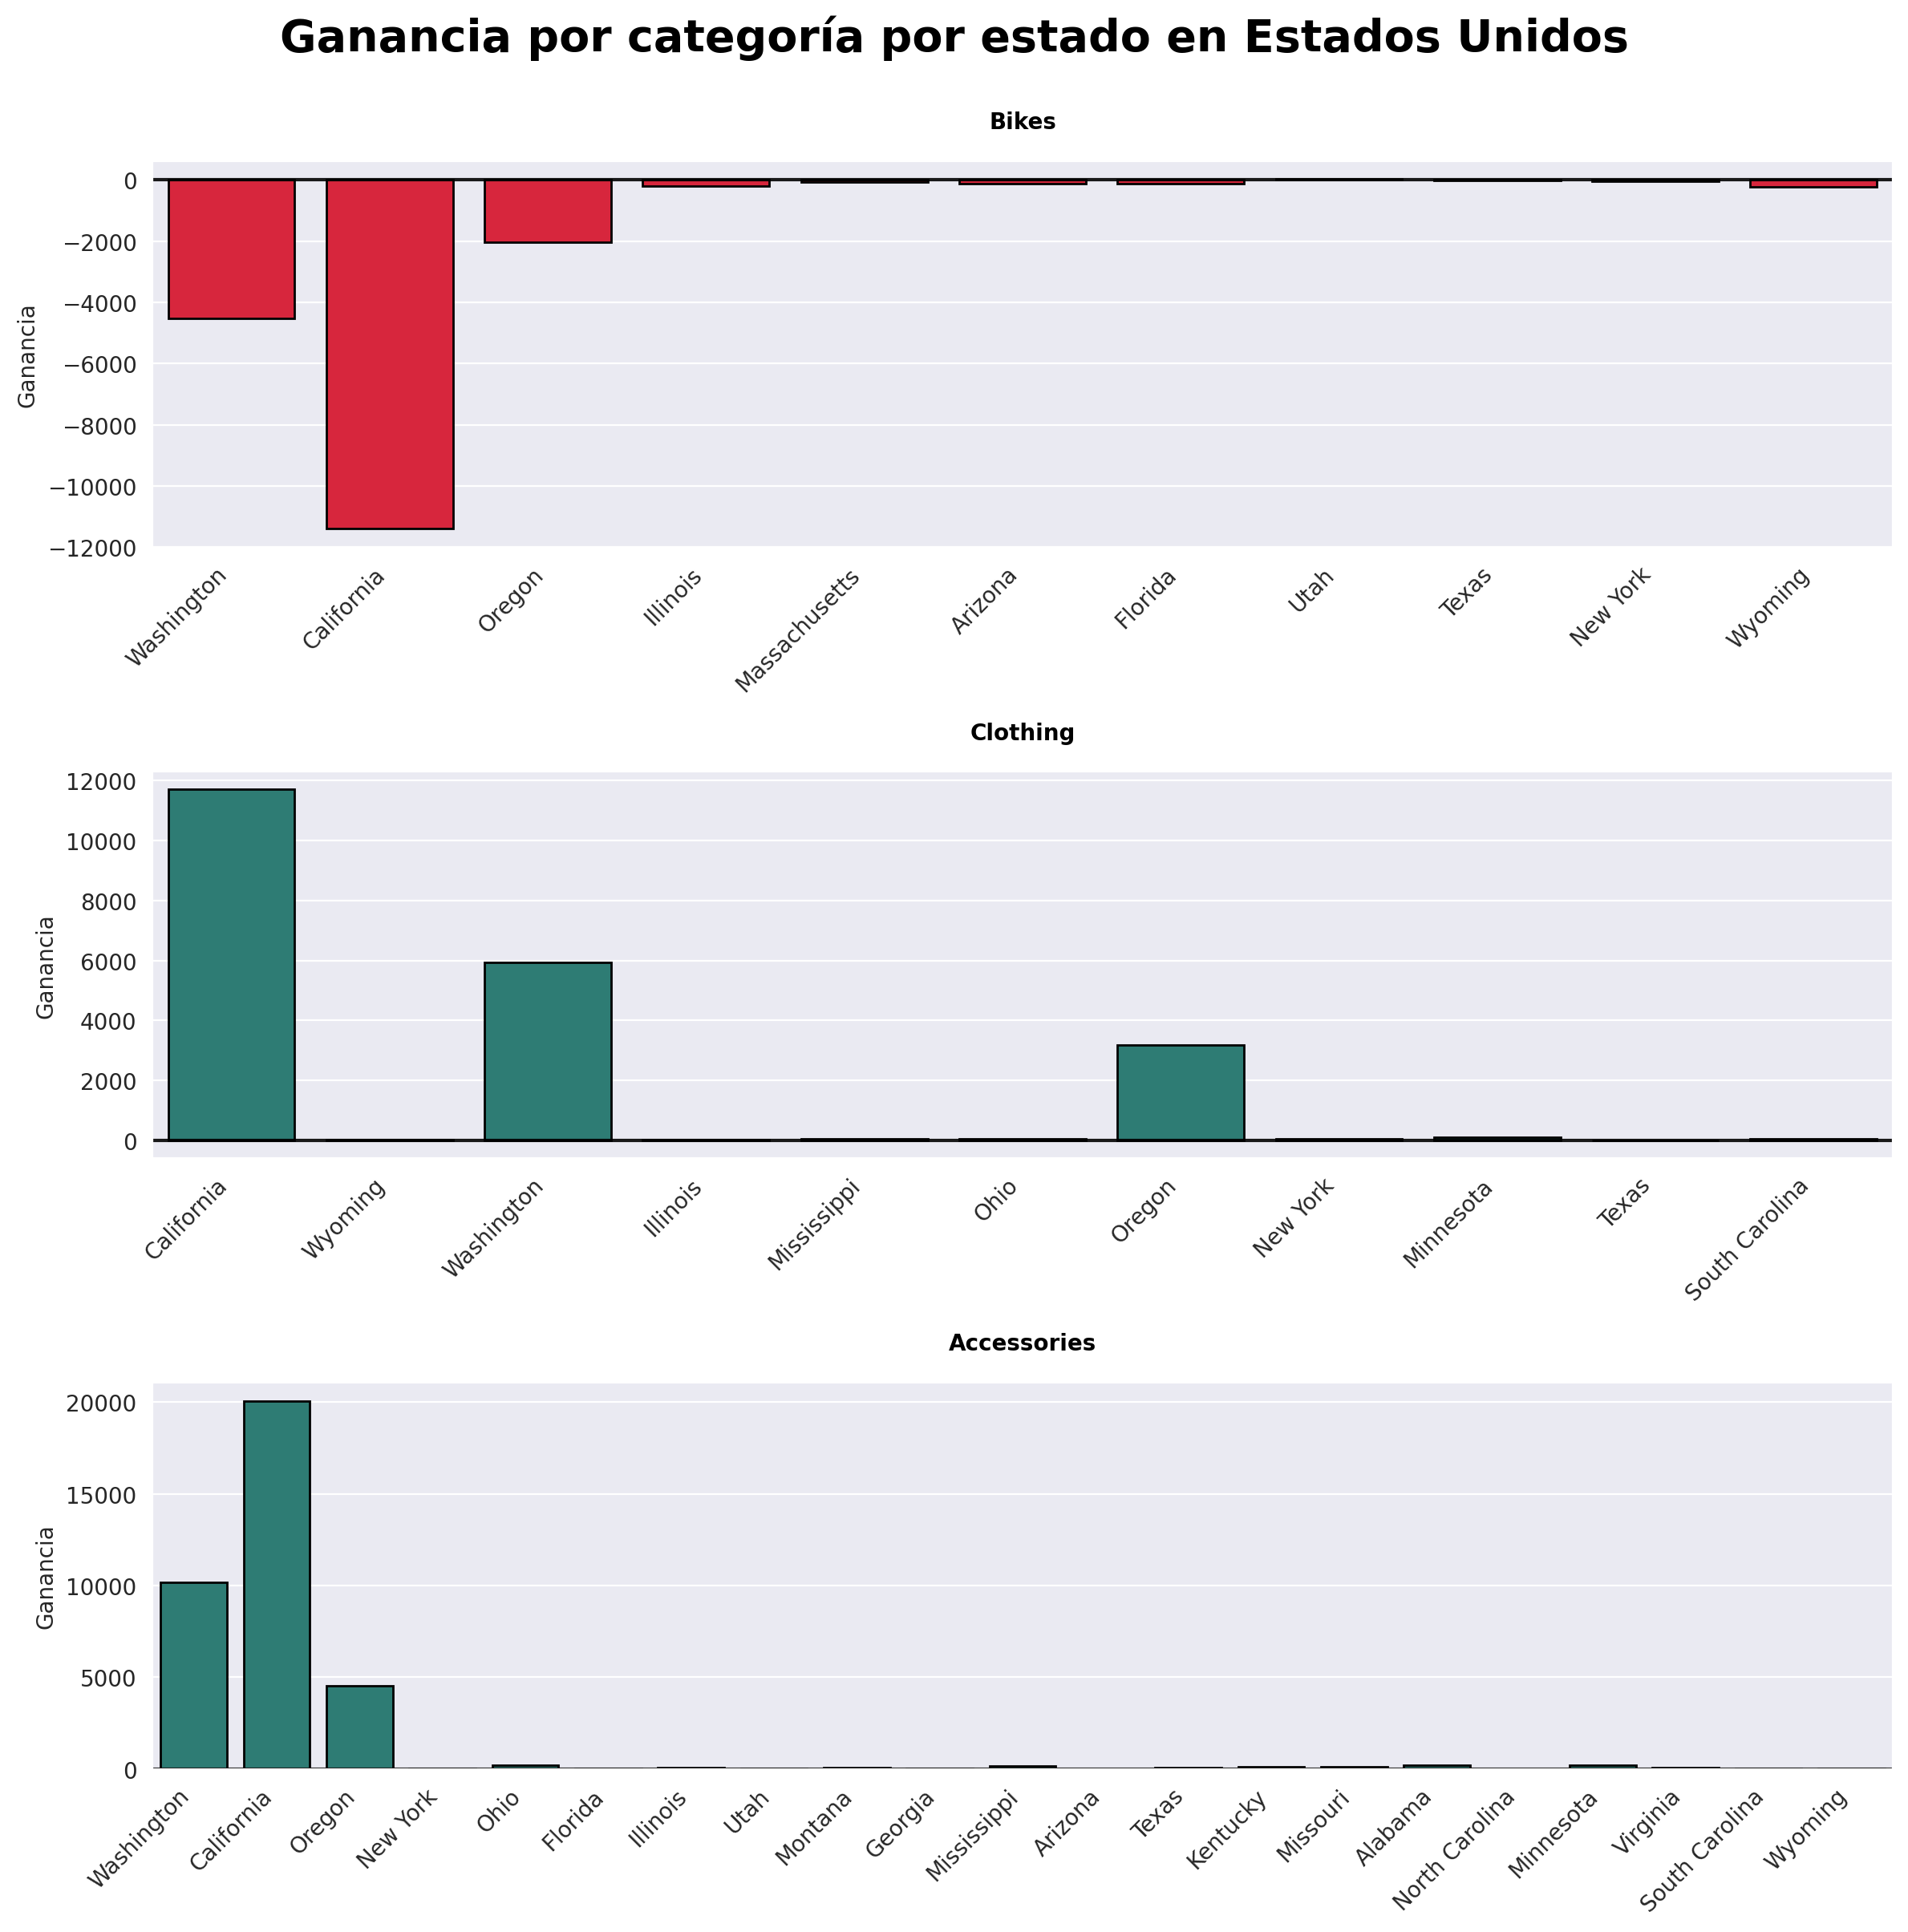

In [221]:
country_city_category_plot(data=united_states_prod_cat_profit,
                            title_country="Estados Unidos")

De acuerdo con el análisis por categoría, se puede observar que, las categorías Clothing y Accessories, generan ganacias muy cercanas a cero en todos los estados con excepción de tres: California, Oregon y Washington, en donde generan ganacias altas. 

En cuanto a la categoría Bikes, esta genera pérdidas en todos los estados.

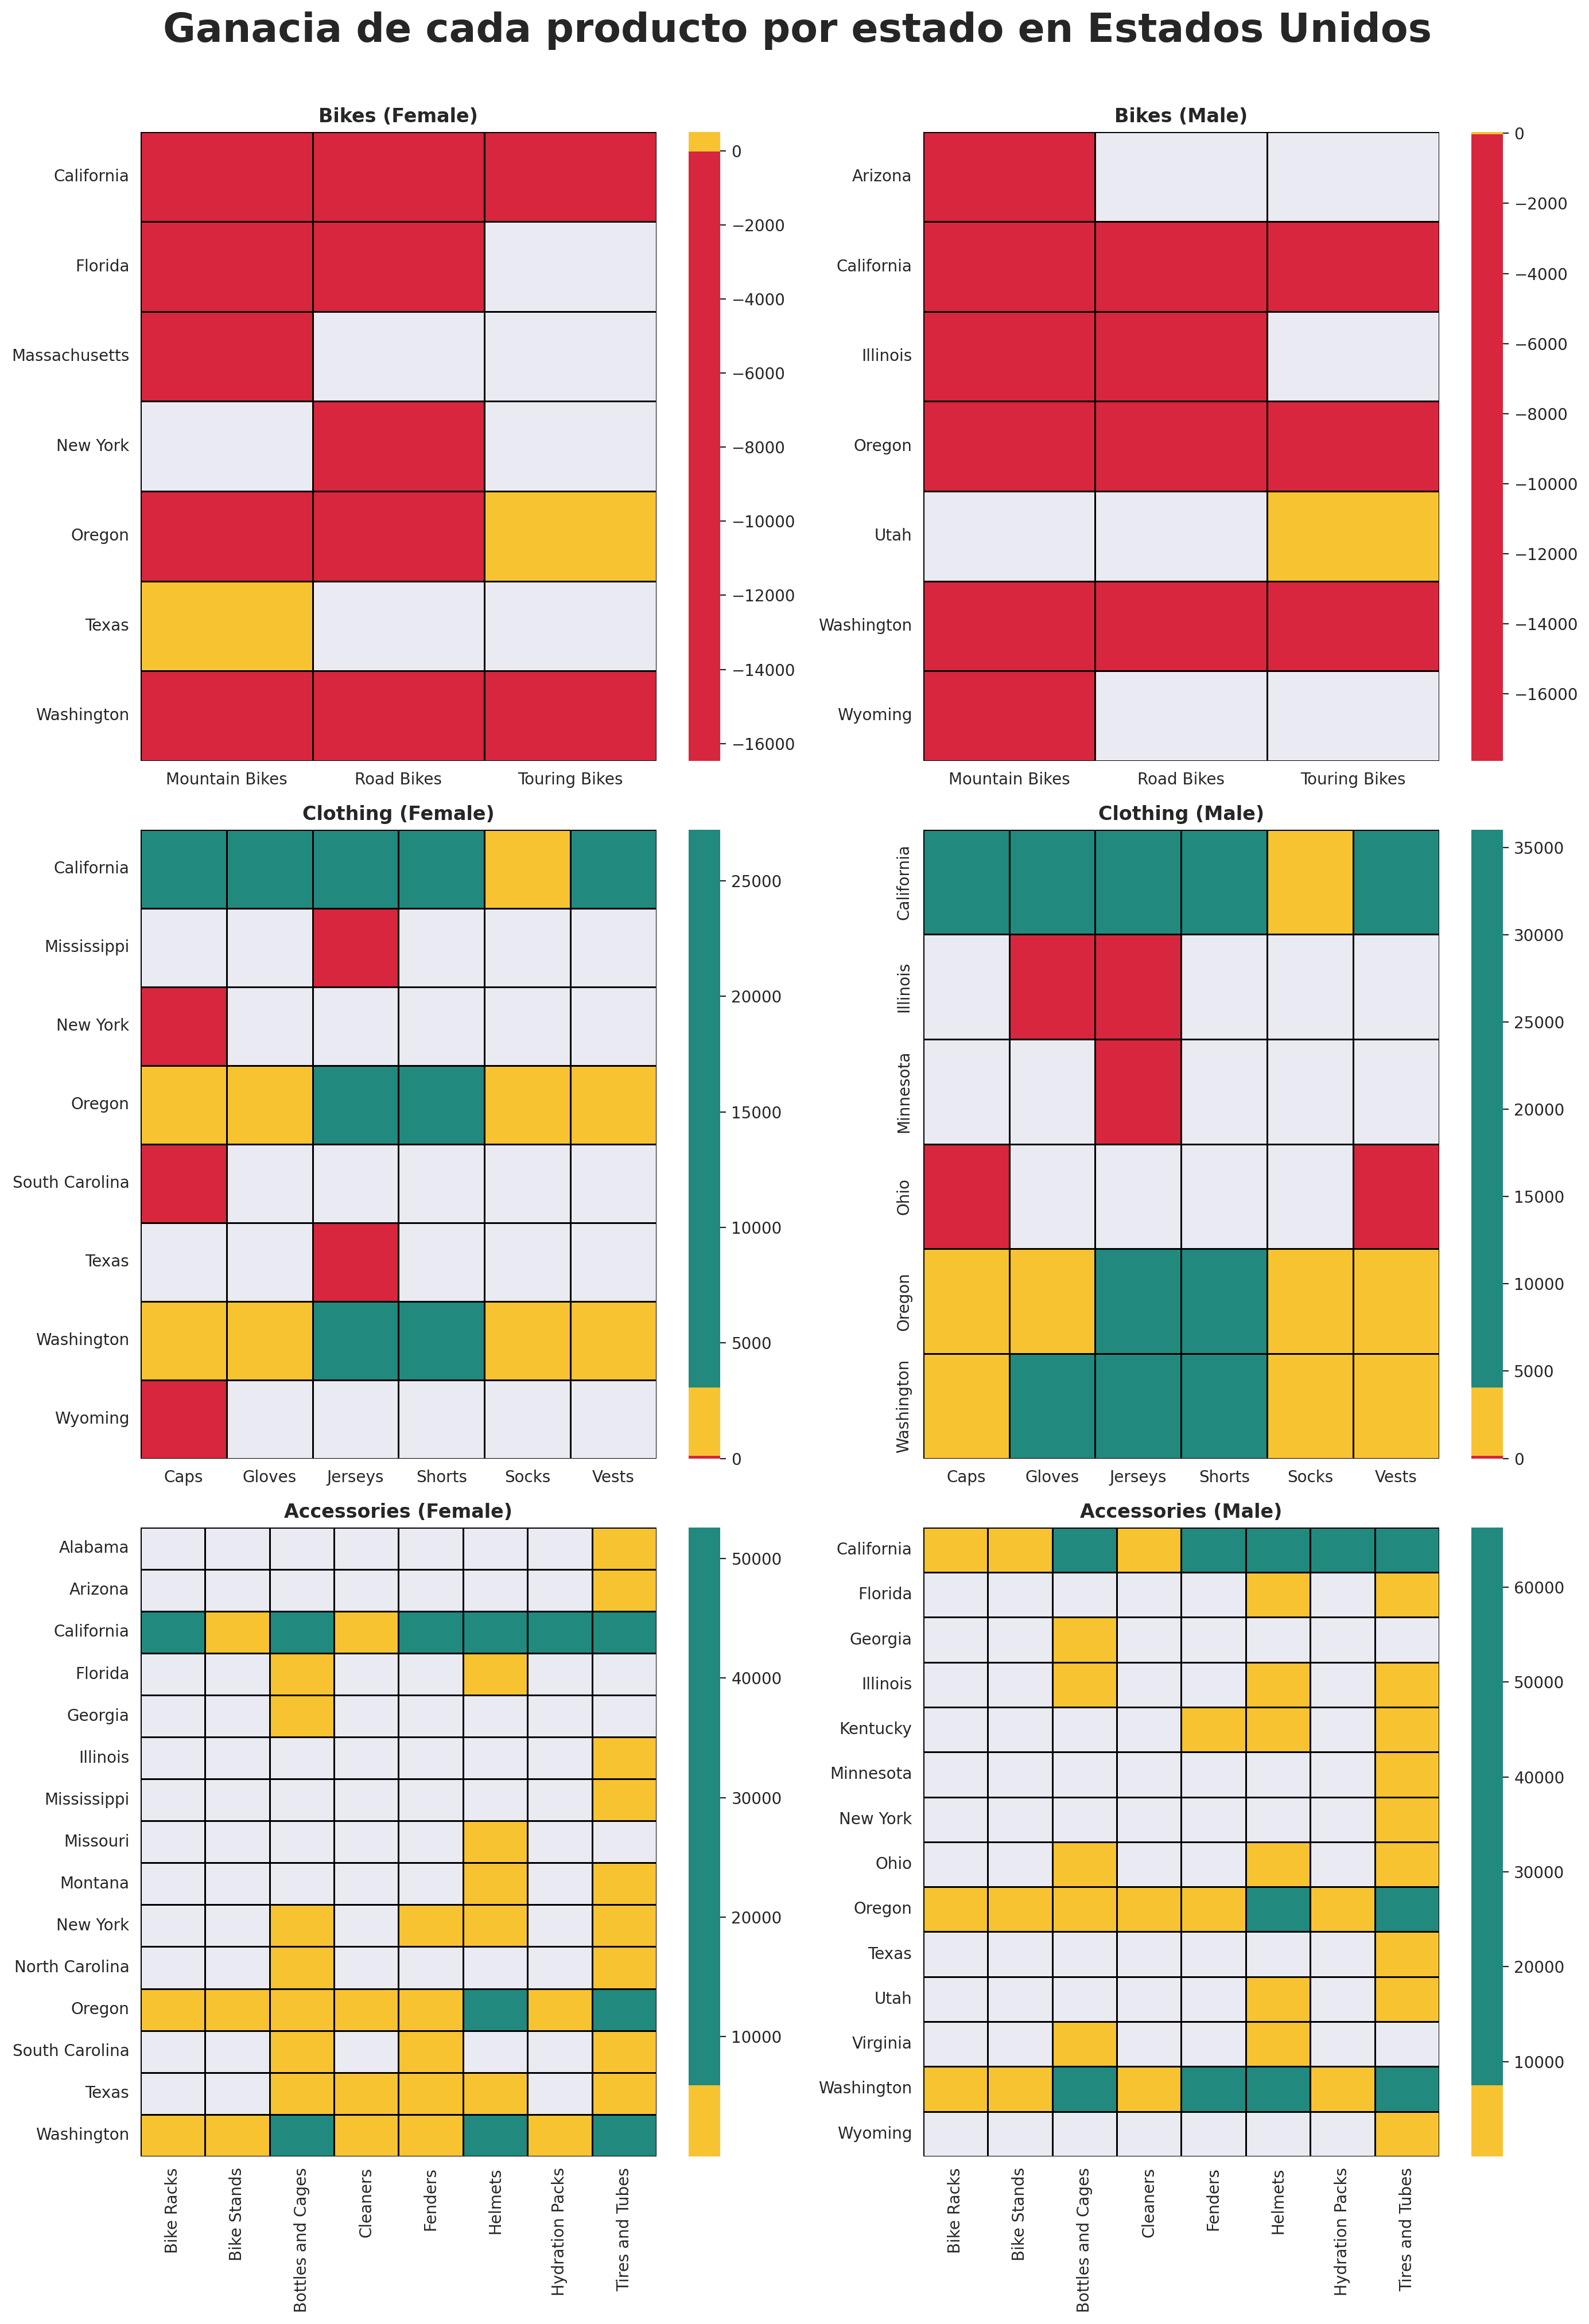

In [222]:
plot_profit_genre_product_state(data=united_states_prod_cat_profit,
                                categorias=categorias,
                                pais="Estados Unidos")

In [212]:
categorias[::-1]

array(['Bikes', 'Accessories', 'Clothing'], dtype=object)

* **Estados Unidos**
* El comportamiento observado en el análisis por categoría es muy similar al observado en el análisis por producto, se observa que solo en tres estados se venden todos los productos, en el resto de estados se venden pocos productos de cada categoría.
* **Bikes** 
    * Todos los productos presentan pérdidas en todos los estados, con excepción de tres productos en los cuales la ganancia es prácticamente cero.
* **Clothing**
    * En California, Oregon y Washington se venden todos los productos, y todos presentan ganacias, entre altas y bajas en distintos productos pero ninguno presenta pérdidas mientras que el resto de estados tienen pérdidas en los productos que venden.
* **Accessories**
    * En California, Oregon y Washington se venden todos los productos. En california la mayoría presentan ganacias altas meintras que en los otros dos estados la mayoría tiene ganacias bajas.
    * En el resto de estados se presentan ganancias bajas de todos los productos que venden.

### Análisis de las ganancias

Aunque el análisis por categoría indica que solamente la categoría bikes presenta pérdidas en los diferentes países, un análisis más detallado, por cada producto, demuestra que en realidad, son diversos los productos que presentan pérdidas o ganacias muy bajas.

El que un producto genere ganancias altas, bajas o pérdidas varía según el estado en el que se venda y el género del ciliente, lo cual indica que podría haber problemas con los costos tanto de producción, de publicidad y de transporte, entre otros costos.

Aunque alemania es el único país que no presenta pérdidas en ninguno de sus productos, tiene un alto porcentaje de productos con ganacias bajas.

Es importante revisar la estructura de costos de cada producto para poder determinar si se pueden hacer cambios para reducirlos o incluso, dejar de comercializar aquellos productos cuyos costos no se puedan ajustar a un nivel que permita generar ganancias.

In [224]:
session_info.show(html=False)

-----
matplotlib          3.4.3
numpy               1.20.3
pandas              1.4.2
scipy               1.7.1
seaborn             0.11.2
session_info        1.0.0
sqlalchemy          1.4.22
squarify            NA
-----
IPython             7.29.0
jupyter_client      6.1.12
jupyter_core        4.8.1
jupyterlab          3.2.1
notebook            6.4.5
-----
Python 3.9.7 (default, Sep 16 2021, 13:09:58) [GCC 7.5.0]
Linux-5.15.90.1-microsoft-standard-WSL2-x86_64-with-glibc2.31
-----
Session information updated at 2023-06-04 14:23
